In [1421]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import scipy.stats as stats
import itertools
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## SPOTIFY API

In [845]:
import requests
import json
client_id = '3665679d9c9b4c2197d1a10b0b5a6ace'
client_secret = '8d7dad22b6a94d99a505f6cd94afaf6b'

grant_type = 'client_credentials'

body_params = {'grant_type' : grant_type}

url='https://accounts.spotify.com/api/token'

response=requests.post(url, data=body_params, auth = (client_id, client_secret)) 
response.text

'{"access_token":"BQCPsSfc5LOtEbY73ehYBO3RG_NBXheALigXRDnYLQcP-99muRtfE_wOdZG5e_A32NXkYwbEXdYXdfj2rbw","token_type":"Bearer","expires_in":3600,"scope":""}'

In [846]:
access_token = 'BQCPsSfc5LOtEbY73ehYBO3RG_NBXheALigXRDnYLQcP-99muRtfE_wOdZG5e_A32NXkYwbEXdYXdfj2rbw'
headers = {'Authorization': 'Bearer '+ access_token}

## GENRES AVAILABLE

In [4]:
# retreiving spotify's list of genres
gr = requests.get('https://api.spotify.com/v1/recommendations/available-genre-seeds', headers=headers)
genres = gr.json()
genres

{'genres': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'bossanova',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'holidays',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metal-misc',
  'metalcore',


## GENRE PLAYLIST IDs

In [ ]:
# 7Mr3wEdKgaiAP4Cm2a6vda
# hip hop playlist
# 4MRGjKqlWuJZJ8XHOGcqkR 
# post rock playlist
# 37i9dQZF1DX4dyzvuaRJ0n
# electronic playlist
# 1o1HVRGIxwCcdSnNnZ69IC
# detroit_techo playlist
# 37i9dQZF1DWWEJlAGA9gs0
# classical playlist
# 0TCtFMz5lY6jTfusk66ZFj
# disco playlist
# 3kTtdRE1CtRyRKdicfOGAR
# electro indie pop playlist
# 30BUPgw52SWNm2ZWZZc86A
# industrial pop playlist
# 6Ph1K0QWCcEwYRr0VhVt6C
# french playlist

# 5khoF3ksobwfVwOazDqpqI
# spanish playlist
# 6mRRGF4klfgUzbD2ZKOCq0
# ska playlist
# 37i9dQZF1DWZd79rJ6a7lp
# sleep playlist
# 37i9dQZF1DX0xLQsW8b5Zx
# rockabilly playlist
# 2SwjQPegrTTYaOsWQrwhMe
# 50's Hits playlist

## Working on Functions

In [265]:
r_15_a = requests.get('https://api.spotify.com/v1/audio-analysis/6u7jPi22kF8CTQ3rb9DHE7', headers=headers)

In [266]:
r_15_a = r_15_a.json()

In [328]:
r_15_a

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1575561982,
  'analysis_time': 5.19997,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 3463320,
  'duration': 157.06667,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.0,
  'start_of_fade_out': 138.75084,
  'loudness': -5.56,
  'tempo': 136.041,
  'tempo_confidence': 0.559,
  'time_signature': 4,
  'time_signature_confidence': 1.0,
  'key': 6,
  'key_confidence': 0.756,
  'mode': 1,
  'mode_confidence': 0.651,
  'codestring': 'eJxVmtlh3TAMBFtRCbyP_hvLzOrZz_lJTFqicC4WoGsvZ9d2z1Oesea6c47znN6eMeots-311HX5p5cxx93taZW9Ns7q95bLT_x2j75Or_zU5m1Pb_scVvPpnWXbu47RVn36OJy-6-qb855-F8s6b52L7_fZWJ11VtnPUIjb-tlzlPnMplzr1tbrLM9SiN6RoZfdn13KUf5zV-OQfZBz3zNa7ZUzN59BgVN69dB6xlNLH6X1xct38mteQWPEfu7qEXlyNF-qRQXbQIM-F4Yoysp7HD61Th1tIHa_G3uwvCg2l5_um8-2svga

In [270]:
section_keys = []
for x in r_15_a['sections']:
    k = x['key']
    if k == -1:
        section_keys.append('Key not defined')
    if k == 0:
        section_keys.append('C')
    if k == 1:
        section_keys.append('C#/Db')
    if k == 2:
        section_keys.append('D')
    if k == 3:
        section_keys.append('D#/Eb')
    if k == 4: 
        section_keys.append('E')
    if k == 5: 
        section_keys.append('F')
    if k == 6:
        section_keys.append('F#/Gb')
    if k == 7:
        section_keys.append('G')
    if k == 8:
        section_keys.append('G#/Ab')
    if k == 9:
        section_keys.append('A')
    if k == 10:
        section_keys.append('A#/Bb')
    if k == 11: 
        section_keys.append('B')
section_keys

['C#/Db', 'F#/Gb', 'C#/Db', 'C#/Db', 'F#/Gb', 'G#/Ab']

In [248]:
section_key_modes = []
for x in r_15_a['sections']:
    m = x['mode']
    if m == -1:
        section_key_modes.append('Mode not Defined')
    if m == 0:
        section_key_modes.append('Minor')
    if m == 1:
        section_key_modes.append('Major')
section_key_modes

['Major', 'Major', 'Major', 'Major', 'Major', 'Minor']

In [241]:
section_tempo = []
for x in r_15_a['sections']:
    section_tempo.append(x['tempo'])
section_tempo

[136.293, 136.264, 135.936, 135.99, 136.139, 135.662]

In [152]:
segments_l = []
for i in r_15_a['segments']:
    segments_l.append(i['pitches'])

In [157]:
p = pd.DataFrame(segments_l)

In [162]:
p = p.rename({0:'C', 1:'Db', 2:'D', 3:'Eb', 4:'E', 5: 'F', 6:'F#', 7:'G', 8:'Ab', 9:'A', 10:'Bb', 11:'B'}, axis='columns')

In [188]:
p[(p['C'] == 1) | (p['E'] == 1) | (p['G'] == 1) ]

,C,Db,D,Eb,E,F,F#,G,Ab,A,Bb,B
0,1.000,0.026,0.046,0.265,0.074,0.036,0.347,0.119,0.579,0.017,0.025,0.027
19,1.000,0.094,0.106,0.465,0.083,0.059,0.590,0.139,0.604,0.076,0.086,0.292
74,0.141,0.033,0.468,0.636,0.157,0.136,0.203,1.000,0.901,0.141,0.067,0.205
79,0.987,0.696,0.450,0.784,1.000,0.407,0.395,0.368,0.535,0.281,0.217,0.895
84,0.777,0.466,0.346,0.785,1.000,0.373,0.302,0.266,0.349,0.174,0.105,0.829
88,1.000,0.250,0.086,0.065,0.045,0.034,0.105,0.115,0.071,0.036,0.027,0.901
106,0.164,0.272,0.176,0.170,0.255,0.424,0.663,1.000,0.440,0.245,0.196,0.158
107,1.000,0.637,0.453,0.782,0.929,0.532,0.407,0.280,0.524,0.209,0.133,0.932
116,1.000,0.439,0.194,0.125,0.091,0.087,0.132,0.171,0.099,0.072,0.060,0.836
119,1.000,0.122,0.064,0.046,0.023,0.018,0.115,0.091,0.022,0.018,0.013,0.959


In [249]:
segments_t = []
for i in r_15_a['segments']:
    segments_t.append(i['timbre'])

In [253]:
timbre = pd.DataFrame(segments_t)
timbre = timbre.rename({0:'Q1', 1:'Q2', 2:'Q3', 3:'Q4', 4:'Q5', 5: 'Q6', 6:'Q7', 7:'Q8', 8:'Q9', 9:'Q10', 10:'Q11', 11:'Q12'}, axis='columns')
timbre

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,35.757,25.437,-20.402,220.952,63.505,-34.703,-79.650,-55.146,-13.911,1.146,-65.324,26.326
1,34.182,-25.260,-22.607,172.975,66.621,8.512,-82.198,-29.360,-23.782,16.150,-47.522,16.451
2,27.977,-7.918,66.970,-78.680,58.712,56.895,-54.472,0.461,0.752,-19.015,-55.706,14.466
3,24.749,-96.113,115.810,29.718,65.830,-43.953,1.962,3.933,-23.115,-14.050,5.030,9.835
4,24.466,-73.113,113.206,22.152,45.870,-38.243,19.847,-1.056,-27.754,-11.948,8.242,17.059
5,27.406,-42.863,87.079,2.792,51.574,-32.779,23.877,-2.133,-12.318,3.928,13.860,21.388
6,35.943,13.237,52.696,37.162,72.818,51.428,-17.957,-53.779,7.945,-4.838,14.635,9.448
7,30.358,-68.039,79.618,9.868,47.578,-24.133,-13.888,-4.283,-4.322,-16.855,-4.580,20.669
8,28.807,-36.949,91.499,13.367,22.403,-31.296,9.817,11.636,5.092,-10.442,-6.182,1.663
9,28.355,0.651,103.850,27.914,31.873,-25.583,11.099,-1.119,2.754,-1.670,-15.588,8.835


## FUNCTIONS

In [5]:
# fetch id function
def fetch_ids(songs):
    ids = []
    for song in songs['items']:
        ids.append(song['track']['id'])
    return ids

In [6]:
# fetch audio feature links function
def audio_features_(data):
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in data:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [7]:
# retrieve dictionary of track feature data
def fetch_features(links):
    feature_data = []
    for i in links:
        x = requests.get(i, headers=headers)
        j = x.content
        feature_data.append(json.loads(j))
    return feature_data

## Now Putting Them All Together

In [8]:
# all functions together to pull song list in and return dataframe
def song_return_feature_df(songs):
    ids = fetch_ids(songs)
    links = audio_features_(ids)
    feature_list = fetch_features(links)
    df = pd.DataFrame(feature_list)
    return df
    

## More Call Functions

In [9]:
# call spotify recieve playlist of songs as dictionary
def call_spotify(str):
    i = str
    base = 'https://api.spotify.com/v1/playlists/'
    end = '/tracks'
    r = requests.get(base + i + end, headers=headers)
    songs = r.json()
    return songs

In [10]:
# call spotify playlist, return features as dataframe
def call_spotify_return_feat_df(str):
    songs = call_spotify(str)
    df = song_return_feature_df(songs)
    return df
    

## Example of Full Function
function passes through playlist id and returns a data frame of all track ids and audio features

In [11]:
call_spotify_return_feat_df('7Mr3wEdKgaiAP4Cm2a6vda')

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.0533,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6,0.1130,-5.560,1,0.1020,136.041,4,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639
1,0.3340,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8,0.0571,-5.153,1,0.0717,129.875,4,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746
2,0.1810,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2,0.1370,-7.899,1,0.0845,129.972,4,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496
3,0.3420,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5,0.1230,-6.146,0,0.0752,153.848,4,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475
4,0.2330,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0,0.0924,-3.537,1,0.0402,120.003,4,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534
5,0.1070,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10,0.0786,-16.781,0,0.1020,157.928,3,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299
6,0.0224,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4,0.1150,-4.693,0,0.0321,140.056,4,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191
7,0.3340,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9,0.1260,-9.682,0,0.0688,140.005,4,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235
8,0.4560,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5,0.1030,-3.875,1,0.0810,150.068,4,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163
9,0.1630,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385


## Getting Track Names

In [12]:
# getting track names from playlist of songs as dictionary
def fetch_titles(songs):
    titles = []
    for song in songs['items']:
        titles.append(song['track']['name'])
    return titles

In [13]:
# calls playlist, returns titles of songs in playlist as dataframe
def fetch_track_names(str):
    songs = call_spotify(str)
    titles = fetch_titles(songs)
    df = pd.DataFrame(titles)
    return df

## Getting Track Tempo

In [203]:
# get tempo from track ID
def get_tempo(str):
    base = 'https://api.spotify.com/v1/audio-analysis/'
    link = base + str 
    r_a = requests.get(link, headers=headers)
    r_aj = r_a.json()
    x = r_aj['track']['tempo']
    return x

In [216]:
# get tempo consistency (does it change -  form) from track ID
def get_tempo_consistency(str):
    base = 'https://api.spotify.com/v1/audio-analysis/'
    link = base + str 
    r_a = requests.get(link, headers=headers)
    r_aj = r_a.json()
    x = r_aj['track']['tempo_confidence']
    return x

## Getting Track Key

In [212]:
# get key from track ID
def get_key(str):
    base = 'https://api.spotify.com/v1/audio-analysis/'
    link = base + str 
    r_a = requests.get(link, headers=headers)
    r_aj = r_a.json()
    x = r_aj['track']['key']
    return x

In [217]:
# get key consistency (does key change, are their key progressions?) from track ID
def get_key_consistency(str):
    base = 'https://api.spotify.com/v1/audio-analysis/'
    link = base + str 
    r_a = requests.get(link, headers=headers)
    r_aj = r_a.json()
    x = r_aj['track']['key_confidence']
    return x

In [214]:
# get mode of key (maj or min) from track ID
def get_key_mode(str):
    base = 'https://api.spotify.com/v1/audio-analysis/'
    link = base + str 
    r_a = requests.get(link, headers=headers)
    r_aj = r_a.json()
    x = r_aj['track']['mode']
    return x

In [215]:
# get consistency of mode (does mode change, are there modal progressions?) from track ID
def get_mode_consistency(str):
    base = 'https://api.spotify.com/v1/audio-analysis/'
    link = base + str 
    r_a = requests.get(link, headers=headers)
    r_aj = r_a.json()
    x = r_aj['track']['mode_confidence']
    return x

## Get Section Information (form)

In [308]:
# get audio analysis links
def audio_analysis(data):
    base =  'https://api.spotify.com/v1/audio-analysis/'
    list_of_ids = []
    for i in data:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [309]:
# retrieve dictionary of track analysis data
def fetch_analysis(links):
    analysis_data = []
    for i in links:
        x = requests.get(i, headers=headers)
        j = x.content
        analysis_data.append(json.loads(j))
    return analysis_data

In [273]:
# keys of section (chord progression) in track
def get_harmonic_progression(song):
    section_keys = []
    for section in song['sections']:
        k = section['key']
        if k == -1:
            section_keys.append('Key not defined')
        if k == 0:
            section_keys.append('C')
        if k == 1:
            section_keys.append('C#/Db')
        if k == 2:
            section_keys.append('D')
        if k == 3:
            section_keys.append('D#/Eb')
        if k == 4: 
            section_keys.append('E')
        if k == 5: 
            section_keys.append('F')
        if k == 6:
            section_keys.append('F#/Gb')
        if k == 7:
            section_keys.append('G')
        if k == 8:
            section_keys.append('G#/Ab')
        if k == 9:
            section_keys.append('A')
        if k == 10:
            section_keys.append('A#/Bb')
        if k == 11: 
            section_keys.append('B')
    return section_keys

In [275]:
# mode of key in section (tonal progression)    
def get_harmonic_mode_progression(song):   
    section_key_modes = []
    for section in song['sections']:
        m = section['mode']
        if m == -1:
            section_key_modes.append('Mode not Defined')
        if m == 0:
            section_key_modes.append('Minor')
        if m == 1:
            section_key_modes.append('Major')
    return section_key_modes

In [277]:
# tempo changes through out sections
def get_tempo_progression(song):    
    section_tempo = []
    for section in song['sections']:
        section_tempo.append(section['tempo'])
    return section_tempo

## Section Functions in One

In [353]:
# returns section info on track passed through
def get_section_info(x):
    section_list = []
    for song in songs:
        h_prog = get_harmonic_progression(song)
        m_prog = get_harmonic_mode_progression(song)
        t_prog = get_tempo_progression(song)
        section_prog = [h_prog, m_prog, t_prog]
        section_list.append(section_prog)
    return section_list

In [758]:
# calls spotify playlist, returns section info on each track in playlist
def fetch_sections_info(str):
    data = call_spotify(str)
    ids = fetch_ids(data)
    links = audio_analysis(ids)
    songs = fetch_analysis(links)
    section_info = get_section_info(songs)
    return section_info

## EXAMPLE OF SECTION FUNCTIONS IN ONE (Hip hop)

In [360]:
hip_section_df = pd.DataFrame(fetch_sections_info('7Mr3wEdKgaiAP4Cm2a6vda'))
hip_section_df

,0,1,2
0,"[C#/Db, F#/Gb, C#/Db, C#/Db, F#/Gb, G#/Ab]","[Major, Major, Major, Major, Major, Minor]","[136.293, 136.264, 135.936, 135.99, 136.139, 1..."
1,"[G#/Ab, C, F, C, F, C, C]","[Major, Minor, Minor, Minor, Minor, Minor, Minor]","[130.028, 128.679, 129.635, 130.124, 129.832, ..."
2,"[G, D, G#/Ab, G, A, D, D, D]","[Major, Major, Major, Minor, Major, Major, Maj...","[128.952, 130.05, 129.942, 130.244, 130.035, 1..."
3,"[G#/Ab, G#/Ab, F, F, F, G#/Ab]","[Major, Major, Minor, Minor, Minor, Major]","[153.61, 154.19, 154.566, 153.883, 154.133, 15..."
4,"[C, C, C, C, C, C, A#/Bb]","[Major, Major, Major, Major, Major, Major, Major]","[120.251, 120.027, 120.024, 119.979, 120.342, ..."
5,"[A#/Bb, A#/Bb, C#/Db, A#/Bb, C#/Db]","[Minor, Minor, Major, Minor, Major]","[157.778, 158.137, 157.95, 157.803, 157.956]"
6,"[E, G, E, D, G, E, E, D, E, E, D, G, A]","[Minor, Major, Minor, Major, Major, Minor, Min...","[139.985, 140.39, 140.056, 140.225, 140.19, 13..."
7,"[A, A, A, A, A, A, A, A, A, D]","[Minor, Minor, Minor, Minor, Minor, Minor, Min...","[139.964, 139.88, 140.22, 139.995, 140.094, 13..."
8,"[F, F, F, A#/Bb, A#/Bb, D, A]","[Major, Major, Major, Major, Major, Minor, Minor]","[142.078, 149.486, 150.089, 150.29, 149.963, 1..."
9,"[B, C#/Db, B, D, B]","[Minor, Major, Minor, Major, Minor]","[100.149, 98.947, 100.034, 99.939, 100.038]"


In [379]:
hip_section_df = hip_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
hip_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[C#/Db, F#/Gb, C#/Db, C#/Db, F#/Gb, G#/Ab]","[Major, Major, Major, Major, Major, Minor]","[136.293, 136.264, 135.936, 135.99, 136.139, 1..."
1,"[G#/Ab, C, F, C, F, C, C]","[Major, Minor, Minor, Minor, Minor, Minor, Minor]","[130.028, 128.679, 129.635, 130.124, 129.832, ..."
2,"[G, D, G#/Ab, G, A, D, D, D]","[Major, Major, Major, Minor, Major, Major, Maj...","[128.952, 130.05, 129.942, 130.244, 130.035, 1..."
3,"[G#/Ab, G#/Ab, F, F, F, G#/Ab]","[Major, Major, Minor, Minor, Minor, Major]","[153.61, 154.19, 154.566, 153.883, 154.133, 15..."
4,"[C, C, C, C, C, C, A#/Bb]","[Major, Major, Major, Major, Major, Major, Major]","[120.251, 120.027, 120.024, 119.979, 120.342, ..."


In [868]:
data = call_spotify('2SwjQPegrTTYaOsWQrwhMe')

In [869]:
ids = fetch_ids(data)

In [870]:
links = audio_analysis(ids)

In [871]:
songs = fetch_analysis(links)

In [829]:
def section_info(x):
    sl = []
    for song in x:
        x = get_harmonic_progression(song)
        y = get_harmonic_mode_progression(song)
        z = get_tempo_progression(song)
        xzz = [x,y,z]
        sl.append(xzz)
    return sl

In [872]:
get_section_info(songs)

[[['G', 'A', 'A', 'D', 'A', 'A', 'D'],
  ['Major', 'Major', 'Major', 'Major', 'Major', 'Major', 'Major'],
  [165.724, 169.149, 167.526, 169.255, 167.73, 171.282, 173.024]],
 [['A#/Bb', 'F', 'F', 'C', 'A#/Bb', 'C', 'C'],
  ['Major', 'Major', 'Minor', 'Major', 'Major', 'Minor', 'Major'],
  [183.032, 185.541, 182.616, 186.923, 185.941, 184.52, 188.224]],
 [['G#/Ab', 'G#/Ab', 'G#/Ab', 'G#/Ab', 'A#/Bb', 'G#/Ab', 'C'],
  ['Major', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Major'],
  [75.294, 73.158, 72.601, 70.152, 73.161, 72.965, 74.492]],
 [['E', 'A', 'D', 'D#/Eb', 'B', 'D', 'D'],
  ['Major', 'Major', 'Major', 'Major', 'Minor', 'Major', 'Major'],
  [179.452, 181.91, 178.539, 180.994, 181.816, 185.451, 181.185]],
 [['A', 'A', 'E'], ['Major', 'Major', 'Major'], [94.746, 95.614, 97.627]],
 [['F', 'B', 'A#/Bb', 'F', 'C', 'F', 'F', 'D', 'F'],
  ['Major',
   'Minor',
   'Major',
   'Major',
   'Major',
   'Major',
   'Major',
   'Minor',
   'Major'],
  [74.115, 110.185, 110.141, 109.108, 72.

## Getting Artist Names and IDs by Track per Playlist ID

In [14]:
# getting artist names per track from playlist as dictionary
def fetch_artist(songs):
    x = []
    for song in songs['items']:
        x.append(song['track']['artists'])
        name = []
        for track in x:
            for artist in track:
                name.append(artist['name'])
    return name           

In [15]:
# getting artist ids per track from playlist as dictionary
def fetch_artist_ids(songs):
    x = []
    for song in songs['items']:
        x.append(song['track']['artists'])
        artist_ids = []
        for track in x:
            for artist in track:
                artist_ids.append(artist['id'])
    return artist_ids

In [16]:
# getting artist name and id per track from calling playlist returning as dataframe
def fetch_track_artist_info(str):
    songs = call_spotify(str)
    artist_names = fetch_artist(songs)
    artist_ids = fetch_artist_ids(songs)
    df = pd.DataFrame(artist_names)
    df2 = pd.DataFrame(artist_ids)
    df3 = df['ids'] = df2
    return df
    

In [17]:
fetch_track_artist_info('7Mr3wEdKgaiAP4Cm2a6vda')

,0,ids
0,Lil Nas X,7jVv8c5Fj3E9VhNjxT4snq
1,Billy Ray Cyrus,60rpJ9SgigSd16DOAG7GSa
2,XXXTENTACION,15UsOTVnJzReFVN1VCnxy4
3,PnB Rock,21WS9wngs9AqFckK7yYJPM
4,Trippie Redd,6Xgp2XMz1fhVYe7i6yNAax
5,Y2K,6USMTwO0MNDnKte5a5h0xx
6,bbno$,41X1TR6hrK8Q2ZCpp2EqCz
7,Lil Nas X,7jVv8c5Fj3E9VhNjxT4snq
8,Post Malone,246dkjvS1zLTtiykXe5h60
9,Rod Wave,45TgXXqMDdF8BkjA83OM7z


## HIP HOP PLAYLIST

In [18]:
# hip hop
r = requests.get("https://api.spotify.com/v1/playlists/7Mr3wEdKgaiAP4Cm2a6vda/tracks", headers=headers)

In [19]:
hip_hop_songs = r.json()

In [20]:
len(hip_hop_songs)

7

In [21]:
hip_hop_ids = []
for song in hip_hop_songs['items']:
    hip_hop_ids.append(song['track']['id'])

In [22]:
len(hip_hop_ids)

100

In [23]:
hip_hop_ids

['6u7jPi22kF8CTQ3rb9DHE7',
 '69dXVFCMiz3SL1L7M24NdX',
 '51Fjme0JiitpyXKuyQiCDo',
 '6fTt0CH2t0mdeB2N9XFG5r',
 '4VginDwYTP2eaHJzO0QMjG',
 '56sxR3i2zr7AtFbgGu12ZD',
 '0kvcPiQRHpwC55CmI9CUzr',
 '1iSqfoUFnQwV0QW1EfUit8',
 '5E1jEFXElio2eOxjJ3WLnk',
 '6MWtB6iiXyIwun0YzU6DFP',
 '7aiClxsDWFRQ0Kzk5KI5ku',
 '4Yq3XUNfWrAPWuB94qkC09',
 '7C39RtGhnEw7cyf0Pyw7PV',
 '6hkr5ZGVOt3Z2BNGE6yqpB',
 '6fWa5CRgy0z30OeGZyMBvD',
 '77Y7tccX9Hx5iClDr39uy9',
 '4sjiIpEv617LDXaidKioOI',
 '7x9nXsowok1JszkVztI5NI',
 '711MglQhnhOF3UAiAs9A59',
 '2ktxr00GpTtbMNeBjNeY8D',
 '3KkXRkHbMCARz0aVfEt68P',
 '1CxYDvfq3KVvsPSZ9NCdM9',
 '3US2r3B2F7ZtEXsQ4zrjVl',
 '4CH66Rxcjcj3VBHwmIBj4T',
 '0c7K73roy6RW4ebDkf4yGh',
 '4XiGKQqbmnMVxDzUj6j3f2',
 '59PYPDxTbqJpiGfyogPb5h',
 '6uYgCE2OEulOw5zhHvZsHf',
 '4dV3okcjbQwTcg4ObIGr4N',
 '5PkXk4r0K9oseq7io6hVSb',
 '0rhxoXFMKRtm1dQJfi72Yh',
 '4thnq3xsCY2KdVGWxM6y38',
 '6cjSh516BbrNUs213jDAGm',
 '3fx31TjnwvwZIyAGHhOhA1',
 '03i4lR6ZZo0214WhmrE8t9',
 '5UYK9MervBCROg8AHNeEIy',
 '41MCdlvXOl62B7Kv86Bb1v',
 

In [24]:
# function that returns links for all track IDs in order to call for track features
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in hip_hop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [25]:
hip_links = audio_features()

In [26]:
hip_links

['https://api.spotify.com/v1/audio-features/6u7jPi22kF8CTQ3rb9DHE7',
 'https://api.spotify.com/v1/audio-features/69dXVFCMiz3SL1L7M24NdX',
 'https://api.spotify.com/v1/audio-features/51Fjme0JiitpyXKuyQiCDo',
 'https://api.spotify.com/v1/audio-features/6fTt0CH2t0mdeB2N9XFG5r',
 'https://api.spotify.com/v1/audio-features/4VginDwYTP2eaHJzO0QMjG',
 'https://api.spotify.com/v1/audio-features/56sxR3i2zr7AtFbgGu12ZD',
 'https://api.spotify.com/v1/audio-features/0kvcPiQRHpwC55CmI9CUzr',
 'https://api.spotify.com/v1/audio-features/1iSqfoUFnQwV0QW1EfUit8',
 'https://api.spotify.com/v1/audio-features/5E1jEFXElio2eOxjJ3WLnk',
 'https://api.spotify.com/v1/audio-features/6MWtB6iiXyIwun0YzU6DFP',
 'https://api.spotify.com/v1/audio-features/7aiClxsDWFRQ0Kzk5KI5ku',
 'https://api.spotify.com/v1/audio-features/4Yq3XUNfWrAPWuB94qkC09',
 'https://api.spotify.com/v1/audio-features/7C39RtGhnEw7cyf0Pyw7PV',
 'https://api.spotify.com/v1/audio-features/6hkr5ZGVOt3Z2BNGE6yqpB',
 'https://api.spotify.com/v1/audio

## EXAMPLE OF TRACK FEATURE RETURN

In [27]:
r_h = requests.get(f"https://api.spotify.com/v1/audio-features/6fTt0CH2t0mdeB2N9XFG5r", headers=headers)

In [28]:
r_h_fearures = r_h.json()

In [29]:
r_h_fearures

{'danceability': 0.703,
 'energy': 0.594,
 'key': 5,
 'loudness': -6.146,
 'mode': 0,
 'speechiness': 0.0752,
 'acousticness': 0.342,
 'instrumentalness': 0,
 'liveness': 0.123,
 'valence': 0.475,
 'tempo': 153.848,
 'type': 'audio_features',
 'id': '6fTt0CH2t0mdeB2N9XFG5r',
 'uri': 'spotify:track:6fTt0CH2t0mdeB2N9XFG5r',
 'track_href': 'https://api.spotify.com/v1/tracks/6fTt0CH2t0mdeB2N9XFG5r',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6fTt0CH2t0mdeB2N9XFG5r',
 'duration_ms': 114893,
 'time_signature': 4}

In [30]:
# retrieving dictionary of track features for all track ID
hip_feature_data = []
for i in hip_links:
    x = requests.get(i, headers=headers)
    j = x.content
    hip_feature_data.append(json.loads(j))


In [31]:
hip_feature_data

[{'danceability': 0.878,
  'energy': 0.619,
  'key': 6,
  'loudness': -5.56,
  'mode': 1,
  'speechiness': 0.102,
  'acousticness': 0.0533,
  'instrumentalness': 0,
  'liveness': 0.113,
  'valence': 0.639,
  'tempo': 136.041,
  'type': 'audio_features',
  'id': '6u7jPi22kF8CTQ3rb9DHE7',
  'uri': 'spotify:track:6u7jPi22kF8CTQ3rb9DHE7',
  'track_href': 'https://api.spotify.com/v1/tracks/6u7jPi22kF8CTQ3rb9DHE7',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6u7jPi22kF8CTQ3rb9DHE7',
  'duration_ms': 157067,
  'time_signature': 4},
 {'danceability': 0.799,
  'energy': 0.526,
  'key': 8,
  'loudness': -5.153,
  'mode': 1,
  'speechiness': 0.0717,
  'acousticness': 0.334,
  'instrumentalness': 0.00174,
  'liveness': 0.0571,
  'valence': 0.746,
  'tempo': 129.875,
  'type': 'audio_features',
  'id': '69dXVFCMiz3SL1L7M24NdX',
  'uri': 'spotify:track:69dXVFCMiz3SL1L7M24NdX',
  'track_href': 'https://api.spotify.com/v1/tracks/69dXVFCMiz3SL1L7M24NdX',
  'analysis_url': 'https://api.

In [737]:
# converting feature dictionary to dataframe
hip_df = pd.DataFrame(hip_feature_data)

In [744]:
hip_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.0533,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.00000,6,0.1130,-5.560,1,0.1020,136.041,4,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop
1,0.3340,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475,0.526,69dXVFCMiz3SL1L7M24NdX,0.00174,8,0.0571,-5.153,1,0.0717,129.875,4,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop
2,0.1810,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627,0.391,51Fjme0JiitpyXKuyQiCDo,0.00000,2,0.1370,-7.899,1,0.0845,129.972,4,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop
3,0.3420,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.00000,5,0.1230,-6.146,0,0.0752,153.848,4,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop
4,0.2330,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907,0.758,4VginDwYTP2eaHJzO0QMjG,0.00144,0,0.0924,-3.537,1,0.0402,120.003,4,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop


In [743]:
hip_df['Genre'] = 'Hip_hop'

In [37]:
hip_titles = fetch_track_names('7Mr3wEdKgaiAP4Cm2a6vda')
hip_titles.head()

,0
0,Old Town Road (feat. Billy Ray Cyrus) - Remix
1,bad vibes forever
2,Lalala
3,Panini
4,Circles


In [406]:
new_hip_df = pd.concat([hip_titles, hip_df, hip_section_df], axis=1, sort=False)

In [407]:
new_hip_df = new_hip_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)

In [408]:
def l_to_s(_list):
    s = ''
    for i in _list:
        s = s + i + ','
    return s[:-2] 

In [417]:
def l_to_int(_list):
    s = ''
    for i in _list:
        s = s + str(i) + ','
    return s[:-2] 

In [409]:
new_hip_df['Harmonic_Progression'] = new_hip_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))

In [415]:
new_hip_df['Modal_Progression'] = new_hip_df['Modal_Progression'].apply(lambda x: l_to_s(x))

In [418]:
new_hip_df['Tempo_Progression'] = new_hip_df['Tempo_Progression'].apply(lambda x: l_to_int(x))

In [745]:
new_hip_df

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Old Town Road (feat. Billy Ray Cyrus) - Remix,0.0533,0.878,157067,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6,0.1130,-5.560,1,0.1020,136.041,4,0.639,Hip_hop,"C#/Db,F#/Gb,C#/Db,C#/Db,F#/Gb,G#/A","Major,Major,Major,Major,Major,Mino","136.293,136.264,135.936,135.99,136.139,135.66"
1,bad vibes forever,0.3340,0.799,150475,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8,0.0571,-5.153,1,0.0717,129.875,4,0.746,Hip_hop,"G#/Ab,C,F,C,F,C,","Major,Minor,Minor,Minor,Minor,Minor,Mino","130.028,128.679,129.635,130.124,129.832,129.81..."
2,Lalala,0.1810,0.843,160627,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2,0.1370,-7.899,1,0.0845,129.972,4,0.496,Hip_hop,"G,D,G#/Ab,G,A,D,D,","Major,Major,Major,Minor,Major,Major,Major,Majo","128.952,130.05,129.942,130.244,130.035,129.87,..."
3,Panini,0.3420,0.703,114893,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5,0.1230,-6.146,0,0.0752,153.848,4,0.475,Hip_hop,"G#/Ab,G#/Ab,F,F,F,G#/A","Major,Major,Minor,Minor,Minor,Majo","153.61,154.19,154.566,153.883,154.133,153.22"
4,Circles,0.2330,0.704,214907,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0,0.0924,-3.537,1,0.0402,120.003,4,0.534,Hip_hop,"C,C,C,C,C,C,A#/B","Major,Major,Major,Major,Major,Major,Majo","120.251,120.027,120.024,119.979,120.342,119.99..."
5,Heart On Ice,0.1070,0.737,158784,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10,0.0786,-16.781,0,0.1020,157.928,3,0.299,Hip_hop,"A#/Bb,A#/Bb,C#/Db,A#/Bb,C#/D","Minor,Minor,Major,Minor,Majo","157.778,158.137,157.95,157.803,157.95"
6,Belgium,0.0224,0.734,240240,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4,0.1150,-4.693,0,0.0321,140.056,4,0.191,Hip_hop,"E,G,E,D,G,E,E,D,E,E,D,G,","Minor,Major,Minor,Major,Major,Minor,Minor,Majo...","139.985,140.39,140.056,140.225,140.19,139.9,14..."
7,Suicidal,0.3340,0.736,222997,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9,0.1260,-9.682,0,0.0688,140.005,4,0.235,Hip_hop,"A,A,A,A,A,A,A,A,A,","Minor,Minor,Minor,Minor,Minor,Minor,Minor,Mino...","139.964,139.88,140.22,139.995,140.094,139.646,..."
8,Goodbyes (feat. Young Thug),0.4560,0.548,174853,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5,0.1030,-3.875,1,0.0810,150.068,4,0.163,Hip_hop,"F,F,F,A#/Bb,A#/Bb,D,","Major,Major,Major,Major,Major,Minor,Mino","142.078,149.486,150.089,150.29,149.963,149.866,0."
9,Wow.,0.1630,0.833,149520,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385,Hip_hop,"B,C#/Db,B,D,","Minor,Major,Minor,Major,Mino","100.149,98.947,100.034,99.939,100.03"


## CHILL HOP PLAYLIST

In [431]:
# chill-hop
r_1 = requests.get("https://api.spotify.com/v1/playlists/6wKpQXadMOeAV4os8CC75x/tracks", headers=headers)

In [432]:
chill_hop_songs = r_1.json()

In [433]:
len(chill_hop_songs)

7

In [434]:
chill_hop_ids = []
for song in chill_hop_songs['items']:
    chill_hop_ids.append(song['track']['id'])

In [435]:
len(chill_hop_ids)

100

In [436]:
chill_hop_ids

['6O3x6SLchofNuv13nXkOnl',
 '3HIvdhRKSx1XxLnNsUPVHy',
 '7vyKK8WAJae6kof7q7VvDA',
 '472amW2rwsFhBCnQJK9jSn',
 '7co3Tz63XzzlPcW3TSfGsB',
 '35eAzAd0g3Yr4UVP3Ho2td',
 '6elKwR3SuOsGMKOP2hMMcx',
 '3HuU02yMVfrCguNrBFAGJu',
 '2xCr4G5ojdyvGDC5y96B9B',
 '0TJSBCJvHyutqhiyExcpa5',
 '2IYPP086c5gi0bYJx5ZMaD',
 '0z7QCHOnnIPiilUkEQ0Y1s',
 '70lgkc1F7j0gnxtkbHq8MC',
 '2vpuybAiQsajGQVsJKtJjt',
 '1BnluQelsPJlvg6bBom0do',
 '6Ai9mjtlm46bnEmk8Ejjrc',
 '18Ktcdrfd4PM8CVifwHmCK',
 '2oFQqo6YyVeQDTpVjhUfwE',
 '5LB1ioxHReMQEmL7k5uF7d',
 '5IcbzJcezQV3vSHWAZSfrQ',
 '2YacFgN79ou7TjlT4VNK6A',
 '78IOa4E1H4SCGTXEESQuQf',
 '3queTeHOe8uLszhAyONGxM',
 '1aia2ubPWSFARVSc2jKMyH',
 '3m14rbQLGX2IYMcbY6HEnx',
 '19CP4yU38sgVcaiqMge6JS',
 '7fJiLcr0zFlvYbIdpBJrsK',
 '5UtPVEhQB8MLYnduH8cv3k',
 '24Lg8ci8pExyxoaJKAUvTb',
 '6ErsLpyCu1yh8RMjEYe9RB',
 '3U19GVybWYwG0wMXzrgL2h',
 '3zeWT8VUs30Jk5WwOKMLQP',
 '62sGfSPryJY7DR7x8iJxBO',
 '7peHijfn5w83Luf42L5iW1',
 '58IEi56ipBaZppE4UFAYQS',
 '3MN77J8w1qx9cwR7bJdtFx',
 '2tFG983Ad7j1JsS9G1c5HH',
 

In [437]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in chill_hop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [438]:
chill_links = audio_features()

In [439]:
chill_links

['https://api.spotify.com/v1/audio-features/6O3x6SLchofNuv13nXkOnl',
 'https://api.spotify.com/v1/audio-features/3HIvdhRKSx1XxLnNsUPVHy',
 'https://api.spotify.com/v1/audio-features/7vyKK8WAJae6kof7q7VvDA',
 'https://api.spotify.com/v1/audio-features/472amW2rwsFhBCnQJK9jSn',
 'https://api.spotify.com/v1/audio-features/7co3Tz63XzzlPcW3TSfGsB',
 'https://api.spotify.com/v1/audio-features/35eAzAd0g3Yr4UVP3Ho2td',
 'https://api.spotify.com/v1/audio-features/6elKwR3SuOsGMKOP2hMMcx',
 'https://api.spotify.com/v1/audio-features/3HuU02yMVfrCguNrBFAGJu',
 'https://api.spotify.com/v1/audio-features/2xCr4G5ojdyvGDC5y96B9B',
 'https://api.spotify.com/v1/audio-features/0TJSBCJvHyutqhiyExcpa5',
 'https://api.spotify.com/v1/audio-features/2IYPP086c5gi0bYJx5ZMaD',
 'https://api.spotify.com/v1/audio-features/0z7QCHOnnIPiilUkEQ0Y1s',
 'https://api.spotify.com/v1/audio-features/70lgkc1F7j0gnxtkbHq8MC',
 'https://api.spotify.com/v1/audio-features/2vpuybAiQsajGQVsJKtJjt',
 'https://api.spotify.com/v1/audio

In [440]:
# retrieving dictionary of track features
chill_feature_data = []
for i in chill_links:
    x = requests.get(i, headers=headers)
    j = x.content
    chill_feature_data.append(json.loads(j))

In [441]:
chill_feature_data

[{'danceability': 0.751,
  'energy': 0.594,
  'key': 1,
  'loudness': -8.931,
  'mode': 1,
  'speechiness': 0.117,
  'acousticness': 0.334,
  'instrumentalness': 0.841,
  'liveness': 0.106,
  'valence': 0.639,
  'tempo': 86.985,
  'type': 'audio_features',
  'id': '6O3x6SLchofNuv13nXkOnl',
  'uri': 'spotify:track:6O3x6SLchofNuv13nXkOnl',
  'track_href': 'https://api.spotify.com/v1/tracks/6O3x6SLchofNuv13nXkOnl',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6O3x6SLchofNuv13nXkOnl',
  'duration_ms': 99310,
  'time_signature': 4},
 {'danceability': 0.737,
  'energy': 0.284,
  'key': 8,
  'loudness': -8.535,
  'mode': 0,
  'speechiness': 0.114,
  'acousticness': 0.381,
  'instrumentalness': 0.89,
  'liveness': 0.812,
  'valence': 0.75,
  'tempo': 87.967,
  'type': 'audio_features',
  'id': '3HIvdhRKSx1XxLnNsUPVHy',
  'uri': 'spotify:track:3HIvdhRKSx1XxLnNsUPVHy',
  'track_href': 'https://api.spotify.com/v1/tracks/3HIvdhRKSx1XxLnNsUPVHy',
  'analysis_url': 'https://api.spoti

In [746]:
chill_df = pd.DataFrame(chill_feature_data)

In [747]:
chill_df['Genre'] = 'Chill_hop'

In [748]:
chill_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.33400,https://api.spotify.com/v1/audio-analysis/6O3x...,0.751,99310,0.594,6O3x6SLchofNuv13nXkOnl,0.841,1,0.106,-8.931,1,0.1170,86.985,4,https://api.spotify.com/v1/tracks/6O3x6SLchofN...,audio_features,spotify:track:6O3x6SLchofNuv13nXkOnl,0.639,Chill_hop
1,0.38100,https://api.spotify.com/v1/audio-analysis/3HIv...,0.737,143437,0.284,3HIvdhRKSx1XxLnNsUPVHy,0.890,8,0.812,-8.535,0,0.1140,87.967,4,https://api.spotify.com/v1/tracks/3HIvdhRKSx1X...,audio_features,spotify:track:3HIvdhRKSx1XxLnNsUPVHy,0.750,Chill_hop
2,0.00385,https://api.spotify.com/v1/audio-analysis/7vyK...,0.600,202000,0.697,7vyKK8WAJae6kof7q7VvDA,0.877,9,0.150,-6.453,0,0.0617,96.035,4,https://api.spotify.com/v1/tracks/7vyKK8WAJae6...,audio_features,spotify:track:7vyKK8WAJae6kof7q7VvDA,0.294,Chill_hop
3,0.35100,https://api.spotify.com/v1/audio-analysis/472a...,0.722,176000,0.585,472amW2rwsFhBCnQJK9jSn,0.867,5,0.111,-9.824,0,0.0390,88.002,4,https://api.spotify.com/v1/tracks/472amW2rwsFh...,audio_features,spotify:track:472amW2rwsFhBCnQJK9jSn,0.365,Chill_hop
4,0.50300,https://api.spotify.com/v1/audio-analysis/7co3...,0.673,181482,0.356,7co3Tz63XzzlPcW3TSfGsB,0.814,3,0.111,-10.683,0,0.0365,81.009,4,https://api.spotify.com/v1/tracks/7co3Tz63Xzzl...,audio_features,spotify:track:7co3Tz63XzzlPcW3TSfGsB,0.145,Chill_hop


In [445]:
chill_titles = fetch_track_names('6wKpQXadMOeAV4os8CC75x')
chill_titles.head()

,0
0,connection
1,You Should Have Known
2,Corporate Japan
3,Do Some Real
4,OdeToYou


In [697]:
chill_sections_df = pd.DataFrame(fetch_sections_info('6wKpQXadMOeAV4os8CC75x'))
chill_sections_df.head()

,0,1,2
0,"[C#/Db, A#/Bb, C#/Db, G#/Ab]","[Major, Minor, Major, Major]","[87.364, 86.95, 86.979, 86.799]"
1,"[G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab]","[Minor, Minor, Minor, Minor, Minor, Minor]","[88.863, 87.982, 87.535, 88.1, 87.747, 88.095]"
2,"[A, A, A, A, A, A, C, E, E]","[Minor, Minor, Minor, Minor, Minor, Minor, Maj...","[94.591, 93.835, 96.134, 95.954, 96.007, 96.10..."
3,"[C#/Db, C#/Db, F, C#/Db, F, C#/Db]","[Major, Major, Minor, Major, Minor, Major]","[88.033, 88.01, 88.034, 87.988, 88.002, 88.22]"
4,"[B, D#/Eb, D#/Eb, D#/Eb, D#/Eb, D#/Eb, D#/Eb]","[Major, Minor, Minor, Minor, Minor, Minor, Minor]","[80.935, 82.913, 81.005, 81.036, 81.202, 81.00..."


In [874]:
chill_section_df = chill_sections_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
chill_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[C#/Db, A#/Bb, C#/Db, G#/Ab]","[Major, Minor, Major, Major]","[87.364, 86.95, 86.979, 86.799]"
1,"[G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab]","[Minor, Minor, Minor, Minor, Minor, Minor]","[88.863, 87.982, 87.535, 88.1, 87.747, 88.095]"
2,"[A, A, A, A, A, A, C, E, E]","[Minor, Minor, Minor, Minor, Minor, Minor, Maj...","[94.591, 93.835, 96.134, 95.954, 96.007, 96.10..."
3,"[C#/Db, C#/Db, F, C#/Db, F, C#/Db]","[Major, Major, Minor, Major, Minor, Major]","[88.033, 88.01, 88.034, 87.988, 88.002, 88.22]"
4,"[B, D#/Eb, D#/Eb, D#/Eb, D#/Eb, D#/Eb, D#/Eb]","[Major, Minor, Minor, Minor, Minor, Minor, Minor]","[80.935, 82.913, 81.005, 81.036, 81.202, 81.00..."


In [875]:
new_chill_df = pd.concat([chill_titles, chill_df, chill_section_df], axis=1, sort=False)
new_chill_df.head()

,0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,...,tempo,time_signature,track_href,type,uri,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,connection,0.33400,https://api.spotify.com/v1/audio-analysis/6O3x...,0.751,99310,0.594,6O3x6SLchofNuv13nXkOnl,0.841,1,0.106,...,86.985,4,https://api.spotify.com/v1/tracks/6O3x6SLchofN...,audio_features,spotify:track:6O3x6SLchofNuv13nXkOnl,0.639,Chill_hop,"[C#/Db, A#/Bb, C#/Db, G#/Ab]","[Major, Minor, Major, Major]","[87.364, 86.95, 86.979, 86.799]"
1,You Should Have Known,0.38100,https://api.spotify.com/v1/audio-analysis/3HIv...,0.737,143437,0.284,3HIvdhRKSx1XxLnNsUPVHy,0.890,8,0.812,...,87.967,4,https://api.spotify.com/v1/tracks/3HIvdhRKSx1X...,audio_features,spotify:track:3HIvdhRKSx1XxLnNsUPVHy,0.750,Chill_hop,"[G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab]","[Minor, Minor, Minor, Minor, Minor, Minor]","[88.863, 87.982, 87.535, 88.1, 87.747, 88.095]"
2,Corporate Japan,0.00385,https://api.spotify.com/v1/audio-analysis/7vyK...,0.600,202000,0.697,7vyKK8WAJae6kof7q7VvDA,0.877,9,0.150,...,96.035,4,https://api.spotify.com/v1/tracks/7vyKK8WAJae6...,audio_features,spotify:track:7vyKK8WAJae6kof7q7VvDA,0.294,Chill_hop,"[A, A, A, A, A, A, C, E, E]","[Minor, Minor, Minor, Minor, Minor, Minor, Maj...","[94.591, 93.835, 96.134, 95.954, 96.007, 96.10..."
3,Do Some Real,0.35100,https://api.spotify.com/v1/audio-analysis/472a...,0.722,176000,0.585,472amW2rwsFhBCnQJK9jSn,0.867,5,0.111,...,88.002,4,https://api.spotify.com/v1/tracks/472amW2rwsFh...,audio_features,spotify:track:472amW2rwsFhBCnQJK9jSn,0.365,Chill_hop,"[C#/Db, C#/Db, F, C#/Db, F, C#/Db]","[Major, Major, Minor, Major, Minor, Major]","[88.033, 88.01, 88.034, 87.988, 88.002, 88.22]"
4,OdeToYou,0.50300,https://api.spotify.com/v1/audio-analysis/7co3...,0.673,181482,0.356,7co3Tz63XzzlPcW3TSfGsB,0.814,3,0.111,...,81.009,4,https://api.spotify.com/v1/tracks/7co3Tz63Xzzl...,audio_features,spotify:track:7co3Tz63XzzlPcW3TSfGsB,0.145,Chill_hop,"[B, D#/Eb, D#/Eb, D#/Eb, D#/Eb, D#/Eb, D#/Eb]","[Major, Minor, Minor, Minor, Minor, Minor, Minor]","[80.935, 82.913, 81.005, 81.036, 81.202, 81.00..."


In [880]:
# new_chill_df = new_chill_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_chill_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,connection,0.33400,0.751,99310,0.594,6O3x6SLchofNuv13nXkOnl,0.841,1,0.106,-8.931,1,0.1170,86.985,4,0.639,Chill_hop,"C#/Db,A#/Bb,C#/Db,G#/A","Major,Minor,Major,Majo","87.364,86.95,86.979,86.79"
1,You Should Have Known,0.38100,0.737,143437,0.284,3HIvdhRKSx1XxLnNsUPVHy,0.890,8,0.812,-8.535,0,0.1140,87.967,4,0.750,Chill_hop,"G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/A","Minor,Minor,Minor,Minor,Minor,Mino","88.863,87.982,87.535,88.1,87.747,88.09"
2,Corporate Japan,0.00385,0.600,202000,0.697,7vyKK8WAJae6kof7q7VvDA,0.877,9,0.150,-6.453,0,0.0617,96.035,4,0.294,Chill_hop,"A,A,A,A,A,A,C,E,","Minor,Minor,Minor,Minor,Minor,Minor,Major,Mino...","94.591,93.835,96.134,95.954,96.007,96.109,96.1..."
3,Do Some Real,0.35100,0.722,176000,0.585,472amW2rwsFhBCnQJK9jSn,0.867,5,0.111,-9.824,0,0.0390,88.002,4,0.365,Chill_hop,"C#/Db,C#/Db,F,C#/Db,F,C#/D","Major,Major,Minor,Major,Minor,Majo","88.033,88.01,88.034,87.988,88.002,88.2"
4,OdeToYou,0.50300,0.673,181482,0.356,7co3Tz63XzzlPcW3TSfGsB,0.814,3,0.111,-10.683,0,0.0365,81.009,4,0.145,Chill_hop,"B,D#/Eb,D#/Eb,D#/Eb,D#/Eb,D#/Eb,D#/E","Major,Minor,Minor,Minor,Minor,Minor,Mino","80.935,82.913,81.005,81.036,81.202,81.004,78.78"


In [879]:
new_chill_df['Harmonic_Progression'] = new_chill_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_chill_df['Modal_Progression'] = new_chill_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_chill_df['Tempo_Progression'] = new_chill_df['Tempo_Progression'].apply(lambda x: l_to_int(x))

## POST ROCK PLAYLIST

In [446]:
# post rock
r_2 = requests.get("https://api.spotify.com/v1/playlists/4MRGjKqlWuJZJ8XHOGcqkR/tracks", headers=headers)

In [447]:
post_rock_songs = r_2.json()

In [448]:
len(post_rock_songs)

7

In [449]:
post_rock_ids = []
for song in post_rock_songs['items']:
    post_rock_ids.append(song['track']['id'])

In [450]:
len(post_rock_ids)

100

In [451]:
post_rock_ids

['2XoDCSU6sEjFGFrLsoC1pu',
 '6sHvCpDExlnbMrlhcEAOy0',
 '0iRb9QCi3UioohEiOGELTA',
 '39JVOre1JjM4InF5yVgz3J',
 '5vgVeexxN6UB8bjfWsXjxq',
 '3xP4JQ3gcuATNrwV4gcIYA',
 '1lxmLXJ6Tc8ppOaz5LbHRN',
 '3TQUHDGT4Oko43GI9kr5zT',
 '5katCvjFfNxnYL4bQ1abfR',
 '0xjcGbD5FXbkNIv023s8OD',
 '2kZVhrdxG7BEIsyrTJYdq9',
 '0WCvBujFldzGsAimcyjchH',
 '3q4YpyWd3GbB8i9I38CQhB',
 '2AHejGSGKvO4qu4f26uyEa',
 '0DeyIYrCFdd3m7VIQaZIMh',
 '2wWQwx1ymkpCr4ItPUQ94g',
 '2sSuwXiSTGIqS7hB9EfhPL',
 '22WgjeML3aIw6HHYs8CEnV',
 '4cn89zUWSFEuk7i6pi1nal',
 '6S7uVSinsFkrrL8n5JUqZx',
 '2YbBVjG9fzgspWCnJFcR3L',
 '5X0AADu31poznfyAYLPANq',
 '6HW4JBowuE77XPbOBBIXfn',
 '0ZsiISbkNooATBpvdaNr7z',
 '6P9GZDc29KCYuo6M7NyelS',
 '0zuVa6G7IFOJTyu8FdEN4B',
 '1GHzeSulMJoMsg10LtjYBN',
 '31cvxujSkxYLZE1ZQG9OXb',
 '0AbbQIiNr32RLbfoTZAPpw',
 '11SRwZDBMOgiJjLPLYGCRT',
 '6y2I3JvP81V5J4TKAY3O3e',
 '2VKl041fBuLQQqrJteo1WC',
 '3zmlYVsYnkAFDZZCQWZklG',
 '4FTMGhb3xvuYfqNWsQoYz8',
 '0UE9bqforqVFOvuSvmnhxi',
 '0EIO8ORzhZoYRao0TIjTbv',
 '5VIFxC6bxXFcywBpTznGwA',
 

In [452]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in post_rock_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [453]:
post_links = audio_features()

In [454]:
post_links

['https://api.spotify.com/v1/audio-features/2XoDCSU6sEjFGFrLsoC1pu',
 'https://api.spotify.com/v1/audio-features/6sHvCpDExlnbMrlhcEAOy0',
 'https://api.spotify.com/v1/audio-features/0iRb9QCi3UioohEiOGELTA',
 'https://api.spotify.com/v1/audio-features/39JVOre1JjM4InF5yVgz3J',
 'https://api.spotify.com/v1/audio-features/5vgVeexxN6UB8bjfWsXjxq',
 'https://api.spotify.com/v1/audio-features/3xP4JQ3gcuATNrwV4gcIYA',
 'https://api.spotify.com/v1/audio-features/1lxmLXJ6Tc8ppOaz5LbHRN',
 'https://api.spotify.com/v1/audio-features/3TQUHDGT4Oko43GI9kr5zT',
 'https://api.spotify.com/v1/audio-features/5katCvjFfNxnYL4bQ1abfR',
 'https://api.spotify.com/v1/audio-features/0xjcGbD5FXbkNIv023s8OD',
 'https://api.spotify.com/v1/audio-features/2kZVhrdxG7BEIsyrTJYdq9',
 'https://api.spotify.com/v1/audio-features/0WCvBujFldzGsAimcyjchH',
 'https://api.spotify.com/v1/audio-features/3q4YpyWd3GbB8i9I38CQhB',
 'https://api.spotify.com/v1/audio-features/2AHejGSGKvO4qu4f26uyEa',
 'https://api.spotify.com/v1/audio

In [455]:
# retrieving dictionary of track features
post_feature_data = []
for i in post_links:
    x = requests.get(i, headers=headers)
    j = x.content
    post_feature_data.append(json.loads(j))

In [456]:
post_feature_data

[{'danceability': 0.417,
  'energy': 0.257,
  'key': 2,
  'loudness': -15.197,
  'mode': 1,
  'speechiness': 0.0375,
  'acousticness': 0.214,
  'instrumentalness': 0.489,
  'liveness': 0.152,
  'valence': 0.0333,
  'tempo': 132.576,
  'type': 'audio_features',
  'id': '2XoDCSU6sEjFGFrLsoC1pu',
  'uri': 'spotify:track:2XoDCSU6sEjFGFrLsoC1pu',
  'track_href': 'https://api.spotify.com/v1/tracks/2XoDCSU6sEjFGFrLsoC1pu',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2XoDCSU6sEjFGFrLsoC1pu',
  'duration_ms': 357160,
  'time_signature': 4},
 {'danceability': 0.527,
  'energy': 0.504,
  'key': 2,
  'loudness': -13.95,
  'mode': 0,
  'speechiness': 0.0348,
  'acousticness': 0.141,
  'instrumentalness': 0.865,
  'liveness': 0.144,
  'valence': 0.0384,
  'tempo': 137.55,
  'type': 'audio_features',
  'id': '6sHvCpDExlnbMrlhcEAOy0',
  'uri': 'spotify:track:6sHvCpDExlnbMrlhcEAOy0',
  'track_href': 'https://api.spotify.com/v1/tracks/6sHvCpDExlnbMrlhcEAOy0',
  'analysis_url': 'https://

In [457]:
post_df = pd.DataFrame(post_feature_data)

In [460]:
post_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.2140,https://api.spotify.com/v1/audio-analysis/2XoD...,0.417,357160,0.257,2XoDCSU6sEjFGFrLsoC1pu,0.489,2,0.1520,-15.197,1,0.0375,132.576,4,https://api.spotify.com/v1/tracks/2XoDCSU6sEjF...,audio_features,spotify:track:2XoDCSU6sEjFGFrLsoC1pu,0.0333,Post_Rock
1,0.1410,https://api.spotify.com/v1/audio-analysis/6sHv...,0.527,450987,0.504,6sHvCpDExlnbMrlhcEAOy0,0.865,2,0.1440,-13.950,0,0.0348,137.550,4,https://api.spotify.com/v1/tracks/6sHvCpDExlnb...,audio_features,spotify:track:6sHvCpDExlnbMrlhcEAOy0,0.0384,Post_Rock
2,0.0348,https://api.spotify.com/v1/audio-analysis/0iRb...,0.126,282400,0.612,0iRb9QCi3UioohEiOGELTA,0.591,2,0.0895,-9.923,1,0.0408,94.519,4,https://api.spotify.com/v1/tracks/0iRb9QCi3Uio...,audio_features,spotify:track:0iRb9QCi3UioohEiOGELTA,0.0348,Post_Rock
3,0.0156,https://api.spotify.com/v1/audio-analysis/39JV...,0.236,571133,0.549,39JVOre1JjM4InF5yVgz3J,0.377,6,0.2750,-8.261,0,0.0317,175.840,4,https://api.spotify.com/v1/tracks/39JVOre1JjM4...,audio_features,spotify:track:39JVOre1JjM4InF5yVgz3J,0.0398,Post_Rock
4,0.4690,https://api.spotify.com/v1/audio-analysis/5vgV...,0.259,309280,0.426,5vgVeexxN6UB8bjfWsXjxq,0.946,9,0.0894,-16.046,0,0.0367,158.041,4,https://api.spotify.com/v1/tracks/5vgVeexxN6UB...,audio_features,spotify:track:5vgVeexxN6UB8bjfWsXjxq,0.0519,Post_Rock


In [459]:
post_df['Genre'] = 'Post_Rock'

In [461]:
post_titles = fetch_track_names('4MRGjKqlWuJZJ8XHOGcqkR')
post_titles.head()

,0
0,Yes! I Am a Long Way from Home
1,Superheroes Of BMX
2,Stop Coming To My House
3,Two Rights Make One Wrong
4,Stupid Prick Gets Chased By The Police And Los...


In [687]:
post_section_df = pd.DataFrame(fetch_sections_info('4MRGjKqlWuJZJ8XHOGcqkR'))
post_section_df.head()

,0,1,2
0,"[D, A, D, D, A, D, D, D, D, D, D, D, A, D, D, ...","[Major, Minor, Major, Major, Major, Major, Maj...","[137.346, 133.567, 134.54, 131.612, 126.34, 13..."
1,"[A#/Bb, D, D, D#/Eb, D, D, D, D, D, D, A#/Bb, ...","[Major, Minor, Minor, Major, Minor, Minor, Min...","[137.61, 137.638, 137.478, 137.581, 137.596, 1..."
2,"[D, D, D, B, D, D, D, D, D, D, D]","[Major, Major, Major, Minor, Major, Major, Maj...","[0.0, 93.315, 93.145, 95.727, 91.832, 96.226, ..."
3,"[D, E, B, A, A, E, B, C#/Db, F#/Gb, A, D, A, F...","[Major, Major, Minor, Major, Major, Major, Min...","[175.608, 176.164, 176.246, 176.191, 176.123, ..."
4,"[G, A, F, A, A, A, A, A, A, A]","[Major, Minor, Major, Minor, Minor, Minor, Min...","[164.467, 157.949, 157.97, 158.078, 158.162, 1..."


In [881]:
post_section_df = post_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
post_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[D, A, D, D, A, D, D, D, D, D, D, D, A, D, D, ...","[Major, Minor, Major, Major, Major, Major, Maj...","[137.346, 133.567, 134.54, 131.612, 126.34, 13..."
1,"[A#/Bb, D, D, D#/Eb, D, D, D, D, D, D, A#/Bb, ...","[Major, Minor, Minor, Major, Minor, Minor, Min...","[137.61, 137.638, 137.478, 137.581, 137.596, 1..."
2,"[D, D, D, B, D, D, D, D, D, D, D]","[Major, Major, Major, Minor, Major, Major, Maj...","[0.0, 93.315, 93.145, 95.727, 91.832, 96.226, ..."
3,"[D, E, B, A, A, E, B, C#/Db, F#/Gb, A, D, A, F...","[Major, Major, Minor, Major, Major, Major, Min...","[175.608, 176.164, 176.246, 176.191, 176.123, ..."
4,"[G, A, F, A, A, A, A, A, A, A]","[Major, Minor, Major, Minor, Minor, Minor, Min...","[164.467, 157.949, 157.97, 158.078, 158.162, 1..."


In [883]:
new_post_df = pd.concat([post_titles, post_df, post_section_df], axis=1, sort=False)
new_post_df['Harmonic_Progression'] = new_post_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_post_df['Modal_Progression'] = new_post_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_post_df['Tempo_Progression'] = new_post_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_post_df.head()

,0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,...,tempo,time_signature,track_href,type,uri,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Yes! I Am a Long Way from Home,0.2140,https://api.spotify.com/v1/audio-analysis/2XoD...,0.417,357160,0.257,2XoDCSU6sEjFGFrLsoC1pu,0.489,2,0.1520,...,132.576,4,https://api.spotify.com/v1/tracks/2XoDCSU6sEjF...,audio_features,spotify:track:2XoDCSU6sEjFGFrLsoC1pu,0.0333,Post_Rock,"D,A,D,D,A,D,D,D,D,D,D,D,A,D,D,D,G,A#/B","Major,Minor,Major,Major,Major,Major,Major,Majo...","137.346,133.567,134.54,131.612,126.34,131.806,..."
1,Superheroes Of BMX,0.1410,https://api.spotify.com/v1/audio-analysis/6sHv...,0.527,450987,0.504,6sHvCpDExlnbMrlhcEAOy0,0.865,2,0.1440,...,137.550,4,https://api.spotify.com/v1/tracks/6sHvCpDExlnb...,audio_features,spotify:track:6sHvCpDExlnbMrlhcEAOy0,0.0384,Post_Rock,"A#/Bb,D,D,D#/Eb,D,D,D,D,D,D,A#/Bb,D#/Eb,D,D,D#...","Major,Minor,Minor,Major,Minor,Minor,Minor,Mino...","137.61,137.638,137.478,137.581,137.596,137.63,..."
2,Stop Coming To My House,0.0348,https://api.spotify.com/v1/audio-analysis/0iRb...,0.126,282400,0.612,0iRb9QCi3UioohEiOGELTA,0.591,2,0.0895,...,94.519,4,https://api.spotify.com/v1/tracks/0iRb9QCi3Uio...,audio_features,spotify:track:0iRb9QCi3UioohEiOGELTA,0.0348,Post_Rock,"D,D,D,B,D,D,D,D,D,D,","Major,Major,Major,Minor,Major,Major,Major,Majo...","0.0,93.315,93.145,95.727,91.832,96.226,96.251,..."
3,Two Rights Make One Wrong,0.0156,https://api.spotify.com/v1/audio-analysis/39JV...,0.236,571133,0.549,39JVOre1JjM4InF5yVgz3J,0.377,6,0.2750,...,175.840,4,https://api.spotify.com/v1/tracks/39JVOre1JjM4...,audio_features,spotify:track:39JVOre1JjM4InF5yVgz3J,0.0398,Post_Rock,"D,E,B,A,A,E,B,C#/Db,F#/Gb,A,D,A,F#/Gb,D,D,B,D,...","Major,Major,Minor,Major,Major,Major,Minor,Mino...","175.608,176.164,176.246,176.191,176.123,176.65..."
4,Stupid Prick Gets Chased By The Police And Los...,0.4690,https://api.spotify.com/v1/audio-analysis/5vgV...,0.259,309280,0.426,5vgVeexxN6UB8bjfWsXjxq,0.946,9,0.0894,...,158.041,4,https://api.spotify.com/v1/tracks/5vgVeexxN6UB...,audio_features,spotify:track:5vgVeexxN6UB8bjfWsXjxq,0.0519,Post_Rock,"G,A,F,A,A,A,A,A,A,","Major,Minor,Major,Minor,Minor,Minor,Minor,Mino...","164.467,157.949,157.97,158.078,158.162,157.695..."


In [886]:
new_post_df = new_post_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)

In [887]:
new_post_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Yes! I Am a Long Way from Home,0.2140,0.417,357160,0.257,2XoDCSU6sEjFGFrLsoC1pu,0.489,2,0.1520,-15.197,1,0.0375,132.576,4,0.0333,Post_Rock,"D,A,D,D,A,D,D,D,D,D,D,D,A,D,D,D,G,A#/B","Major,Minor,Major,Major,Major,Major,Major,Majo...","137.346,133.567,134.54,131.612,126.34,131.806,..."
1,Superheroes Of BMX,0.1410,0.527,450987,0.504,6sHvCpDExlnbMrlhcEAOy0,0.865,2,0.1440,-13.950,0,0.0348,137.550,4,0.0384,Post_Rock,"A#/Bb,D,D,D#/Eb,D,D,D,D,D,D,A#/Bb,D#/Eb,D,D,D#...","Major,Minor,Minor,Major,Minor,Minor,Minor,Mino...","137.61,137.638,137.478,137.581,137.596,137.63,..."
2,Stop Coming To My House,0.0348,0.126,282400,0.612,0iRb9QCi3UioohEiOGELTA,0.591,2,0.0895,-9.923,1,0.0408,94.519,4,0.0348,Post_Rock,"D,D,D,B,D,D,D,D,D,D,","Major,Major,Major,Minor,Major,Major,Major,Majo...","0.0,93.315,93.145,95.727,91.832,96.226,96.251,..."
3,Two Rights Make One Wrong,0.0156,0.236,571133,0.549,39JVOre1JjM4InF5yVgz3J,0.377,6,0.2750,-8.261,0,0.0317,175.840,4,0.0398,Post_Rock,"D,E,B,A,A,E,B,C#/Db,F#/Gb,A,D,A,F#/Gb,D,D,B,D,...","Major,Major,Minor,Major,Major,Major,Minor,Mino...","175.608,176.164,176.246,176.191,176.123,176.65..."
4,Stupid Prick Gets Chased By The Police And Los...,0.4690,0.259,309280,0.426,5vgVeexxN6UB8bjfWsXjxq,0.946,9,0.0894,-16.046,0,0.0367,158.041,4,0.0519,Post_Rock,"G,A,F,A,A,A,A,A,A,","Major,Minor,Major,Minor,Minor,Minor,Minor,Mino...","164.467,157.949,157.97,158.078,158.162,157.695..."


## ELECTRONIC PLAYLIST

In [462]:
# electronic playlist
r_3 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX4dyzvuaRJ0n/tracks", headers=headers)

In [463]:
electronic_songs = r_3.json()

In [464]:
len(electronic_songs)

7

In [465]:
electronic_ids = []
for song in electronic_songs['items']:
    electronic_ids.append(song['track']['id'])

In [466]:
len(electronic_ids)

65

In [467]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in electronic_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [468]:
electronic_links = audio_features()

In [469]:
electronic_links

['https://api.spotify.com/v1/audio-features/1CRy08G60mS5jvhB27xMpS',
 'https://api.spotify.com/v1/audio-features/4QAUGy6k7c3IOAhgWz52r7',
 'https://api.spotify.com/v1/audio-features/6m8SIT10j41SPpPFOknTmP',
 'https://api.spotify.com/v1/audio-features/35MKhw2YBKApmD7fAnPERC',
 'https://api.spotify.com/v1/audio-features/0IhTEIjFaRt3B2NQYf9azQ',
 'https://api.spotify.com/v1/audio-features/4Qv71lFPCObf7zol1uWCJb',
 'https://api.spotify.com/v1/audio-features/7CHi4DtfK4heMlQaudCuHK',
 'https://api.spotify.com/v1/audio-features/1dDDVfAfms7M6VLLKmubaJ',
 'https://api.spotify.com/v1/audio-features/1WGJcUaJaB2HWVeWjv4Yfz',
 'https://api.spotify.com/v1/audio-features/6hciDCyJDYCsYQp2lH6kdA',
 'https://api.spotify.com/v1/audio-features/3Hah1es0TvdRG7HWNx5e3E',
 'https://api.spotify.com/v1/audio-features/5tuOGRYPjh5lV6M5zbNRNH',
 'https://api.spotify.com/v1/audio-features/3xmJo7JydhDml7GAS9YTcN',
 'https://api.spotify.com/v1/audio-features/1euEMWtuw87OGTPcHkqjAK',
 'https://api.spotify.com/v1/audio

In [470]:
# retrieving dictionary of track features
electronic_feature_data = []
for i in electronic_links:
    x = requests.get(i, headers=headers)
    j = x.content
    electronic_feature_data.append(json.loads(j))

In [471]:
electronic_feature_data

[{'danceability': 0.712,
  'energy': 0.664,
  'key': 11,
  'loudness': -8.026,
  'mode': 1,
  'speechiness': 0.0345,
  'acousticness': 0.0416,
  'instrumentalness': 0.000104,
  'liveness': 0.0668,
  'valence': 0.781,
  'tempo': 122.014,
  'type': 'audio_features',
  'id': '1CRy08G60mS5jvhB27xMpS',
  'uri': 'spotify:track:1CRy08G60mS5jvhB27xMpS',
  'track_href': 'https://api.spotify.com/v1/tracks/1CRy08G60mS5jvhB27xMpS',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1CRy08G60mS5jvhB27xMpS',
  'duration_ms': 204514,
  'time_signature': 4},
 {'danceability': 0.572,
  'energy': 0.934,
  'key': 6,
  'loudness': -5.053,
  'mode': 0,
  'speechiness': 0.0446,
  'acousticness': 0.00292,
  'instrumentalness': 0.0198,
  'liveness': 0.105,
  'valence': 0.204,
  'tempo': 125.948,
  'type': 'audio_features',
  'id': '4QAUGy6k7c3IOAhgWz52r7',
  'uri': 'spotify:track:4QAUGy6k7c3IOAhgWz52r7',
  'track_href': 'https://api.spotify.com/v1/tracks/4QAUGy6k7c3IOAhgWz52r7',
  'analysis_url': 'h

In [472]:
electronic_df = pd.DataFrame(electronic_feature_data)

In [476]:
electronic_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.04160,https://api.spotify.com/v1/audio-analysis/1CRy...,0.712,204514,0.664,1CRy08G60mS5jvhB27xMpS,0.000104,11,0.0668,-8.026,1,0.0345,122.014,4,https://api.spotify.com/v1/tracks/1CRy08G60mS5...,audio_features,spotify:track:1CRy08G60mS5jvhB27xMpS,0.781,Electronic
1,0.00292,https://api.spotify.com/v1/audio-analysis/4QAU...,0.572,215238,0.934,4QAUGy6k7c3IOAhgWz52r7,0.019800,6,0.1050,-5.053,0,0.0446,125.948,4,https://api.spotify.com/v1/tracks/4QAUGy6k7c3I...,audio_features,spotify:track:4QAUGy6k7c3IOAhgWz52r7,0.204,Electronic
2,0.00522,https://api.spotify.com/v1/audio-analysis/6m8S...,0.563,247385,0.810,6m8SIT10j41SPpPFOknTmP,0.000000,2,0.0846,-2.921,1,0.0522,129.975,4,https://api.spotify.com/v1/tracks/6m8SIT10j41S...,audio_features,spotify:track:6m8SIT10j41SPpPFOknTmP,0.495,Electronic
3,0.14500,https://api.spotify.com/v1/audio-analysis/35MK...,0.547,186805,0.795,35MKhw2YBKApmD7fAnPERC,0.000000,8,0.1100,-3.721,1,0.0489,118.118,4,https://api.spotify.com/v1/tracks/35MKhw2YBKAp...,audio_features,spotify:track:35MKhw2YBKApmD7fAnPERC,0.723,Electronic
4,0.03950,https://api.spotify.com/v1/audio-analysis/0IhT...,0.774,191399,0.723,0IhTEIjFaRt3B2NQYf9azQ,0.000018,2,0.1000,-5.545,1,0.0496,121.057,4,https://api.spotify.com/v1/tracks/0IhTEIjFaRt3...,audio_features,spotify:track:0IhTEIjFaRt3B2NQYf9azQ,0.769,Electronic


In [475]:
electronic_df['Genre'] = 'Electronic'

In [477]:
electronic_titles = fetch_track_names('37i9dQZF1DX4dyzvuaRJ0n')
electronic_titles.head()

,0
0,Juliet & Romeo
1,Heaven - David Guetta & MORTEN Remix
2,Good Things Fall Apart (with Jon Bellion) [Tië...
3,Faith (with Dolly Parton) [feat. Mr. Probz]
4,Thing For You (With Martin Solveig)


In [708]:
electronic_section_df = pd.DataFrame(fetch_sections_info('37i9dQZF1DX4dyzvuaRJ0n'))
electronic_section_df.head()

,0,1,2
0,"[C#/Db, B, B, B, B, B, E]","[Minor, Major, Major, Major, Major, Major, Major]","[122.009, 121.974, 121.999, 122.105, 122.061, ..."
1,"[F#/Gb, A, A, E, A, A, A, E, D]","[Minor, Major, Major, Minor, Major, Major, Maj...","[123.71, 125.754, 125.949, 126.066, 125.927, 1..."
2,"[D#/Eb, D, A, D, D, B, B, B, D, F]","[Major, Major, Major, Major, Major, Minor, Min...","[129.905, 129.969, 130.01, 129.984, 130.063, 1..."
3,"[G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, C#/...","[Major, Major, Major, Major, Major, Major, Maj...","[120.827, 117.891, 119.404, 118.048, 118.031, ..."
4,"[G, G, B, D, D, B, B, D, D, D, E]","[Major, Major, Minor, Major, Major, Minor, Min...","[120.862, 121.154, 121.264, 121.073, 121.17, 1..."


In [884]:
electronic_section_df = electronic_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
electronic_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[C#/Db, B, B, B, B, B, E]","[Minor, Major, Major, Major, Major, Major, Major]","[122.009, 121.974, 121.999, 122.105, 122.061, ..."
1,"[F#/Gb, A, A, E, A, A, A, E, D]","[Minor, Major, Major, Minor, Major, Major, Maj...","[123.71, 125.754, 125.949, 126.066, 125.927, 1..."
2,"[D#/Eb, D, A, D, D, B, B, B, D, F]","[Major, Major, Major, Major, Major, Minor, Min...","[129.905, 129.969, 130.01, 129.984, 130.063, 1..."
3,"[G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, C#/...","[Major, Major, Major, Major, Major, Major, Maj...","[120.827, 117.891, 119.404, 118.048, 118.031, ..."
4,"[G, G, B, D, D, B, B, D, D, D, E]","[Major, Major, Minor, Major, Major, Minor, Min...","[120.862, 121.154, 121.264, 121.073, 121.17, 1..."


In [885]:
new_electronic_df = pd.concat([electronic_titles, electronic_df, electronic_section_df], axis=1, sort=False)
new_electronic_df['Harmonic_Progression'] = new_electronic_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_electronic_df['Modal_Progression'] = new_electronic_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_electronic_df['Tempo_Progression'] = new_electronic_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_electronic_df.head()

,0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,...,tempo,time_signature,track_href,type,uri,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Juliet & Romeo,0.04160,https://api.spotify.com/v1/audio-analysis/1CRy...,0.712,204514,0.664,1CRy08G60mS5jvhB27xMpS,0.000104,11,0.0668,...,122.014,4,https://api.spotify.com/v1/tracks/1CRy08G60mS5...,audio_features,spotify:track:1CRy08G60mS5jvhB27xMpS,0.781,Electronic,"C#/Db,B,B,B,B,B,","Minor,Major,Major,Major,Major,Major,Majo","122.009,121.974,121.999,122.105,122.061,122.02..."
1,Heaven - David Guetta & MORTEN Remix,0.00292,https://api.spotify.com/v1/audio-analysis/4QAU...,0.572,215238,0.934,4QAUGy6k7c3IOAhgWz52r7,0.019800,6,0.1050,...,125.948,4,https://api.spotify.com/v1/tracks/4QAUGy6k7c3I...,audio_features,spotify:track:4QAUGy6k7c3IOAhgWz52r7,0.204,Electronic,"F#/Gb,A,A,E,A,A,A,E,","Minor,Major,Major,Minor,Major,Major,Major,Mino...","123.71,125.754,125.949,126.066,125.927,126.162..."
2,Good Things Fall Apart (with Jon Bellion) [Tië...,0.00522,https://api.spotify.com/v1/audio-analysis/6m8S...,0.563,247385,0.810,6m8SIT10j41SPpPFOknTmP,0.000000,2,0.0846,...,129.975,4,https://api.spotify.com/v1/tracks/6m8SIT10j41S...,audio_features,spotify:track:6m8SIT10j41SPpPFOknTmP,0.495,Electronic,"D#/Eb,D,A,D,D,B,B,B,D,","Major,Major,Major,Major,Major,Minor,Minor,Mino...","129.905,129.969,130.01,129.984,130.063,130.091..."
3,Faith (with Dolly Parton) [feat. Mr. Probz],0.14500,https://api.spotify.com/v1/audio-analysis/35MK...,0.547,186805,0.795,35MKhw2YBKApmD7fAnPERC,0.000000,8,0.1100,...,118.118,4,https://api.spotify.com/v1/tracks/35MKhw2YBKAp...,audio_features,spotify:track:35MKhw2YBKApmD7fAnPERC,0.723,Electronic,"G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/Ab,C#/Db,G#/A...","Major,Major,Major,Major,Major,Major,Major,Majo...","120.827,117.891,119.404,118.048,118.031,118.15..."
4,Thing For You (With Martin Solveig),0.03950,https://api.spotify.com/v1/audio-analysis/0IhT...,0.774,191399,0.723,0IhTEIjFaRt3B2NQYf9azQ,0.000018,2,0.1000,...,121.057,4,https://api.spotify.com/v1/tracks/0IhTEIjFaRt3...,audio_features,spotify:track:0IhTEIjFaRt3B2NQYf9azQ,0.769,Electronic,"G,G,B,D,D,B,B,D,D,D,","Major,Major,Minor,Major,Major,Minor,Minor,Majo...","120.862,121.154,121.264,121.073,121.17,121.059..."


In [888]:
new_electronic_df = new_electronic_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)

In [889]:
new_electronic_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Juliet & Romeo,0.04160,0.712,204514,0.664,1CRy08G60mS5jvhB27xMpS,0.000104,11,0.0668,-8.026,1,0.0345,122.014,4,0.781,Electronic,"C#/Db,B,B,B,B,B,","Minor,Major,Major,Major,Major,Major,Majo","122.009,121.974,121.999,122.105,122.061,122.02..."
1,Heaven - David Guetta & MORTEN Remix,0.00292,0.572,215238,0.934,4QAUGy6k7c3IOAhgWz52r7,0.019800,6,0.1050,-5.053,0,0.0446,125.948,4,0.204,Electronic,"F#/Gb,A,A,E,A,A,A,E,","Minor,Major,Major,Minor,Major,Major,Major,Mino...","123.71,125.754,125.949,126.066,125.927,126.162..."
2,Good Things Fall Apart (with Jon Bellion) [Tië...,0.00522,0.563,247385,0.810,6m8SIT10j41SPpPFOknTmP,0.000000,2,0.0846,-2.921,1,0.0522,129.975,4,0.495,Electronic,"D#/Eb,D,A,D,D,B,B,B,D,","Major,Major,Major,Major,Major,Minor,Minor,Mino...","129.905,129.969,130.01,129.984,130.063,130.091..."
3,Faith (with Dolly Parton) [feat. Mr. Probz],0.14500,0.547,186805,0.795,35MKhw2YBKApmD7fAnPERC,0.000000,8,0.1100,-3.721,1,0.0489,118.118,4,0.723,Electronic,"G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/Ab,C#/Db,G#/A...","Major,Major,Major,Major,Major,Major,Major,Majo...","120.827,117.891,119.404,118.048,118.031,118.15..."
4,Thing For You (With Martin Solveig),0.03950,0.774,191399,0.723,0IhTEIjFaRt3B2NQYf9azQ,0.000018,2,0.1000,-5.545,1,0.0496,121.057,4,0.769,Electronic,"G,G,B,D,D,B,B,D,D,D,","Major,Major,Minor,Major,Major,Minor,Minor,Majo...","120.862,121.154,121.264,121.073,121.17,121.059..."


## DETROIT TECHO PLAYLIST

In [478]:
# detroit_techno playlist
r_4 = requests.get("https://api.spotify.com/v1/playlists/1o1HVRGIxwCcdSnNnZ69IC/tracks", headers=headers)

In [479]:
detroit_techno_songs = r_4.json()

In [480]:
len(detroit_techno_songs)

7

In [481]:
detroit_techno_ids = []
for song in detroit_techno_songs['items']:
    detroit_techno_ids.append(song['track']['id'])

In [482]:
len(detroit_techno_ids)

56

In [483]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in detroit_techno_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [484]:
detroit_techno_links = audio_features()

In [485]:
detroit_techno_links

['https://api.spotify.com/v1/audio-features/7DXfJX286N3ZBURaq8D9mc',
 'https://api.spotify.com/v1/audio-features/2T6rMXWYc934IWMudx1H1X',
 'https://api.spotify.com/v1/audio-features/6CkLFR9wcDaRjyhxdTydBg',
 'https://api.spotify.com/v1/audio-features/6v4tA05iYtUZ7N7l2Nd6HD',
 'https://api.spotify.com/v1/audio-features/19vBMI6eXO6Ec63q9SXzfe',
 'https://api.spotify.com/v1/audio-features/3BuGppS6EPjPOxuYZ9tvnW',
 'https://api.spotify.com/v1/audio-features/6Au8dwqW17E3rykzOtXzqn',
 'https://api.spotify.com/v1/audio-features/1Q398WdzkY0XBqnwCBseIj',
 'https://api.spotify.com/v1/audio-features/0v2RtEQMs7Hd6LLTYIBcUQ',
 'https://api.spotify.com/v1/audio-features/0oe3RsEJZRr7XeofKjgvTq',
 'https://api.spotify.com/v1/audio-features/2AoGPNyWIsnPTHhJnHdIuf',
 'https://api.spotify.com/v1/audio-features/1p3YoNTUfE13h4eFDHmmSa',
 'https://api.spotify.com/v1/audio-features/2983XTyCSbBN56LrbpG8TU',
 'https://api.spotify.com/v1/audio-features/4UA6e7utxOZkHesY9Xv4X5',
 'https://api.spotify.com/v1/audio

In [486]:
detroit_techno_feature_data = []
for i in detroit_techno_links:
    x = requests.get(i, headers=headers)
    j = x.content
    detroit_techno_feature_data.append(json.loads(j))

In [487]:
detroit_techno_feature_data

[{'danceability': 0.714,
  'energy': 0.873,
  'key': 2,
  'loudness': -6.223,
  'mode': 1,
  'speechiness': 0.0658,
  'acousticness': 0.152,
  'instrumentalness': 0.868,
  'liveness': 0.0848,
  'valence': 0.516,
  'tempo': 128.103,
  'type': 'audio_features',
  'id': '7DXfJX286N3ZBURaq8D9mc',
  'uri': 'spotify:track:7DXfJX286N3ZBURaq8D9mc',
  'track_href': 'https://api.spotify.com/v1/tracks/7DXfJX286N3ZBURaq8D9mc',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7DXfJX286N3ZBURaq8D9mc',
  'duration_ms': 362947,
  'time_signature': 4},
 {'danceability': 0.645,
  'energy': 0.877,
  'key': 7,
  'loudness': -10.616,
  'mode': 1,
  'speechiness': 0.0456,
  'acousticness': 0.00657,
  'instrumentalness': 0.858,
  'liveness': 0.127,
  'valence': 0.473,
  'tempo': 124.697,
  'type': 'audio_features',
  'id': '2T6rMXWYc934IWMudx1H1X',
  'uri': 'spotify:track:2T6rMXWYc934IWMudx1H1X',
  'track_href': 'https://api.spotify.com/v1/tracks/2T6rMXWYc934IWMudx1H1X',
  'analysis_url': 'https:

In [488]:
detroit_techno_df = pd.DataFrame(detroit_techno_feature_data)

In [491]:
detroit_techno_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.15200,https://api.spotify.com/v1/audio-analysis/7DXf...,0.714,362947,0.873,7DXfJX286N3ZBURaq8D9mc,0.868,2,0.0848,-6.223,1,0.0658,128.103,4,https://api.spotify.com/v1/tracks/7DXfJX286N3Z...,audio_features,spotify:track:7DXfJX286N3ZBURaq8D9mc,0.516,Detroit_Techno
1,0.00657,https://api.spotify.com/v1/audio-analysis/2T6r...,0.645,270747,0.877,2T6rMXWYc934IWMudx1H1X,0.858,7,0.1270,-10.616,1,0.0456,124.697,4,https://api.spotify.com/v1/tracks/2T6rMXWYc934...,audio_features,spotify:track:2T6rMXWYc934IWMudx1H1X,0.473,Detroit_Techno
2,0.00047,https://api.spotify.com/v1/audio-analysis/6CkL...,0.517,276920,0.730,6CkLFR9wcDaRjyhxdTydBg,0.711,2,0.1310,-13.215,1,0.0710,133.210,4,https://api.spotify.com/v1/tracks/6CkLFR9wcDaR...,audio_features,spotify:track:6CkLFR9wcDaRjyhxdTydBg,0.395,Detroit_Techno
3,0.21500,https://api.spotify.com/v1/audio-analysis/6v4t...,0.815,554692,0.396,6v4tA05iYtUZ7N7l2Nd6HD,0.886,1,0.1080,-16.940,1,0.1760,128.044,4,https://api.spotify.com/v1/tracks/6v4tA05iYtUZ...,audio_features,spotify:track:6v4tA05iYtUZ7N7l2Nd6HD,0.280,Detroit_Techno
4,0.07800,https://api.spotify.com/v1/audio-analysis/19vB...,0.802,367500,0.327,19vBMI6eXO6Ec63q9SXzfe,0.914,6,0.1030,-19.409,0,0.0943,128.021,4,https://api.spotify.com/v1/tracks/19vBMI6eXO6E...,audio_features,spotify:track:19vBMI6eXO6Ec63q9SXzfe,0.507,Detroit_Techno


In [490]:
detroit_techno_df['Genre'] = 'Detroit_Techno'

In [492]:
detroit_techno_titles = fetch_track_names('1o1HVRGIxwCcdSnNnZ69IC')
detroit_techno_titles.head()

,0
0,Strings Of Life
1,Jupiter Jazz
2,Amazon
3,Riod
4,Lightyears


In [765]:
detroit_techno_sections_df = pd.DataFrame(fetch_sections_info('1o1HVRGIxwCcdSnNnZ69IC'))
detroit_techno_sections_df.head()

,0,1,2
0,"[C, E, E, C, C#/Db, C, A, C, G, B, D, D, B, G,...","[Major, Minor, Minor, Major, Minor, Major, Min...","[128.55, 128.243, 129.155, 128.348, 128.258, 1..."
1,"[F, C#/Db, A#/Bb, C, G, G, G, A#/Bb, G, G, C, C]","[Major, Major, Minor, Major, Major, Major, Maj...","[124.812, 124.823, 124.692, 124.804, 124.711, ..."
2,"[D, D, C, D, G, B, C, C, D, C, G, D]","[Minor, Major, Major, Major, Major, Minor, Maj...","[133.607, 131.554, 133.419, 133.599, 133.221, ..."
3,"[C#/Db, C#/Db, C#/Db, F, C#/Db, C#/Db, C#/Db, ...","[Major, Major, Major, Minor, Major, Major, Maj...","[128.19, 128.074, 128.095, 127.965, 128.047, 1..."
4,"[F#/Gb, C#/Db, C#/Db, D, D, D, C#/Db, C#/Db, C...","[Minor, Major, Major, Major, Major, Major, Maj...","[128.04, 128.029, 128.06, 127.98, 128.059, 127..."


In [890]:
detroit_techno_section_df = detroit_techno_sections_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
detroit_techno_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[C, E, E, C, C#/Db, C, A, C, G, B, D, D, B, G,...","[Major, Minor, Minor, Major, Minor, Major, Min...","[128.55, 128.243, 129.155, 128.348, 128.258, 1..."
1,"[F, C#/Db, A#/Bb, C, G, G, G, A#/Bb, G, G, C, C]","[Major, Major, Minor, Major, Major, Major, Maj...","[124.812, 124.823, 124.692, 124.804, 124.711, ..."
2,"[D, D, C, D, G, B, C, C, D, C, G, D]","[Minor, Major, Major, Major, Major, Minor, Maj...","[133.607, 131.554, 133.419, 133.599, 133.221, ..."
3,"[C#/Db, C#/Db, C#/Db, F, C#/Db, C#/Db, C#/Db, ...","[Major, Major, Major, Minor, Major, Major, Maj...","[128.19, 128.074, 128.095, 127.965, 128.047, 1..."
4,"[F#/Gb, C#/Db, C#/Db, D, D, D, C#/Db, C#/Db, C...","[Minor, Major, Major, Major, Major, Major, Maj...","[128.04, 128.029, 128.06, 127.98, 128.059, 127..."


In [891]:
new_detroit_techno_df = pd.concat([detroit_techno_titles, detroit_techno_df, detroit_techno_section_df], axis=1, sort=False)
new_detroit_techno_df['Harmonic_Progression'] = new_detroit_techno_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_detroit_techno_df['Modal_Progression'] = new_detroit_techno_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_detroit_techno_df['Tempo_Progression'] = new_detroit_techno_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_detroit_techno_df = new_detroit_techno_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_detroit_techno_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Strings Of Life,0.15200,0.714,362947,0.873,7DXfJX286N3ZBURaq8D9mc,0.868,2,0.0848,-6.223,1,0.0658,128.103,4,0.516,Detroit_Techno,"C,E,E,C,C#/Db,C,A,C,G,B,D,D,B,G,B,","Major,Minor,Minor,Major,Minor,Major,Minor,Majo...","128.55,128.243,129.155,128.348,128.258,128.285..."
1,Jupiter Jazz,0.00657,0.645,270747,0.877,2T6rMXWYc934IWMudx1H1X,0.858,7,0.1270,-10.616,1,0.0456,124.697,4,0.473,Detroit_Techno,"F,C#/Db,A#/Bb,C,G,G,G,A#/Bb,G,G,C,","Major,Major,Minor,Major,Major,Major,Major,Mino...","124.812,124.823,124.692,124.804,124.711,124.71..."
2,Amazon,0.00047,0.517,276920,0.730,6CkLFR9wcDaRjyhxdTydBg,0.711,2,0.1310,-13.215,1,0.0710,133.210,4,0.395,Detroit_Techno,"D,D,C,D,G,B,C,C,D,C,G,","Minor,Major,Major,Major,Major,Minor,Major,Majo...","133.607,131.554,133.419,133.599,133.221,133.37..."
3,Riod,0.21500,0.815,554692,0.396,6v4tA05iYtUZ7N7l2Nd6HD,0.886,1,0.1080,-16.940,1,0.1760,128.044,4,0.280,Detroit_Techno,"C#/Db,C#/Db,C#/Db,F,C#/Db,C#/Db,C#/Db,C#/Db,C#...","Major,Major,Major,Minor,Major,Major,Major,Majo...","128.19,128.074,128.095,127.965,128.047,128.053..."
4,Lightyears,0.07800,0.802,367500,0.327,19vBMI6eXO6Ec63q9SXzfe,0.914,6,0.1030,-19.409,0,0.0943,128.021,4,0.507,Detroit_Techno,"F#/Gb,C#/Db,C#/Db,D,D,D,C#/Db,C#/Db,C#/Db,","Minor,Major,Major,Major,Major,Major,Major,Majo...","128.04,128.029,128.06,127.98,128.059,127.968,1..."


## CLASSICAL PLAYLIST

In [493]:
# classical playlist
r_5 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWWEJlAGA9gs0/tracks", headers=headers)

In [494]:
classical_songs = r_5.json()

In [495]:
len(classical_songs)

7

In [496]:
classical_ids = []
for song in classical_songs['items']:
    classical_ids.append(song['track']['id'])

In [497]:
len(classical_ids)

100

In [498]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in classical_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [499]:
classical_links = audio_features()

In [500]:
classical_links

['https://api.spotify.com/v1/audio-features/4EcOBeGY1r0j26Z8FJ1nVZ',
 'https://api.spotify.com/v1/audio-features/4SFBV7SRNG2e2kyL1F6kjU',
 'https://api.spotify.com/v1/audio-features/1upQiytDIEZfl9ItruoXuC',
 'https://api.spotify.com/v1/audio-features/2Y95aUjHiOtgL8A6t52Ynl',
 'https://api.spotify.com/v1/audio-features/3GecLjGMqzjmgkvy2v41Wf',
 'https://api.spotify.com/v1/audio-features/5UGCJkTmBXdRt2bukZszLp',
 'https://api.spotify.com/v1/audio-features/6VDHdry8ytOL2WWbePDxSD',
 'https://api.spotify.com/v1/audio-features/7uf3aFC1msj0t5cYImgOWy',
 'https://api.spotify.com/v1/audio-features/76wXMaJVSr0nSsKsSdwAiu',
 'https://api.spotify.com/v1/audio-features/6iLzFJhs4ATwJn7P1utZIJ',
 'https://api.spotify.com/v1/audio-features/7h6GoPvGHC9uzZJ8bNvfIq',
 'https://api.spotify.com/v1/audio-features/1eCouLD4K2IkqPQ23CVlLl',
 'https://api.spotify.com/v1/audio-features/5cYA45RVGI6F4f06gtWjsd',
 'https://api.spotify.com/v1/audio-features/5U7T2widXE5MqoQ6dmi3O9',
 'https://api.spotify.com/v1/audio

In [501]:
classical_feature_data = []
for i in classical_links:
    x = requests.get(i, headers=headers)
    j = x.content
    classical_feature_data.append(json.loads(j))

In [502]:
classical_feature_data

[{'danceability': 0.093,
  'energy': 0.0249,
  'key': 4,
  'loudness': -20.74,
  'mode': 0,
  'speechiness': 0.0463,
  'acousticness': 0.513,
  'instrumentalness': 0.805,
  'liveness': 0.0831,
  'valence': 0.0365,
  'tempo': 79.369,
  'type': 'audio_features',
  'id': '4EcOBeGY1r0j26Z8FJ1nVZ',
  'uri': 'spotify:track:4EcOBeGY1r0j26Z8FJ1nVZ',
  'track_href': 'https://api.spotify.com/v1/tracks/4EcOBeGY1r0j26Z8FJ1nVZ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4EcOBeGY1r0j26Z8FJ1nVZ',
  'duration_ms': 302987,
  'time_signature': 3},
 {'danceability': 0.221,
  'energy': 0.126,
  'key': 0,
  'loudness': -25.427,
  'mode': 1,
  'speechiness': 0.0447,
  'acousticness': 0.989,
  'instrumentalness': 0.897,
  'liveness': 0.102,
  'valence': 0.216,
  'tempo': 133.63,
  'type': 'audio_features',
  'id': '4SFBV7SRNG2e2kyL1F6kjU',
  'uri': 'spotify:track:4SFBV7SRNG2e2kyL1F6kjU',
  'track_href': 'https://api.spotify.com/v1/tracks/4SFBV7SRNG2e2kyL1F6kjU',
  'analysis_url': 'https://

In [503]:
classical_df = pd.DataFrame(classical_feature_data)

In [506]:
classical_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.513,https://api.spotify.com/v1/audio-analysis/4EcO...,0.093,302987,0.0249,4EcOBeGY1r0j26Z8FJ1nVZ,0.805,4,0.0831,-20.740,0,0.0463,79.369,3,https://api.spotify.com/v1/tracks/4EcOBeGY1r0j...,audio_features,spotify:track:4EcOBeGY1r0j26Z8FJ1nVZ,0.0365,Classical
1,0.989,https://api.spotify.com/v1/audio-analysis/4SFB...,0.221,139307,0.1260,4SFBV7SRNG2e2kyL1F6kjU,0.897,0,0.1020,-25.427,1,0.0447,133.630,4,https://api.spotify.com/v1/tracks/4SFBV7SRNG2e...,audio_features,spotify:track:4SFBV7SRNG2e2kyL1F6kjU,0.2160,Classical
2,0.927,https://api.spotify.com/v1/audio-analysis/1upQ...,0.204,207267,0.0331,1upQiytDIEZfl9ItruoXuC,0.825,2,0.0954,-24.044,0,0.0487,116.200,3,https://api.spotify.com/v1/tracks/1upQiytDIEZf...,audio_features,spotify:track:1upQiytDIEZfl9ItruoXuC,0.0547,Classical
3,0.995,https://api.spotify.com/v1/audio-analysis/2Y95...,0.244,442600,0.0021,2Y95aUjHiOtgL8A6t52Ynl,0.860,1,0.1610,-41.044,0,0.0417,64.364,4,https://api.spotify.com/v1/tracks/2Y95aUjHiOtg...,audio_features,spotify:track:2Y95aUjHiOtgL8A6t52Ynl,0.1870,Classical
4,0.993,https://api.spotify.com/v1/audio-analysis/3Gec...,0.341,357747,0.0142,3GecLjGMqzjmgkvy2v41Wf,0.921,2,0.1130,-28.293,1,0.0388,76.382,1,https://api.spotify.com/v1/tracks/3GecLjGMqzjm...,audio_features,spotify:track:3GecLjGMqzjmgkvy2v41Wf,0.0384,Classical


In [505]:
classical_df['Genre'] = "Classical"

In [507]:
classical_titles = fetch_track_names('37i9dQZF1DWWEJlAGA9gs0')
classical_titles.head()

,0
0,Speaking Unto Nations (Beethoven Symphony no 7...
1,"The Well-Tempered Clavier: Book 1, BWV 846-869..."
2,Handel / Orch. Hale: Keyboard Suite in D Minor...
3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N..."
4,"Ständchen in D Minor (After Schubert), S. 560"


In [772]:
classical_sections_df = pd.DataFrame(fetch_sections_info('37i9dQZF1DWWEJlAGA9gs0'))
classical_sections_df.head()

,0,1,2
0,"[A, A, A, A, C, A, E, G, E, G, G, A, A]","[Minor, Minor, Minor, Minor, Major, Minor, Min...","[110.586, 114.546, 116.323, 113.528, 112.558, ..."
1,"[C, G, C, C, G, C, C, C]","[Major, Major, Major, Major, Major, Major, Maj...","[135.306, 133.068, 134.312, 132.048, 135.131, ..."
2,"[A, D, D, D, D, F, D, D, F, C#/Db]","[Minor, Minor, Minor, Minor, Minor, Major, Min...","[170.903, 162.575, 173.345, 170.66, 172.617, 1..."
3,"[C#/Db, F#/Gb, B, C, C, F#/Gb, D, C#/Db, C#/Db...","[Minor, Minor, Major, Major, Major, Major, Maj...","[63.637, 64.773, 61.888, 64.412, 63.8, 63.648,..."
4,"[D#/Eb, D, F, F, D, D, C, F, F, D, F, D, D, D, D]","[Major, Minor, Major, Major, Major, Major, Maj...","[77.093, 77.644, 76.875, 76.905, 76.697, 74.02..."


In [892]:
classical_section_df = classical_sections_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
classical_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[A, A, A, A, C, A, E, G, E, G, G, A, A]","[Minor, Minor, Minor, Minor, Major, Minor, Min...","[110.586, 114.546, 116.323, 113.528, 112.558, ..."
1,"[C, G, C, C, G, C, C, C]","[Major, Major, Major, Major, Major, Major, Maj...","[135.306, 133.068, 134.312, 132.048, 135.131, ..."
2,"[A, D, D, D, D, F, D, D, F, C#/Db]","[Minor, Minor, Minor, Minor, Minor, Major, Min...","[170.903, 162.575, 173.345, 170.66, 172.617, 1..."
3,"[C#/Db, F#/Gb, B, C, C, F#/Gb, D, C#/Db, C#/Db...","[Minor, Minor, Major, Major, Major, Major, Maj...","[63.637, 64.773, 61.888, 64.412, 63.8, 63.648,..."
4,"[D#/Eb, D, F, F, D, D, C, F, F, D, F, D, D, D, D]","[Major, Minor, Major, Major, Major, Major, Maj...","[77.093, 77.644, 76.875, 76.905, 76.697, 74.02..."


In [905]:
# new_classical_df = pd.concat([classical_titles, classical_df, classical_section_df], axis=1, sort=False)
# new_classical_df['Harmonic_Progression'] = new_classical_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
# new_classical_df['Modal_Progression'] = new_classical_df['Modal_Progression'].apply(lambda x: l_to_s(x))
# new_classical_df['Tempo_Progression'] = new_classical_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
# new_classical_df = new_classical_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_classical_df.Harmonic_Progression.value_counts()

G,C,C,B,C,G,G,G,G,                                                                                                                                                                                                                                                                                                                                                                                1
D,D,D,G,E,G,C,F,F,G,D,D,E,A,D,                                                                                                                                                                                                                                                                                                                                                                    1
D#/Eb,D#/Eb,D#/Eb,C,F,D#/Eb,D#/Eb,C,D#/Eb,C,D#/Eb,F#/Gb,A#/Bb,D#/Eb,D#/Eb,D#/Eb,D#/Eb,D#/Eb,D#/Eb,D#/Eb,D#/E                                                                                                                    

## DISCO PLAYLIST

In [508]:
# disco playlist
r_6 = requests.get("https://api.spotify.com/v1/playlists/0TCtFMz5lY6jTfusk66ZFj/tracks", headers=headers)

In [509]:
disco_songs = r_6.json()

In [510]:
len(disco_songs)

7

In [511]:
disco_ids = []
for song in disco_songs['items']:
    disco_ids.append(song['track']['id'])

In [512]:
len(disco_ids)

100

In [513]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in disco_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [514]:
disco_links = audio_features()

In [515]:
disco_links

['https://api.spotify.com/v1/audio-features/6pc8xULSlsMdFB3OrqbvZ4',
 'https://api.spotify.com/v1/audio-features/4qxCDr5DquZsfaK7lvnY9G',
 'https://api.spotify.com/v1/audio-features/6ay1tA7aQqWY4YcuZnYYkp',
 'https://api.spotify.com/v1/audio-features/1mMYaXpT65iZDtvfRA9EkE',
 'https://api.spotify.com/v1/audio-features/5nNmj1cLH3r4aA4XDJ2bgY',
 'https://api.spotify.com/v1/audio-features/6ztstiyZL6FXzh4aG46ZPD',
 'https://api.spotify.com/v1/audio-features/3koCCeSaVUyrRo3N2gHrd8',
 'https://api.spotify.com/v1/audio-features/4J56aooFLyVLyKGW0RUaxg',
 'https://api.spotify.com/v1/audio-features/1MKKy52Ec33qqLOQK9hLj8',
 'https://api.spotify.com/v1/audio-features/4JEylZNW8SbO4zUyfVrpb7',
 'https://api.spotify.com/v1/audio-features/5uuJruktM9fMdN9Va0DUMl',
 'https://api.spotify.com/v1/audio-features/3HbDHG6oHKjc6mc9JREW7T',
 'https://api.spotify.com/v1/audio-features/7v4u8CGnZwLbY3TP0CGVD5',
 'https://api.spotify.com/v1/audio-features/42VCvYO7xY4jvvS93OKCZx',
 'https://api.spotify.com/v1/audio

In [516]:
disco_feature_data = []
for i in disco_links:
    x = requests.get(i, headers=headers)
    j = x.content
    disco_feature_data.append(json.loads(j))

In [517]:
disco_feature_data

[{'danceability': 0.843,
  'energy': 0.656,
  'key': 1,
  'loudness': -11.184,
  'mode': 1,
  'speechiness': 0.0595,
  'acousticness': 0.0466,
  'instrumentalness': 0.0187,
  'liveness': 0.169,
  'valence': 0.931,
  'tempo': 121.112,
  'type': 'audio_features',
  'id': '6pc8xULSlsMdFB3OrqbvZ4',
  'uri': 'spotify:track:6pc8xULSlsMdFB3OrqbvZ4',
  'track_href': 'https://api.spotify.com/v1/tracks/6pc8xULSlsMdFB3OrqbvZ4',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6pc8xULSlsMdFB3OrqbvZ4',
  'duration_ms': 215653,
  'time_signature': 4},
 {'danceability': 0.806,
  'energy': 0.838,
  'key': 5,
  'loudness': -8.717,
  'mode': 1,
  'speechiness': 0.114,
  'acousticness': 0.103,
  'instrumentalness': 0.000171,
  'liveness': 0.315,
  'valence': 0.706,
  'tempo': 107.898,
  'type': 'audio_features',
  'id': '4qxCDr5DquZsfaK7lvnY9G',
  'uri': 'spotify:track:4qxCDr5DquZsfaK7lvnY9G',
  'track_href': 'https://api.spotify.com/v1/tracks/4qxCDr5DquZsfaK7lvnY9G',
  'analysis_url': 'https

In [518]:
disco_df = pd.DataFrame(disco_feature_data)

In [521]:
disco_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.04660,https://api.spotify.com/v1/audio-analysis/6pc8...,0.843,215653.0,0.656,NaN,6pc8xULSlsMdFB3OrqbvZ4,0.018700,1.0,0.1690,-11.184,1.0,0.0595,121.112,4.0,https://api.spotify.com/v1/tracks/6pc8xULSlsMd...,audio_features,spotify:track:6pc8xULSlsMdFB3OrqbvZ4,0.931,Disco
1,0.10300,https://api.spotify.com/v1/audio-analysis/4qxC...,0.806,186533.0,0.838,NaN,4qxCDr5DquZsfaK7lvnY9G,0.000171,5.0,0.3150,-8.717,1.0,0.1140,107.898,4.0,https://api.spotify.com/v1/tracks/4qxCDr5DquZs...,audio_features,spotify:track:4qxCDr5DquZsfaK7lvnY9G,0.706,Disco
2,0.15400,https://api.spotify.com/v1/audio-analysis/6ay1...,0.830,213293.0,0.618,NaN,6ay1tA7aQqWY4YcuZnYYkp,0.000028,7.0,0.0341,-6.981,1.0,0.0499,110.896,4.0,https://api.spotify.com/v1/tracks/6ay1tA7aQqWY...,audio_features,spotify:track:6ay1tA7aQqWY4YcuZnYYkp,0.972,Disco
3,0.00912,https://api.spotify.com/v1/audio-analysis/1mMY...,0.838,266560.0,0.381,NaN,1mMYaXpT65iZDtvfRA9EkE,0.098800,11.0,0.0364,-16.867,0.0,0.0351,117.708,4.0,https://api.spotify.com/v1/tracks/1mMYaXpT65iZ...,audio_features,spotify:track:1mMYaXpT65iZDtvfRA9EkE,0.950,Disco
4,0.11400,https://api.spotify.com/v1/audio-analysis/5nNm...,0.697,214827.0,0.809,NaN,5nNmj1cLH3r4aA4XDJ2bgY,0.000521,9.0,0.1830,-8.197,1.0,0.0302,125.941,4.0,https://api.spotify.com/v1/tracks/5nNmj1cLH3r4...,audio_features,spotify:track:5nNmj1cLH3r4aA4XDJ2bgY,0.980,Disco


In [520]:
disco_df['Genre'] = 'Disco'

In [522]:
disco_titles = fetch_track_names('0TCtFMz5lY6jTfusk66ZFj')
disco_titles.head()

,0
0,Celebration - Single Version
1,Jungle Boogie
2,Get Down On It - Single Version
3,Fresh
4,September


In [949]:
# disco_sections_df = pd.DataFrame(get_section_info(songs))
disco_sections_df.head()

,0,1,2
0,"[C#/Db, C#/Db, G#/Ab, C#/Db, G#/Ab, C#/Db, D#/...","[Minor, Major, Major, Major, Major, Major, Maj...","[119.345, 121.466, 121.274, 121.323, 121.453, ..."
1,"[F, D, C, C, D, D, A]","[Major, Minor, Major, Minor, Minor, Major, Minor]","[103.405, 104.862, 106.16, 106.378, 106.216, 1..."
2,"[B, E, G, A, G, G, G, E, A, B, A, E]","[Major, Minor, Major, Minor, Major, Major, Maj...","[109.665, 110.082, 111.374, 110.733, 110.91, 1..."
3,"[B, B, B, B, B, D, B, B, B]","[Minor, Minor, Minor, Minor, Minor, Major, Min...","[117.619, 117.652, 117.778, 117.672, 117.727, ..."
4,"[A, B, A, F#/Gb, A, A, A, A, A, A, A]","[Major, Minor, Major, Minor, Major, Major, Maj...","[121.49, 124.349, 124.611, 125.014, 127.163, 1..."


In [953]:
# disco_section_df = disco_sections_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
disco_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[C#/Db, C#/Db, G#/Ab, C#/Db, G#/Ab, C#/Db, D#/...","[Minor, Major, Major, Major, Major, Major, Maj...","[119.345, 121.466, 121.274, 121.323, 121.453, ..."
1,"[F, D, C, C, D, D, A]","[Major, Minor, Major, Minor, Minor, Major, Minor]","[103.405, 104.862, 106.16, 106.378, 106.216, 1..."
2,"[B, E, G, A, G, G, G, E, A, B, A, E]","[Major, Minor, Major, Minor, Major, Major, Maj...","[109.665, 110.082, 111.374, 110.733, 110.91, 1..."
3,"[B, B, B, B, B, D, B, B, B]","[Minor, Minor, Minor, Minor, Minor, Major, Min...","[117.619, 117.652, 117.778, 117.672, 117.727, ..."
4,"[A, B, A, F#/Gb, A, A, A, A, A, A, A]","[Major, Minor, Major, Minor, Major, Major, Maj...","[121.49, 124.349, 124.611, 125.014, 127.163, 1..."


In [960]:
# new_disco_df = pd.concat([disco_titles, disco_df, disco_section_df], axis=1, sort=False)
new_disco_df['Harmonic_Progression'] = new_disco_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_disco_df['Modal_Progression'] = new_disco_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_disco_df['Tempo_Progression'] = new_disco_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
# new_disco_df = new_disco_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_disco_df.head()



,0,acousticness,danceability,duration_ms,energy,error,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Celebration - Single Version,0.04660,0.843,215653.0,0.656,NaN,6pc8xULSlsMdFB3OrqbvZ4,0.018700,1.0,0.1690,-11.184,1.0,0.0595,121.112,4.0,0.931,Disco,"C#/Db,C#/Db,G#/Ab,C#/Db,G#/Ab,C#/Db,D#/Eb,G#/A...","Minor,Major,Major,Major,Major,Major,Major,Majo...","119.345,121.466,121.274,121.323,121.453,121.53..."
1,Jungle Boogie,0.10300,0.806,186533.0,0.838,NaN,4qxCDr5DquZsfaK7lvnY9G,0.000171,5.0,0.3150,-8.717,1.0,0.1140,107.898,4.0,0.706,Disco,"F,D,C,C,D,D,","Major,Minor,Major,Minor,Minor,Major,Mino","103.405,104.862,106.16,106.378,106.216,107.542..."
2,Get Down On It - Single Version,0.15400,0.830,213293.0,0.618,NaN,6ay1tA7aQqWY4YcuZnYYkp,0.000028,7.0,0.0341,-6.981,1.0,0.0499,110.896,4.0,0.972,Disco,"B,E,G,A,G,G,G,E,A,B,A,","Major,Minor,Major,Minor,Major,Major,Major,Mino...","109.665,110.082,111.374,110.733,110.91,110.796..."
3,Fresh,0.00912,0.838,266560.0,0.381,NaN,1mMYaXpT65iZDtvfRA9EkE,0.098800,11.0,0.0364,-16.867,0.0,0.0351,117.708,4.0,0.950,Disco,"B,B,B,B,B,D,B,B,","Minor,Minor,Minor,Minor,Minor,Major,Minor,Mino...","117.619,117.652,117.778,117.672,117.727,117.64..."
4,September,0.11400,0.697,214827.0,0.809,NaN,5nNmj1cLH3r4aA4XDJ2bgY,0.000521,9.0,0.1830,-8.197,1.0,0.0302,125.941,4.0,0.980,Disco,"A,B,A,F#/Gb,A,A,A,A,A,A,","Major,Minor,Major,Minor,Major,Major,Major,Majo...","121.49,124.349,124.611,125.014,127.163,126.413..."


In [961]:
# pos = [99]
# new_disco_df.drop(new_disco_df.index[pos], inplace=True)

## ELECTRO INDIE POP PLAYLIST

In [523]:
#electro indie pop playlist
r_7 = requests.get("https://api.spotify.com/v1/playlists/3kTtdRE1CtRyRKdicfOGAR/tracks", headers=headers)

In [524]:
electroindie_pop_songs = r_7.json()

In [525]:
len(electroindie_pop_songs)

7

In [526]:
electroindie_pop_ids = []
for song in electroindie_pop_songs['items']:
    electroindie_pop_ids.append(song['track']['id'])

In [527]:
len(electroindie_pop_ids)

100

In [528]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in electroindie_pop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [529]:
electronicindie_links = audio_features()

In [530]:
electronicindie_links

['https://api.spotify.com/v1/audio-features/1uOtAQ7g9zVKf8vh0dcO4d',
 'https://api.spotify.com/v1/audio-features/0M2Mt7RzKZb9LNRFbNulKO',
 'https://api.spotify.com/v1/audio-features/67LGgAJMCUBUIQFSVtHWtS',
 'https://api.spotify.com/v1/audio-features/5JkNTmUzR7IdCM4pxw1Efo',
 'https://api.spotify.com/v1/audio-features/3aauaXWRgwCMoykMbI0Jq1',
 'https://api.spotify.com/v1/audio-features/7gDwMVV588v6PEiZBsixRz',
 'https://api.spotify.com/v1/audio-features/6d4FWjx72iuRWzn1HwywLK',
 'https://api.spotify.com/v1/audio-features/3uibceDqbQTaIB3ChWs0Ro',
 'https://api.spotify.com/v1/audio-features/1DJGqAPL6pNkBSAad54yvm',
 'https://api.spotify.com/v1/audio-features/2KqjyGNNP95BeavFsFdSUK',
 'https://api.spotify.com/v1/audio-features/2JRfuaFSafvwr5oFlPWOS4',
 'https://api.spotify.com/v1/audio-features/0Qq9NYaNDH23fxFucOXugr',
 'https://api.spotify.com/v1/audio-features/4HL1pr3GygM4h0seUUE4kY',
 'https://api.spotify.com/v1/audio-features/7fsA3a4YPmVetONZfgd7An',
 'https://api.spotify.com/v1/audio

In [531]:
electronicindie_feature_data = []
for i in electronicindie_links:
    x = requests.get(i, headers=headers)
    j = x.content
    electronicindie_feature_data.append(json.loads(j))

In [532]:
electronicindie_feature_data

[{'danceability': 0.626,
  'energy': 0.855,
  'key': 11,
  'loudness': -5.745,
  'mode': 0,
  'speechiness': 0.0583,
  'acousticness': 0.0708,
  'instrumentalness': 0.0382,
  'liveness': 0.143,
  'valence': 0.194,
  'tempo': 119.131,
  'type': 'audio_features',
  'id': '1uOtAQ7g9zVKf8vh0dcO4d',
  'uri': 'spotify:track:1uOtAQ7g9zVKf8vh0dcO4d',
  'track_href': 'https://api.spotify.com/v1/tracks/1uOtAQ7g9zVKf8vh0dcO4d',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1uOtAQ7g9zVKf8vh0dcO4d',
  'duration_ms': 261224,
  'time_signature': 4},
 {'danceability': 0.826,
  'energy': 0.64,
  'key': 5,
  'loudness': -6.488,
  'mode': 1,
  'speechiness': 0.0405,
  'acousticness': 0.168,
  'instrumentalness': 0.257,
  'liveness': 0.105,
  'valence': 0.664,
  'tempo': 123.03,
  'type': 'audio_features',
  'id': '0M2Mt7RzKZb9LNRFbNulKO',
  'uri': 'spotify:track:0M2Mt7RzKZb9LNRFbNulKO',
  'track_href': 'https://api.spotify.com/v1/tracks/0M2Mt7RzKZb9LNRFbNulKO',
  'analysis_url': 'https://a

In [533]:
electronicindie_df = pd.DataFrame(electronicindie_feature_data)

In [536]:
electronicindie_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genres
0,0.0708,https://api.spotify.com/v1/audio-analysis/1uOt...,0.626,261224,0.855,1uOtAQ7g9zVKf8vh0dcO4d,0.038200,11,0.1430,-5.745,0,0.0583,119.131,4,https://api.spotify.com/v1/tracks/1uOtAQ7g9zVK...,audio_features,spotify:track:1uOtAQ7g9zVKf8vh0dcO4d,0.194,Electro_Indie_Pop
1,0.1680,https://api.spotify.com/v1/audio-analysis/0M2M...,0.826,274146,0.640,0M2Mt7RzKZb9LNRFbNulKO,0.257000,5,0.1050,-6.488,1,0.0405,123.030,4,https://api.spotify.com/v1/tracks/0M2Mt7RzKZb9...,audio_features,spotify:track:0M2Mt7RzKZb9LNRFbNulKO,0.664,Electro_Indie_Pop
2,0.2860,https://api.spotify.com/v1/audio-analysis/67LG...,0.701,205949,0.486,67LGgAJMCUBUIQFSVtHWtS,0.000007,4,0.1520,-7.798,0,0.0395,94.963,4,https://api.spotify.com/v1/tracks/67LGgAJMCUBU...,audio_features,spotify:track:67LGgAJMCUBUIQFSVtHWtS,0.394,Electro_Indie_Pop
3,0.0533,https://api.spotify.com/v1/audio-analysis/5JkN...,0.625,200136,0.897,5JkNTmUzR7IdCM4pxw1Efo,0.000000,0,0.2300,-3.240,0,0.1660,117.216,4,https://api.spotify.com/v1/tracks/5JkNTmUzR7Id...,audio_features,spotify:track:5JkNTmUzR7IdCM4pxw1Efo,0.710,Electro_Indie_Pop
4,0.7080,https://api.spotify.com/v1/audio-analysis/3aau...,0.717,185520,0.577,3aauaXWRgwCMoykMbI0Jq1,0.004280,8,0.0899,-5.436,1,0.0491,104.927,3,https://api.spotify.com/v1/tracks/3aauaXWRgwCM...,audio_features,spotify:track:3aauaXWRgwCMoykMbI0Jq1,0.235,Electro_Indie_Pop


In [535]:
electronicindie_df['Genres'] = 'Electro_Indie_Pop'

In [537]:
electroindie_titles = fetch_track_names('3kTtdRE1CtRyRKdicfOGAR')
electroindie_titles.head()

,0
0,How Long
1,Lightenup (Breakbot Remix)
2,Restless
3,Vibe With You (feat. Jayce Cantor)
4,I Feel Like I'm Drowning


In [794]:
electroindie_sections_df = pd.DataFrame(fetch_sections_info('3kTtdRE1CtRyRKdicfOGAR'))
electroindie_sections_df.head()

,0,1,2
0,"[F#/Gb, B, B, B, B, F#/Gb, B, C]","[Minor, Minor, Minor, Minor, Minor, Minor, Min...","[121.525, 119.102, 119.026, 119.161, 119.097, ..."
1,"[D, F, C, F, D, D, C, F, D, F, C, D#/Eb]","[Minor, Major, Major, Major, Minor, Minor, Maj...","[122.987, 123.006, 123.068, 123.104, 123.018, ..."
2,"[E, A, E, G, G, E, F, E, E]","[Minor, Minor, Minor, Major, Major, Minor, Maj...","[94.932, 95.114, 95.029, 95.014, 95.054, 94.84..."
3,"[C#/Db, A#/Bb, C, F, F, G, C]","[Major, Major, Minor, Minor, Minor, Minor, Minor]","[117.028, 118.651, 117.218, 117.241, 117.946, ..."
4,"[A#/Bb, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/...","[Minor, Minor, Major, Major, Major, Major, Maj...","[104.92, 104.847, 105.021, 105.273, 104.938, 1..."


In [962]:
electroindie_section_df = electroindie_sections_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
electroindie_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[F#/Gb, B, B, B, B, F#/Gb, B, C]","[Minor, Minor, Minor, Minor, Minor, Minor, Min...","[121.525, 119.102, 119.026, 119.161, 119.097, ..."
1,"[D, F, C, F, D, D, C, F, D, F, C, D#/Eb]","[Minor, Major, Major, Major, Minor, Minor, Maj...","[122.987, 123.006, 123.068, 123.104, 123.018, ..."
2,"[E, A, E, G, G, E, F, E, E]","[Minor, Minor, Minor, Major, Major, Minor, Maj...","[94.932, 95.114, 95.029, 95.014, 95.054, 94.84..."
3,"[C#/Db, A#/Bb, C, F, F, G, C]","[Major, Major, Minor, Minor, Minor, Minor, Minor]","[117.028, 118.651, 117.218, 117.241, 117.946, ..."
4,"[A#/Bb, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/Ab, G#/...","[Minor, Minor, Major, Major, Major, Major, Maj...","[104.92, 104.847, 105.021, 105.273, 104.938, 1..."


In [965]:
new_electroindie_df = pd.concat([electroindie_titles, electronicindie_df, electroindie_section_df], axis=1, sort=False)
new_electroindie_df['Harmonic_Progression'] = new_electroindie_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_electroindie_df['Modal_Progression'] = new_electroindie_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_electroindie_df['Tempo_Progression'] = new_electroindie_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_electroindie_df = new_electroindie_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_electroindie_df.head()


,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genres,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,How Long,0.0708,0.626,261224,0.855,1uOtAQ7g9zVKf8vh0dcO4d,0.038200,11,0.1430,-5.745,0,0.0583,119.131,4,0.194,Electro_Indie_Pop,"F#/Gb,B,B,B,B,F#/Gb,B,","Minor,Minor,Minor,Minor,Minor,Minor,Minor,Majo","121.525,119.102,119.026,119.161,119.097,119.32..."
1,Lightenup (Breakbot Remix),0.1680,0.826,274146,0.640,0M2Mt7RzKZb9LNRFbNulKO,0.257000,5,0.1050,-6.488,1,0.0405,123.030,4,0.664,Electro_Indie_Pop,"D,F,C,F,D,D,C,F,D,F,C,D#/E","Minor,Major,Major,Major,Minor,Minor,Major,Majo...","122.987,123.006,123.068,123.104,123.018,122.93..."
2,Restless,0.2860,0.701,205949,0.486,67LGgAJMCUBUIQFSVtHWtS,0.000007,4,0.1520,-7.798,0,0.0395,94.963,4,0.394,Electro_Indie_Pop,"E,A,E,G,G,E,F,E,","Minor,Minor,Minor,Major,Major,Minor,Major,Mino...","94.932,95.114,95.029,95.014,95.054,94.842,95.0..."
3,Vibe With You (feat. Jayce Cantor),0.0533,0.625,200136,0.897,5JkNTmUzR7IdCM4pxw1Efo,0.000000,0,0.2300,-3.240,0,0.1660,117.216,4,0.710,Electro_Indie_Pop,"C#/Db,A#/Bb,C,F,F,G,","Major,Major,Minor,Minor,Minor,Minor,Mino","117.028,118.651,117.218,117.241,117.946,119.00..."
4,I Feel Like I'm Drowning,0.7080,0.717,185520,0.577,3aauaXWRgwCMoykMbI0Jq1,0.004280,8,0.0899,-5.436,1,0.0491,104.927,3,0.235,Electro_Indie_Pop,"A#/Bb,G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/Ab,G#/A...","Minor,Minor,Major,Major,Major,Major,Major,Majo...","104.92,104.847,105.021,105.273,104.938,105.113..."


## INDUSTRIAL POP PLAYLIST

In [538]:
# industrial pop playlist
r_8 = requests.get("https://api.spotify.com/v1/playlists/30BUPgw52SWNm2ZWZZc86A/tracks", headers=headers)

In [539]:
industrial_pop_songs = r_8.json()

In [540]:
len(industrial_pop_songs)

7

In [541]:
industrial_pop_ids = []
for song in industrial_pop_songs['items']:
    industrial_pop_ids.append(song['track']['id'])

In [542]:
len(industrial_pop_ids)

100

In [543]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in industrial_pop_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [544]:
industrial_links = audio_features()

In [545]:
industrial_links

['https://api.spotify.com/v1/audio-features/1fjVMHcQx08ebVPhQ0Hn3r',
 'https://api.spotify.com/v1/audio-features/1nupUHAVkxpQ3DXLtB3ENN',
 'https://api.spotify.com/v1/audio-features/5aHwC5m3MdlyRO80WMSUux',
 'https://api.spotify.com/v1/audio-features/6REdJDym85ZlNgTeKS5uvx',
 'https://api.spotify.com/v1/audio-features/687nMz0MDjtplL8TXtswnG',
 'https://api.spotify.com/v1/audio-features/0rbMvzo94PninTsqHolopG',
 'https://api.spotify.com/v1/audio-features/4BLhvm1vVl5Q2dUC4h0tFf',
 'https://api.spotify.com/v1/audio-features/1ALBmVgBP5eKCKflD8GpxS',
 'https://api.spotify.com/v1/audio-features/08vQzcQzSAn9f0VlSr84tm',
 'https://api.spotify.com/v1/audio-features/0Iw91wODcwosZ0sO4dx9Gf',
 'https://api.spotify.com/v1/audio-features/75SjjzbfNCrlvomBo8ctyr',
 'https://api.spotify.com/v1/audio-features/1wkPPdTyD9nzDtHZPXiDyB',
 'https://api.spotify.com/v1/audio-features/6BH4sma5LhjJdXnb7u6u2u',
 'https://api.spotify.com/v1/audio-features/0JVBpnPIeuafiCCVY6bx35',
 'https://api.spotify.com/v1/audio

In [546]:
industrial_feature_data = []
for i in industrial_links:
    x = requests.get(i, headers=headers)
    j = x.content
    industrial_feature_data.append(json.loads(j))

In [547]:
industrial_feature_data

[{'danceability': 0.604,
  'energy': 0.951,
  'key': 5,
  'loudness': -5.7,
  'mode': 0,
  'speechiness': 0.0689,
  'acousticness': 0.029,
  'instrumentalness': 0.0323,
  'liveness': 0.139,
  'valence': 0.41,
  'tempo': 117.02,
  'type': 'audio_features',
  'id': '1fjVMHcQx08ebVPhQ0Hn3r',
  'uri': 'spotify:track:1fjVMHcQx08ebVPhQ0Hn3r',
  'track_href': 'https://api.spotify.com/v1/tracks/1fjVMHcQx08ebVPhQ0Hn3r',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1fjVMHcQx08ebVPhQ0Hn3r',
  'duration_ms': 291795,
  'time_signature': 4},
 {'danceability': 0.601,
  'energy': 0.952,
  'key': 11,
  'loudness': -4.713,
  'mode': 0,
  'speechiness': 0.031,
  'acousticness': 0.00292,
  'instrumentalness': 0,
  'liveness': 0.0429,
  'valence': 0.955,
  'tempo': 119.988,
  'type': 'audio_features',
  'id': '1nupUHAVkxpQ3DXLtB3ENN',
  'uri': 'spotify:track:1nupUHAVkxpQ3DXLtB3ENN',
  'track_href': 'https://api.spotify.com/v1/tracks/1nupUHAVkxpQ3DXLtB3ENN',
  'analysis_url': 'https://api.sp

In [548]:
industrial_df = pd.DataFrame(industrial_feature_data)

In [551]:
industrial_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.02900,https://api.spotify.com/v1/audio-analysis/1fjV...,0.604,291795,0.951,1fjVMHcQx08ebVPhQ0Hn3r,0.03230,5,0.1390,-5.700,0,0.0689,117.020,4,https://api.spotify.com/v1/tracks/1fjVMHcQx08e...,audio_features,spotify:track:1fjVMHcQx08ebVPhQ0Hn3r,0.410,Industrial_Pop
1,0.00292,https://api.spotify.com/v1/audio-analysis/1nup...,0.601,252096,0.952,1nupUHAVkxpQ3DXLtB3ENN,0.00000,11,0.0429,-4.713,0,0.0310,119.988,4,https://api.spotify.com/v1/tracks/1nupUHAVkxpQ...,audio_features,spotify:track:1nupUHAVkxpQ3DXLtB3ENN,0.955,Industrial_Pop
2,0.00356,https://api.spotify.com/v1/audio-analysis/5aHw...,0.613,220558,0.912,5aHwC5m3MdlyRO80WMSUux,0.12500,6,0.1200,-2.332,0,0.0302,125.003,4,https://api.spotify.com/v1/tracks/5aHwC5m3Mdly...,audio_features,spotify:track:5aHwC5m3MdlyRO80WMSUux,0.736,Industrial_Pop
3,0.01100,https://api.spotify.com/v1/audio-analysis/6REd...,0.690,262632,0.821,6REdJDym85ZlNgTeKS5uvx,0.00342,0,0.4330,-4.581,1,0.0500,130.011,4,https://api.spotify.com/v1/tracks/6REdJDym85Zl...,audio_features,spotify:track:6REdJDym85ZlNgTeKS5uvx,0.439,Industrial_Pop
4,0.00101,https://api.spotify.com/v1/audio-analysis/687n...,0.594,177502,0.963,687nMz0MDjtplL8TXtswnG,0.14000,10,0.0696,-4.027,0,0.1680,144.969,4,https://api.spotify.com/v1/tracks/687nMz0MDjtp...,audio_features,spotify:track:687nMz0MDjtplL8TXtswnG,0.504,Industrial_Pop


In [550]:
industrial_df['Genre'] = 'Industrial_Pop'

In [552]:
industrial_titles = fetch_track_names('30BUPgw52SWNm2ZWZZc86A')
industrial_titles.head()

,0
0,Ebb and Flow - Deadbeat Remix
1,Antibody
2,C.A.P.I.T.A.L.I.S.M
3,The New Black
4,I Don't Get Anything but Shit from You


In [824]:
industrial_section_df = pd.DataFrame(fetch_sections_info('30BUPgw52SWNm2ZWZZc86A'))
industrial_section_df.head()

,0,1,2
0,"[D#/Eb, A#/Bb, F, C#/Db, C#/Db, C#/Db, C#/Db, ...","[Major, Minor, Minor, Major, Major, Major, Maj...","[117.029, 117.151, 117.046, 117.011, 117.077, ..."
1,"[D, A, G, G, A, B, A]","[Major, Minor, Major, Major, Major, Minor, Major]","[119.966, 119.965, 119.98, 120.016, 119.986, 1..."
2,"[C, B, E, F#/Gb, A, C, F#/Gb, F#/Gb]","[Major, Major, Minor, Minor, Major, Major, Min...","[125.158, 124.969, 125.281, 125.025, 125.211, ..."
3,"[C, C, C, F, C, G, C, C, C, G#/Ab, G]","[Major, Major, Major, Major, Major, Major, Maj...","[130.036, 130.085, 129.969, 130.261, 129.851, ..."
4,"[G, B, G, B, A#/Bb, D#/Eb, E]","[Major, Major, Major, Major, Minor, Major, Major]","[144.908, 144.974, 145.094, 144.942, 146.172, ..."


In [967]:
industrial_section_df = industrial_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
industrial_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[D#/Eb, A#/Bb, F, C#/Db, C#/Db, C#/Db, C#/Db, ...","[Major, Minor, Minor, Major, Major, Major, Maj...","[117.029, 117.151, 117.046, 117.011, 117.077, ..."
1,"[D, A, G, G, A, B, A]","[Major, Minor, Major, Major, Major, Minor, Major]","[119.966, 119.965, 119.98, 120.016, 119.986, 1..."
2,"[C, B, E, F#/Gb, A, C, F#/Gb, F#/Gb]","[Major, Major, Minor, Minor, Major, Major, Min...","[125.158, 124.969, 125.281, 125.025, 125.211, ..."
3,"[C, C, C, F, C, G, C, C, C, G#/Ab, G]","[Major, Major, Major, Major, Major, Major, Maj...","[130.036, 130.085, 129.969, 130.261, 129.851, ..."
4,"[G, B, G, B, A#/Bb, D#/Eb, E]","[Major, Major, Major, Major, Minor, Major, Major]","[144.908, 144.974, 145.094, 144.942, 146.172, ..."


In [968]:
new_industrial_df = pd.concat([industrial_titles, industrial_df, industrial_section_df], axis=1, sort=False)
new_industrial_df['Harmonic_Progression'] = new_industrial_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_industrial_df['Modal_Progression'] = new_industrial_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_industrial_df['Tempo_Progression'] = new_industrial_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_industrial_df = new_industrial_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_industrial_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Ebb and Flow - Deadbeat Remix,0.02900,0.604,291795,0.951,1fjVMHcQx08ebVPhQ0Hn3r,0.03230,5,0.1390,-5.700,0,0.0689,117.020,4,0.410,Industrial_Pop,"D#/Eb,A#/Bb,F,C#/Db,C#/Db,C#/Db,C#/Db,C#/Db,D#...","Major,Minor,Minor,Major,Major,Major,Major,Majo...","117.029,117.151,117.046,117.011,117.077,117.03..."
1,Antibody,0.00292,0.601,252096,0.952,1nupUHAVkxpQ3DXLtB3ENN,0.00000,11,0.0429,-4.713,0,0.0310,119.988,4,0.955,Industrial_Pop,"D,A,G,G,A,B,","Major,Minor,Major,Major,Major,Minor,Majo","119.966,119.965,119.98,120.016,119.986,119.994..."
2,C.A.P.I.T.A.L.I.S.M,0.00356,0.613,220558,0.912,5aHwC5m3MdlyRO80WMSUux,0.12500,6,0.1200,-2.332,0,0.0302,125.003,4,0.736,Industrial_Pop,"C,B,E,F#/Gb,A,C,F#/Gb,F#/G","Major,Major,Minor,Minor,Major,Major,Minor,Mino","125.158,124.969,125.281,125.025,125.211,124.78..."
3,The New Black,0.01100,0.690,262632,0.821,6REdJDym85ZlNgTeKS5uvx,0.00342,0,0.4330,-4.581,1,0.0500,130.011,4,0.439,Industrial_Pop,"C,C,C,F,C,G,C,C,C,G#/Ab,","Major,Major,Major,Major,Major,Major,Major,Majo...","130.036,130.085,129.969,130.261,129.851,130.00..."
4,I Don't Get Anything but Shit from You,0.00101,0.594,177502,0.963,687nMz0MDjtplL8TXtswnG,0.14000,10,0.0696,-4.027,0,0.1680,144.969,4,0.504,Industrial_Pop,"G,B,G,B,A#/Bb,D#/Eb,","Major,Major,Major,Major,Minor,Major,Majo","144.908,144.974,145.094,144.942,146.172,144.96,0."


## FRENCH PLAYLIST

In [553]:
# french playlist
r_8 = requests.get("https://api.spotify.com/v1/playlists/6Ph1K0QWCcEwYRr0VhVt6C/tracks", headers=headers)

In [554]:
french_songs = r_8.json()

In [555]:
len(french_songs)

7

In [556]:
french_ids = []
for song in french_songs['items']:
    french_ids.append(song['track']['id'])

In [557]:
len(french_ids)

53

In [558]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in french_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [559]:
french_links = audio_features()

In [560]:
french_links 

['https://api.spotify.com/v1/audio-features/0IfKxVyiSQxRajCwEE4dqJ',
 'https://api.spotify.com/v1/audio-features/6b1FdyzHhNxM5mC9xoMvUw',
 'https://api.spotify.com/v1/audio-features/4sWGG5BEy2zYE81rFoHMBo',
 'https://api.spotify.com/v1/audio-features/6DadMrUGPSV3gxQIHJ56C8',
 'https://api.spotify.com/v1/audio-features/6axtrF0lqCidyJAlxzX6F8',
 'https://api.spotify.com/v1/audio-features/7BxsNJxh4rwA4a2QPuHKVq',
 'https://api.spotify.com/v1/audio-features/2hQRmJmTsYvRteN1QYlSkX',
 'https://api.spotify.com/v1/audio-features/33HqJZ1fR5helbqocrTRyK',
 'https://api.spotify.com/v1/audio-features/3x7oLA01UwNZWqHnX0Brgn',
 'https://api.spotify.com/v1/audio-features/6jiUhLBjMV8ve9eORFDsi6',
 'https://api.spotify.com/v1/audio-features/4PLRzGDnoCp7zQP2w6nwIY',
 'https://api.spotify.com/v1/audio-features/3lAun9V0YdTlCSIEXPvfsY',
 'https://api.spotify.com/v1/audio-features/0D4gIeyrMtxOAvCWsTHN9x',
 'https://api.spotify.com/v1/audio-features/3vIl0TRgS1UpxSTL8a19WF',
 'https://api.spotify.com/v1/audio

In [561]:
french_feature_data = []
for i in french_links:
    x = requests.get(i, headers=headers)
    j = x.content
    french_feature_data.append(json.loads(j))

In [562]:
french_feature_data

[{'danceability': 0.219,
  'energy': 0.168,
  'key': 0,
  'loudness': -16.267,
  'mode': 1,
  'speechiness': 0.0505,
  'acousticness': 0.965,
  'instrumentalness': 0.106,
  'liveness': 0.373,
  'valence': 0.548,
  'tempo': 69.091,
  'type': 'audio_features',
  'id': '0IfKxVyiSQxRajCwEE4dqJ',
  'uri': 'spotify:track:0IfKxVyiSQxRajCwEE4dqJ',
  'track_href': 'https://api.spotify.com/v1/tracks/0IfKxVyiSQxRajCwEE4dqJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0IfKxVyiSQxRajCwEE4dqJ',
  'duration_ms': 201840,
  'time_signature': 4},
 {'danceability': 0.31,
  'energy': 0.589,
  'key': 6,
  'loudness': -11.097,
  'mode': 0,
  'speechiness': 0.273,
  'acousticness': 0.728,
  'instrumentalness': 0,
  'liveness': 0.963,
  'valence': 0.605,
  'tempo': 61.011,
  'type': 'audio_features',
  'id': '6b1FdyzHhNxM5mC9xoMvUw',
  'uri': 'spotify:track:6b1FdyzHhNxM5mC9xoMvUw',
  'track_href': 'https://api.spotify.com/v1/tracks/6b1FdyzHhNxM5mC9xoMvUw',
  'analysis_url': 'https://api.spot

In [563]:
french_df = pd.DataFrame(french_feature_data)

In [566]:
french_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.965,https://api.spotify.com/v1/audio-analysis/0IfK...,0.219,201840,0.168,0IfKxVyiSQxRajCwEE4dqJ,0.106000,0,0.373,-16.267,1,0.0505,69.091,4,https://api.spotify.com/v1/tracks/0IfKxVyiSQxR...,audio_features,spotify:track:0IfKxVyiSQxRajCwEE4dqJ,0.548,French
1,0.728,https://api.spotify.com/v1/audio-analysis/6b1F...,0.310,209173,0.589,6b1FdyzHhNxM5mC9xoMvUw,0.000000,6,0.963,-11.097,0,0.2730,61.011,4,https://api.spotify.com/v1/tracks/6b1FdyzHhNxM...,audio_features,spotify:track:6b1FdyzHhNxM5mC9xoMvUw,0.605,French
2,0.451,https://api.spotify.com/v1/audio-analysis/4sWG...,0.534,275040,0.560,4sWGG5BEy2zYE81rFoHMBo,0.000096,4,0.110,-7.565,1,0.0236,89.885,4,https://api.spotify.com/v1/tracks/4sWGG5BEy2zY...,audio_features,spotify:track:4sWGG5BEy2zYE81rFoHMBo,0.599,French
3,0.850,https://api.spotify.com/v1/audio-analysis/6Dad...,0.784,178440,0.319,6DadMrUGPSV3gxQIHJ56C8,0.000000,2,0.129,-11.813,1,0.0810,115.591,3,https://api.spotify.com/v1/tracks/6DadMrUGPSV3...,audio_features,spotify:track:6DadMrUGPSV3gxQIHJ56C8,0.777,French
4,0.941,https://api.spotify.com/v1/audio-analysis/6axt...,0.790,182360,0.102,6axtrF0lqCidyJAlxzX6F8,0.000000,11,0.116,-16.727,0,0.1220,101.641,4,https://api.spotify.com/v1/tracks/6axtrF0lqCid...,audio_features,spotify:track:6axtrF0lqCidyJAlxzX6F8,0.714,French


In [565]:
french_df['Genre'] = 'French'

In [567]:
french_titles = fetch_track_names('6Ph1K0QWCcEwYRr0VhVt6C')
french_titles.head()

,0
0,La mer
1,Amsterdam - Live Olympia 1964
2,Le sud
3,A Paris
4,Chanson pour l'Auvergnat


In [834]:
french_section_df = pd.DataFrame(fetch_sections_info('6Ph1K0QWCcEwYRr0VhVt6C'))
french_section_df.head()

,0,1,2
0,"[F, C, C, F#/Gb, C, C, B, A, D]","[Major, Major, Major, Minor, Major, Major, Min...","[95.392, 112.027, 122.547, 83.14, 72.227, 69.5..."
1,"[D, B, F#/Gb, C#/Db, E, D, C#/Db, F#/Gb, B]","[Major, Minor, Minor, Major, Major, Major, Maj...","[138.424, 136.428, 131.483, 133.906, 124.14, 1..."
2,"[G#/Ab, G#/Ab, G#/Ab, E, B, E, F#/Gb, E, E, G#...","[Minor, Minor, Minor, Major, Major, Major, Maj...","[88.913, 89.599, 90.038, 90.039, 89.875, 89.98..."
3,"[D, D, A, D#/Eb, D, D#/Eb, B, D]","[Major, Major, Major, Major, Major, Major, Min...","[115.29, 116.341, 115.261, 115.403, 115.378, 1..."
4,"[C, F#/Gb, D, F#/Gb, F#/Gb, D, B, F#/Gb, B]","[Major, Minor, Major, Minor, Minor, Major, Min...","[101.869, 101.684, 102.357, 101.909, 100.553, ..."


In [969]:
french_section_df = french_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
french_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[F, C, C, F#/Gb, C, C, B, A, D]","[Major, Major, Major, Minor, Major, Major, Min...","[95.392, 112.027, 122.547, 83.14, 72.227, 69.5..."
1,"[D, B, F#/Gb, C#/Db, E, D, C#/Db, F#/Gb, B]","[Major, Minor, Minor, Major, Major, Major, Maj...","[138.424, 136.428, 131.483, 133.906, 124.14, 1..."
2,"[G#/Ab, G#/Ab, G#/Ab, E, B, E, F#/Gb, E, E, G#...","[Minor, Minor, Minor, Major, Major, Major, Maj...","[88.913, 89.599, 90.038, 90.039, 89.875, 89.98..."
3,"[D, D, A, D#/Eb, D, D#/Eb, B, D]","[Major, Major, Major, Major, Major, Major, Min...","[115.29, 116.341, 115.261, 115.403, 115.378, 1..."
4,"[C, F#/Gb, D, F#/Gb, F#/Gb, D, B, F#/Gb, B]","[Major, Minor, Major, Minor, Minor, Major, Min...","[101.869, 101.684, 102.357, 101.909, 100.553, ..."


In [970]:
new_french_df = pd.concat([french_titles, french_df, french_section_df], axis=1, sort=False)
new_french_df['Harmonic_Progression'] = new_french_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_french_df['Modal_Progression'] = new_french_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_french_df['Tempo_Progression'] = new_french_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_french_df = new_french_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_french_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,La mer,0.965,0.219,201840,0.168,0IfKxVyiSQxRajCwEE4dqJ,0.106000,0,0.373,-16.267,1,0.0505,69.091,4,0.548,French,"F,C,C,F#/Gb,C,C,B,A,","Major,Major,Major,Minor,Major,Major,Minor,Mino...","95.392,112.027,122.547,83.14,72.227,69.553,67...."
1,Amsterdam - Live Olympia 1964,0.728,0.310,209173,0.589,6b1FdyzHhNxM5mC9xoMvUw,0.000000,6,0.963,-11.097,0,0.2730,61.011,4,0.605,French,"D,B,F#/Gb,C#/Db,E,D,C#/Db,F#/Gb,","Major,Minor,Minor,Major,Major,Major,Major,Mino...","138.424,136.428,131.483,133.906,124.14,129.318..."
2,Le sud,0.451,0.534,275040,0.560,4sWGG5BEy2zYE81rFoHMBo,0.000096,4,0.110,-7.565,1,0.0236,89.885,4,0.599,French,"G#/Ab,G#/Ab,G#/Ab,E,B,E,F#/Gb,E,E,G#/Ab,G#/A","Minor,Minor,Minor,Major,Major,Major,Major,Majo...","88.913,89.599,90.038,90.039,89.875,89.987,92.3..."
3,A Paris,0.850,0.784,178440,0.319,6DadMrUGPSV3gxQIHJ56C8,0.000000,2,0.129,-11.813,1,0.0810,115.591,3,0.777,French,"D,D,A,D#/Eb,D,D#/Eb,B,","Major,Major,Major,Major,Major,Major,Minor,Majo","115.29,116.341,115.261,115.403,115.378,115.338..."
4,Chanson pour l'Auvergnat,0.941,0.790,182360,0.102,6axtrF0lqCidyJAlxzX6F8,0.000000,11,0.116,-16.727,0,0.1220,101.641,4,0.714,French,"C,F#/Gb,D,F#/Gb,F#/Gb,D,B,F#/Gb,","Major,Minor,Major,Minor,Minor,Major,Minor,Majo...","101.869,101.684,102.357,101.909,100.553,102.24..."


## SPANISH PLAYLIST

In [568]:
# spanish playlist
r_9 = requests.get("https://api.spotify.com/v1/playlists/5khoF3ksobwfVwOazDqpqI/tracks", headers=headers)

In [569]:
spanish_songs = r_9.json()

In [570]:
len(spanish_songs)

7

In [571]:
spanish_ids = []
for song in spanish_songs['items']:
    spanish_ids.append(song['track']['id'])

In [572]:
len(spanish_ids)

60

In [573]:
spanish_ids

['6ofuqm2qLMi9lBFEF9mJMb',
 '37zdqI4r1gswIzczSBkRon',
 '6DXLO8LndZMVOHM0wNbpzg',
 '7k4t7uLgtOxPwTpFmtJNTY',
 '2pWOMNQJW3g2zmGjP0Vkb0',
 '1YwPNemawMgGe6sF4U0FTE',
 '6RyaV7owmVU6fzEPE17sF1',
 '6cy3ki60hLwimwIje7tALf',
 '6RyuoOJXNzlVWpfC5xQyeI',
 '0OMRAvrtLWE2TvcXorRiB9',
 '0Cn8NxJZz7zUlsaA3rXoIU',
 '5q4VCiu0mpLX3ObuZ77CYc',
 '5RzFJd6W40SDTyZkX6xx45',
 '59s0s39NFWScuHDbHytI14',
 '1nocRtwyNPVtGcIJqfgdzZ',
 '1PZrHbJjt5t7dP9OGRxcD0',
 '2ksOAxtIxY8yElEWw8RhgK',
 '7BlBVFwvbWvcwNcUarQmjk',
 '6XE2V2icEranw5YpS4WMDD',
 '1f38Gx6xQz6r4H1jGVNBJo',
 '4bTZeO72FwMa6wKOiqoynL',
 '5Qggol8dv5gD5gdkfR80s4',
 '3jbT1Y5MoPwEIpZndDDwVq',
 '2TH65lNHgvLxCKXM3apjxI',
 '3zb856RMKFjdvWre0TKcmA',
 '7IzbHY75UhGztauT7U5eKb',
 '2egI1hFZDAYrkCgtepoore',
 '0vnzk4L0JyMODSqLp3pHwo',
 '5KbBGUpIZd6gVFUU8tqYiQ',
 '4gqMVEJSaL5nNeKj5WmVoT',
 '7qCAVkHWZkF44OzOUKf8Cr',
 '1c0hsvHLELX6y8qymnpLKL',
 '0jeS8PyyIRAG0A3t5DtL71',
 '3Ev29Sj0ca0TD11oE8N0Bc',
 '7KbF6AdprOXEEHlsq11Z6d',
 '2qG5sZ7Si6sdK74qLxedYM',
 '1q8NdCAQ9QUjpYiqzdd3mv',
 

In [574]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in spanish_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [575]:
spanish_links = audio_features()

In [576]:
spanish_links

['https://api.spotify.com/v1/audio-features/6ofuqm2qLMi9lBFEF9mJMb',
 'https://api.spotify.com/v1/audio-features/37zdqI4r1gswIzczSBkRon',
 'https://api.spotify.com/v1/audio-features/6DXLO8LndZMVOHM0wNbpzg',
 'https://api.spotify.com/v1/audio-features/7k4t7uLgtOxPwTpFmtJNTY',
 'https://api.spotify.com/v1/audio-features/2pWOMNQJW3g2zmGjP0Vkb0',
 'https://api.spotify.com/v1/audio-features/1YwPNemawMgGe6sF4U0FTE',
 'https://api.spotify.com/v1/audio-features/6RyaV7owmVU6fzEPE17sF1',
 'https://api.spotify.com/v1/audio-features/6cy3ki60hLwimwIje7tALf',
 'https://api.spotify.com/v1/audio-features/6RyuoOJXNzlVWpfC5xQyeI',
 'https://api.spotify.com/v1/audio-features/0OMRAvrtLWE2TvcXorRiB9',
 'https://api.spotify.com/v1/audio-features/0Cn8NxJZz7zUlsaA3rXoIU',
 'https://api.spotify.com/v1/audio-features/5q4VCiu0mpLX3ObuZ77CYc',
 'https://api.spotify.com/v1/audio-features/5RzFJd6W40SDTyZkX6xx45',
 'https://api.spotify.com/v1/audio-features/59s0s39NFWScuHDbHytI14',
 'https://api.spotify.com/v1/audio

In [577]:
spanish_feature_data = []
for i in spanish_links:
    x = requests.get(i, headers=headers)
    j = x.content
    spanish_feature_data.append(json.loads(j))

In [578]:
spanish_feature_data

[{'danceability': 0.857,
  'energy': 0.823,
  'key': 11,
  'loudness': -4.22,
  'mode': 1,
  'speechiness': 0.0516,
  'acousticness': 0.0206,
  'instrumentalness': 0.00077,
  'liveness': 0.0593,
  'valence': 0.57,
  'tempo': 96.048,
  'type': 'audio_features',
  'id': '6ofuqm2qLMi9lBFEF9mJMb',
  'uri': 'spotify:track:6ofuqm2qLMi9lBFEF9mJMb',
  'track_href': 'https://api.spotify.com/v1/tracks/6ofuqm2qLMi9lBFEF9mJMb',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6ofuqm2qLMi9lBFEF9mJMb',
  'duration_ms': 188600,
  'time_signature': 4},
 {'danceability': 0.729,
  'energy': 0.726,
  'key': 5,
  'loudness': -3.208,
  'mode': 1,
  'speechiness': 0.0422,
  'acousticness': 0.223,
  'instrumentalness': 0,
  'liveness': 0.101,
  'valence': 0.876,
  'tempo': 92.025,
  'type': 'audio_features',
  'id': '37zdqI4r1gswIzczSBkRon',
  'uri': 'spotify:track:37zdqI4r1gswIzczSBkRon',
  'track_href': 'https://api.spotify.com/v1/tracks/37zdqI4r1gswIzczSBkRon',
  'analysis_url': 'https://api.s

In [579]:
spanish_df = pd.DataFrame(spanish_feature_data)

In [580]:
spanish_df['Genre'] = 'Spanish'

In [581]:
spanish_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.0206,https://api.spotify.com/v1/audio-analysis/6ofu...,0.857,188600,0.823,6ofuqm2qLMi9lBFEF9mJMb,0.000770,11,0.0593,-4.220,1,0.0516,96.048,4,https://api.spotify.com/v1/tracks/6ofuqm2qLMi9...,audio_features,spotify:track:6ofuqm2qLMi9lBFEF9mJMb,0.570,Spanish
1,0.2230,https://api.spotify.com/v1/audio-analysis/37zd...,0.729,217130,0.726,37zdqI4r1gswIzczSBkRon,0.000000,5,0.1010,-3.208,1,0.0422,92.025,4,https://api.spotify.com/v1/tracks/37zdqI4r1gsw...,audio_features,spotify:track:37zdqI4r1gswIzczSBkRon,0.876,Spanish
2,0.0780,https://api.spotify.com/v1/audio-analysis/6DXL...,0.699,198787,0.917,6DXLO8LndZMVOHM0wNbpzg,0.000000,0,0.0650,-4.897,1,0.1150,130.040,4,https://api.spotify.com/v1/tracks/6DXLO8LndZMV...,audio_features,spotify:track:6DXLO8LndZMVOHM0wNbpzg,0.889,Spanish
3,0.2950,https://api.spotify.com/v1/audio-analysis/7k4t...,0.803,200960,0.715,7k4t7uLgtOxPwTpFmtJNTY,0.000134,2,0.0574,-3.280,1,0.2980,101.085,4,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,audio_features,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,0.574,Spanish
4,0.0549,https://api.spotify.com/v1/audio-analysis/2pWO...,0.817,215460,0.665,2pWOMNQJW3g2zmGjP0Vkb0,0.000000,9,0.1030,-6.224,0,0.0758,104.957,4,https://api.spotify.com/v1/tracks/2pWOMNQJW3g2...,audio_features,spotify:track:2pWOMNQJW3g2zmGjP0Vkb0,0.662,Spanish


In [582]:
spanish_titles = fetch_track_names('5khoF3ksobwfVwOazDqpqI')
spanish_titles.head()

,0
0,Hasta Que Salga el Sol
1,Aventura
2,Danza Kuduro
3,Tusa
4,Whine Up


In [842]:
spanish_section_df = pd.DataFrame(fetch_sections_info('5khoF3ksobwfVwOazDqpqI'))
spanish_section_df.head()

,0,1,2
0,"[B, B, C#/Db, B, G#/Ab, G#/Ab, G#/Ab, G#/Ab, B...","[Major, Major, Minor, Major, Minor, Major, Min...","[95.997, 96.047, 96.038, 96.086, 95.954, 96.08..."
1,"[C, A#/Bb, F, F, F, G, A#/Bb, F, A]","[Minor, Major, Major, Major, Major, Minor, Maj...","[92.249, 91.986, 92.024, 92.073, 91.973, 91.45..."
2,"[E, C, C, C, C, C, C, C, C, G]","[Minor, Major, Major, Major, Major, Major, Maj...","[129.639, 130.103, 130.244, 130.498, 130.005, ..."
3,"[B, D, B, B, D, D, G, A, D, D]","[Minor, Major, Minor, Minor, Major, Major, Maj...","[101.104, 102.683, 101.149, 101.448, 101.758, ..."
4,"[D, G, C, E, A, A, F, C, C, A, F, A, C]","[Minor, Major, Major, Minor, Minor, Minor, Maj...","[106.014, 104.938, 105.022, 104.971, 104.926, ..."


In [971]:
spanish_section_df = spanish_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
spanish_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[B, B, C#/Db, B, G#/Ab, G#/Ab, G#/Ab, G#/Ab, B...","[Major, Major, Minor, Major, Minor, Major, Min...","[95.997, 96.047, 96.038, 96.086, 95.954, 96.08..."
1,"[C, A#/Bb, F, F, F, G, A#/Bb, F, A]","[Minor, Major, Major, Major, Major, Minor, Maj...","[92.249, 91.986, 92.024, 92.073, 91.973, 91.45..."
2,"[E, C, C, C, C, C, C, C, C, G]","[Minor, Major, Major, Major, Major, Major, Maj...","[129.639, 130.103, 130.244, 130.498, 130.005, ..."
3,"[B, D, B, B, D, D, G, A, D, D]","[Minor, Major, Minor, Minor, Major, Major, Maj...","[101.104, 102.683, 101.149, 101.448, 101.758, ..."
4,"[D, G, C, E, A, A, F, C, C, A, F, A, C]","[Minor, Major, Major, Minor, Minor, Minor, Maj...","[106.014, 104.938, 105.022, 104.971, 104.926, ..."


In [972]:
new_spanish_df = pd.concat([spanish_titles, spanish_df, spanish_section_df], axis=1, sort=False)
new_spanish_df['Harmonic_Progression'] = new_spanish_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_spanish_df['Modal_Progression'] = new_spanish_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_spanish_df['Tempo_Progression'] = new_spanish_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_spanish_df = new_spanish_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_spanish_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Hasta Que Salga el Sol,0.0206,0.857,188600,0.823,6ofuqm2qLMi9lBFEF9mJMb,0.000770,11,0.0593,-4.220,1,0.0516,96.048,4,0.570,Spanish,"B,B,C#/Db,B,G#/Ab,G#/Ab,G#/Ab,G#/Ab,B,G#/Ab,B,","Major,Major,Minor,Major,Minor,Major,Minor,Majo...","95.997,96.047,96.038,96.086,95.954,96.084,95.9..."
1,Aventura,0.2230,0.729,217130,0.726,37zdqI4r1gswIzczSBkRon,0.000000,5,0.1010,-3.208,1,0.0422,92.025,4,0.876,Spanish,"C,A#/Bb,F,F,F,G,A#/Bb,F,","Minor,Major,Major,Major,Major,Minor,Major,Majo...","92.249,91.986,92.024,92.073,91.973,91.455,92.1..."
2,Danza Kuduro,0.0780,0.699,198787,0.917,6DXLO8LndZMVOHM0wNbpzg,0.000000,0,0.0650,-4.897,1,0.1150,130.040,4,0.889,Spanish,"E,C,C,C,C,C,C,C,C,","Minor,Major,Major,Major,Major,Major,Major,Majo...","129.639,130.103,130.244,130.498,130.005,130.14..."
3,Tusa,0.2950,0.803,200960,0.715,7k4t7uLgtOxPwTpFmtJNTY,0.000134,2,0.0574,-3.280,1,0.2980,101.085,4,0.574,Spanish,"B,D,B,B,D,D,G,A,D,","Minor,Major,Minor,Minor,Major,Major,Major,Majo...","101.104,102.683,101.149,101.448,101.758,100.98..."
4,Whine Up,0.0549,0.817,215460,0.665,2pWOMNQJW3g2zmGjP0Vkb0,0.000000,9,0.1030,-6.224,0,0.0758,104.957,4,0.662,Spanish,"D,G,C,E,A,A,F,C,C,A,F,A,","Minor,Major,Major,Minor,Minor,Minor,Major,Majo...","106.014,104.938,105.022,104.971,104.926,104.94..."


## Ska Playlist

In [583]:
# ska playlist
r_10 = requests.get("https://api.spotify.com/v1/playlists/6mRRGF4klfgUzbD2ZKOCq0/tracks", headers=headers)

In [584]:
ska_songs = r_10.json()

In [585]:
len(ska_songs)

7

In [586]:
ska_ids = []
for song in ska_songs['items']:
    ska_ids.append(song['track']['id'])

In [587]:
len(ska_ids)

100

In [588]:
ska_ids

['4Z4xFENnvMnRDPpAx5wpaO',
 '2BGtbPsRGclG74sDCM6mHB',
 '2EwEtZrsBpjLmwhe7GCGhs',
 '3i6TQgOFjApYSVn4PYoR8h',
 '4IhBMMgZkrQybTajYXtmVE',
 '3kHgSbSSd3ZvOowtlFXNEw',
 '7IfckgnBsIdP4XE4tfWEDN',
 '26vyuLfUradeJd7SEpB6Uj',
 '1eLXuZQAngpaSWML1X1hfF',
 '6hwXRsTLBqLD9Pj3DYT9hb',
 '322zyMPRz1u2gxtXZiezDB',
 '1iD0a0plhO55cWEJa5UGcZ',
 '5MOHo2QxrLfhp1WcUq2EDX',
 '1K0DdaxLaP2PszBxIBkULQ',
 '6OVeDYaBq0NaJX7Km1T3D9',
 '3sTvqAls3Pi3yM2CpggQli',
 '1nrdmswEO6KZQ8VYv2JkkG',
 '3KCECgVkD36iwcuC5uFyOB',
 '02cksNRxnzaM3lPk8zCuJO',
 '1Bk8XNIzzXB3xGfWSLC2qK',
 '5B7uRGDEMBAk7UvLytms61',
 '7k7qEd9btl9ljXPuVVBVxE',
 '4pwOVg2u5050LWfINID9oW',
 '0q5xRODc3CcDS48dPaHjA7',
 '3MiEXcCF5BViQAYFCdTiLc',
 '1LxH6NdlnzYTjRAVhDhxgl',
 '7xkSwLmSHDlnNuiePDgp22',
 '7IjLHbXOVXZNxJiiNHL6hF',
 '1r9j3mBytoMwddWGJv6kF0',
 '79BNxLrkn8OlGnBhLFnIfk',
 '1ru5R5iSawvuMELqKXxLjS',
 '4LMEXsZpWai6nYQBBXNSZJ',
 '1LbnylIZeQEXpN5qBHZ0ot',
 '49bbjOlmoW1IzKCGA156Mg',
 '1Nmgli0SgeCXQCzzpF6ueA',
 '5kxxhOkxd7j57e7oL121gI',
 '66AJcv7YvAyx5V8s6eKkn0',
 

In [589]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in ska_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [590]:
ska_links = audio_features()

In [591]:
ska_links

['https://api.spotify.com/v1/audio-features/4Z4xFENnvMnRDPpAx5wpaO',
 'https://api.spotify.com/v1/audio-features/2BGtbPsRGclG74sDCM6mHB',
 'https://api.spotify.com/v1/audio-features/2EwEtZrsBpjLmwhe7GCGhs',
 'https://api.spotify.com/v1/audio-features/3i6TQgOFjApYSVn4PYoR8h',
 'https://api.spotify.com/v1/audio-features/4IhBMMgZkrQybTajYXtmVE',
 'https://api.spotify.com/v1/audio-features/3kHgSbSSd3ZvOowtlFXNEw',
 'https://api.spotify.com/v1/audio-features/7IfckgnBsIdP4XE4tfWEDN',
 'https://api.spotify.com/v1/audio-features/26vyuLfUradeJd7SEpB6Uj',
 'https://api.spotify.com/v1/audio-features/1eLXuZQAngpaSWML1X1hfF',
 'https://api.spotify.com/v1/audio-features/6hwXRsTLBqLD9Pj3DYT9hb',
 'https://api.spotify.com/v1/audio-features/322zyMPRz1u2gxtXZiezDB',
 'https://api.spotify.com/v1/audio-features/1iD0a0plhO55cWEJa5UGcZ',
 'https://api.spotify.com/v1/audio-features/5MOHo2QxrLfhp1WcUq2EDX',
 'https://api.spotify.com/v1/audio-features/1K0DdaxLaP2PszBxIBkULQ',
 'https://api.spotify.com/v1/audio

In [592]:
ska_feature_data = []
for i in ska_links:
    x = requests.get(i, headers=headers)
    j = x.content
    ska_feature_data.append(json.loads(j))

In [593]:
ska_feature_data

[{'danceability': 0.375,
  'energy': 0.894,
  'key': 2,
  'loudness': -6.366,
  'mode': 1,
  'speechiness': 0.0974,
  'acousticness': 0.0545,
  'instrumentalness': 0,
  'liveness': 0.593,
  'valence': 0.324,
  'tempo': 115.366,
  'type': 'audio_features',
  'id': '4Z4xFENnvMnRDPpAx5wpaO',
  'uri': 'spotify:track:4Z4xFENnvMnRDPpAx5wpaO',
  'track_href': 'https://api.spotify.com/v1/tracks/4Z4xFENnvMnRDPpAx5wpaO',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4Z4xFENnvMnRDPpAx5wpaO',
  'duration_ms': 249133,
  'time_signature': 4},
 {'danceability': 0.734,
  'energy': 0.487,
  'key': 2,
  'loudness': -6.55,
  'mode': 1,
  'speechiness': 0.033,
  'acousticness': 0.0411,
  'instrumentalness': 0,
  'liveness': 0.0533,
  'valence': 0.904,
  'tempo': 92.379,
  'type': 'audio_features',
  'id': '2BGtbPsRGclG74sDCM6mHB',
  'uri': 'spotify:track:2BGtbPsRGclG74sDCM6mHB',
  'track_href': 'https://api.spotify.com/v1/tracks/2BGtbPsRGclG74sDCM6mHB',
  'analysis_url': 'https://api.spotif

In [594]:
ska_df = pd.DataFrame(ska_feature_data)

In [595]:
ska_df['Genre'] = 'Ska'

In [596]:
ska_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.05450,https://api.spotify.com/v1/audio-analysis/4Z4x...,0.375,249133,0.894,4Z4xFENnvMnRDPpAx5wpaO,0.000000,2,0.5930,-6.366,1,0.0974,115.366,4,https://api.spotify.com/v1/tracks/4Z4xFENnvMnR...,audio_features,spotify:track:4Z4xFENnvMnRDPpAx5wpaO,0.324,Ska
1,0.04110,https://api.spotify.com/v1/audio-analysis/2BGt...,0.734,128693,0.487,2BGtbPsRGclG74sDCM6mHB,0.000000,2,0.0533,-6.550,1,0.0330,92.379,4,https://api.spotify.com/v1/tracks/2BGtbPsRGclG...,audio_features,spotify:track:2BGtbPsRGclG74sDCM6mHB,0.904,Ska
2,0.14900,https://api.spotify.com/v1/audio-analysis/2EwE...,0.906,172600,0.450,2EwEtZrsBpjLmwhe7GCGhs,0.000232,0,0.1680,-8.003,1,0.0627,103.476,4,https://api.spotify.com/v1/tracks/2EwEtZrsBpjL...,audio_features,spotify:track:2EwEtZrsBpjLmwhe7GCGhs,0.969,Ska
3,0.00531,https://api.spotify.com/v1/audio-analysis/3i6T...,0.738,162253,0.759,3i6TQgOFjApYSVn4PYoR8h,0.001320,7,0.3240,-4.353,1,0.0406,96.472,4,https://api.spotify.com/v1/tracks/3i6TQgOFjApY...,audio_features,spotify:track:3i6TQgOFjApYSVn4PYoR8h,0.853,Ska
4,0.22000,https://api.spotify.com/v1/audio-analysis/4IhB...,0.384,282093,0.949,4IhBMMgZkrQybTajYXtmVE,0.000000,0,0.7360,-3.688,1,0.0960,136.764,4,https://api.spotify.com/v1/tracks/4IhBMMgZkrQy...,audio_features,spotify:track:4IhBMMgZkrQybTajYXtmVE,0.547,Ska


In [597]:
ska_titles = fetch_track_names('6mRRGF4klfgUzbD2ZKOCq0')
ska_titles.head()

,0
0,Come on Eileen
1,Carry On
2,A Message to You Rudy - 2002 Remastered Version
3,Welcome Home
4,I Don't Love You Anymore


In [855]:
ska_section_df = pd.DataFrame(fetch_sections_info('6mRRGF4klfgUzbD2ZKOCq0'))
ska_section_df.head()

,0,1,2
0,"[D#/Eb, B, A#/Bb, A, D, D]","[Major, Minor, Minor, Major, Major, Major]","[120.418, 117.424, 111.273, 111.765, 108.231, ..."
1,"[D, D, D, D, D, A, B, B, D]","[Major, Major, Major, Major, Major, Major, Min...","[93.208, 92.699, 93.159, 92.403, 93.155, 92.19..."
2,"[C, C, C, C, A, C, C, C]","[Major, Major, Major, Major, Minor, Major, Maj...","[96.128, 102.352, 102.476, 102.912, 102.668, 1..."
3,"[B, G, G, G, D, G, D]","[Minor, Major, Major, Major, Major, Major, Major]","[96.673, 96.505, 96.551, 96.429, 96.498, 96.43..."
4,"[D, C, C, C, C, D, G, F, F, A]","[Minor, Major, Major, Major, Major, Minor, Min...","[136.611, 137.052, 136.692, 137.35, 136.804, 1..."


In [973]:
ska_section_df = ska_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
ska_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[D#/Eb, B, A#/Bb, A, D, D]","[Major, Minor, Minor, Major, Major, Major]","[120.418, 117.424, 111.273, 111.765, 108.231, ..."
1,"[D, D, D, D, D, A, B, B, D]","[Major, Major, Major, Major, Major, Major, Min...","[93.208, 92.699, 93.159, 92.403, 93.155, 92.19..."
2,"[C, C, C, C, A, C, C, C]","[Major, Major, Major, Major, Minor, Major, Maj...","[96.128, 102.352, 102.476, 102.912, 102.668, 1..."
3,"[B, G, G, G, D, G, D]","[Minor, Major, Major, Major, Major, Major, Major]","[96.673, 96.505, 96.551, 96.429, 96.498, 96.43..."
4,"[D, C, C, C, C, D, G, F, F, A]","[Minor, Major, Major, Major, Major, Minor, Min...","[136.611, 137.052, 136.692, 137.35, 136.804, 1..."


In [974]:
new_ska_df = pd.concat([ska_titles, ska_df, ska_section_df], axis=1, sort=False)
new_ska_df['Harmonic_Progression'] = new_ska_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_ska_df['Modal_Progression'] = new_ska_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_ska_df['Tempo_Progression'] = new_ska_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_ska_df = new_ska_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_ska_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Come on Eileen,0.05450,0.375,249133,0.894,4Z4xFENnvMnRDPpAx5wpaO,0.000000,2,0.5930,-6.366,1,0.0974,115.366,4,0.324,Ska,"D#/Eb,B,A#/Bb,A,D,","Major,Minor,Minor,Major,Major,Majo","120.418,117.424,111.273,111.765,108.231,108.71"
1,Carry On,0.04110,0.734,128693,0.487,2BGtbPsRGclG74sDCM6mHB,0.000000,2,0.0533,-6.550,1,0.0330,92.379,4,0.904,Ska,"D,D,D,D,D,A,B,B,","Major,Major,Major,Major,Major,Major,Minor,Mino...","93.208,92.699,93.159,92.403,93.155,92.191,91.4..."
2,A Message to You Rudy - 2002 Remastered Version,0.14900,0.906,172600,0.450,2EwEtZrsBpjLmwhe7GCGhs,0.000232,0,0.1680,-8.003,1,0.0627,103.476,4,0.969,Ska,"C,C,C,C,A,C,C,","Major,Major,Major,Major,Minor,Major,Major,Majo","96.128,102.352,102.476,102.912,102.668,103.312..."
3,Welcome Home,0.00531,0.738,162253,0.759,3i6TQgOFjApYSVn4PYoR8h,0.001320,7,0.3240,-4.353,1,0.0406,96.472,4,0.853,Ska,"B,G,G,G,D,G,","Minor,Major,Major,Major,Major,Major,Majo","96.673,96.505,96.551,96.429,96.498,96.432,94.41"
4,I Don't Love You Anymore,0.22000,0.384,282093,0.949,4IhBMMgZkrQybTajYXtmVE,0.000000,0,0.7360,-3.688,1,0.0960,136.764,4,0.547,Ska,"D,C,C,C,C,D,G,F,F,","Minor,Major,Major,Major,Major,Minor,Minor,Majo...","136.611,137.052,136.692,137.35,136.804,134.849..."


## SLEEP PLAYLIST

In [598]:
# sleep playlist
r_11 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWZd79rJ6a7lp/tracks", headers=headers)

In [599]:
sleep_songs = r_11.json()

In [600]:
len(sleep_songs)

7

In [601]:
sleep_ids = []
for song in sleep_songs['items']: 
    sleep_ids.append(song['track']['id'])

In [602]:
len(sleep_ids)

100

In [603]:
sleep_ids

['7arWoSrPeW1uiCGbCu0Igm',
 '10zmtHvaMOZKQrdTsvRJyP',
 '40f4bFrEnG7TBLD7FFRqQj',
 '4FE9jhuatcOZZYoHdBDN8T',
 '0MrDqmqbP0xS9sGedtiuAC',
 '5CC8QT7TuttcXXSlj5cx2T',
 '3tCBeat5YZBwLf61yoQJ9v',
 '0LKKLpXYCrS4cJLoWELHZs',
 '54IZYicWqjVsicv07CaP3m',
 '1rAv3gMViglWehdm1baqcF',
 '5NM4frO8ccRVxXKW0kZaAk',
 '4p7LooYAQniOpcNLunFnF3',
 '53P3pDWN0hGSLypCMWCech',
 '19SLzhOkxgb3nns5m2qp93',
 '63yQS5uf762DJHLssPlrNw',
 '5SXtpIukn53ab55okg7Cg8',
 '6hv1AUktgRGpY6coub12NG',
 '7LwNSNnRAMPm7u3XzqxAVi',
 '2k0lAgtTw0Ac3P1uDd2QJ2',
 '0TA4KpQK657wXKvW3X0Oxf',
 '2Ud0BKOtLvXRFXXE6ikCKn',
 '6A72j6HPfF8Y52nPK6BXRk',
 '0KvgYjNjdjpgjanBhUnSfO',
 '3Y2OkyO2dpNCAPb9z8lFhm',
 '4CVtPhfKMyA8ST6ZQhJvZY',
 '18gcY77Uqdj5QEIRDnmpJh',
 '2taX1reIQRP5APwN3AYmDq',
 '4xYu3ms4RRPwYjoZV7qEPl',
 '775dmuIRQojrplsns8VKen',
 '0k2baNK3JldkN4gBfIJUOo',
 '1kCFx8lNstjQwXGBmKnciW',
 '2mGpfyZuvwQT7qimhly4S1',
 '6i1azfJNXmsV9fNIA41tea',
 '3a14Ywse8vF62KNc7zI4wW',
 '57sxeemF1LxEGqZ9w4HQvi',
 '1npS27jD8Fm6QpNHmtH5Pq',
 '4UlarjdicLUPbdssOxWbYX',
 

In [604]:
def audio_features():
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in sleep_ids:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [605]:
sleep_links = audio_features()

In [606]:
sleep_links

['https://api.spotify.com/v1/audio-features/7arWoSrPeW1uiCGbCu0Igm',
 'https://api.spotify.com/v1/audio-features/10zmtHvaMOZKQrdTsvRJyP',
 'https://api.spotify.com/v1/audio-features/40f4bFrEnG7TBLD7FFRqQj',
 'https://api.spotify.com/v1/audio-features/4FE9jhuatcOZZYoHdBDN8T',
 'https://api.spotify.com/v1/audio-features/0MrDqmqbP0xS9sGedtiuAC',
 'https://api.spotify.com/v1/audio-features/5CC8QT7TuttcXXSlj5cx2T',
 'https://api.spotify.com/v1/audio-features/3tCBeat5YZBwLf61yoQJ9v',
 'https://api.spotify.com/v1/audio-features/0LKKLpXYCrS4cJLoWELHZs',
 'https://api.spotify.com/v1/audio-features/54IZYicWqjVsicv07CaP3m',
 'https://api.spotify.com/v1/audio-features/1rAv3gMViglWehdm1baqcF',
 'https://api.spotify.com/v1/audio-features/5NM4frO8ccRVxXKW0kZaAk',
 'https://api.spotify.com/v1/audio-features/4p7LooYAQniOpcNLunFnF3',
 'https://api.spotify.com/v1/audio-features/53P3pDWN0hGSLypCMWCech',
 'https://api.spotify.com/v1/audio-features/19SLzhOkxgb3nns5m2qp93',
 'https://api.spotify.com/v1/audio

In [607]:
sleep_feature_data = []
for i in sleep_links:
    x = requests.get(i, headers=headers)
    j = x.content
    sleep_feature_data.append(json.loads(j))

In [608]:
sleep_feature_data

[{'danceability': 0.208,
  'energy': 0.00877,
  'key': 2,
  'loudness': -33.476,
  'mode': 1,
  'speechiness': 0.0418,
  'acousticness': 0.993,
  'instrumentalness': 0.85,
  'liveness': 0.0949,
  'valence': 0.0396,
  'tempo': 120.945,
  'type': 'audio_features',
  'id': '7arWoSrPeW1uiCGbCu0Igm',
  'uri': 'spotify:track:7arWoSrPeW1uiCGbCu0Igm',
  'track_href': 'https://api.spotify.com/v1/tracks/7arWoSrPeW1uiCGbCu0Igm',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7arWoSrPeW1uiCGbCu0Igm',
  'duration_ms': 159750,
  'time_signature': 4},
 {'danceability': 0.127,
  'energy': 0.136,
  'key': 8,
  'loudness': -19.946,
  'mode': 1,
  'speechiness': 0.0445,
  'acousticness': 0.954,
  'instrumentalness': 0.932,
  'liveness': 0.108,
  'valence': 0.0368,
  'tempo': 81.163,
  'type': 'audio_features',
  'id': '10zmtHvaMOZKQrdTsvRJyP',
  'uri': 'spotify:track:10zmtHvaMOZKQrdTsvRJyP',
  'track_href': 'https://api.spotify.com/v1/tracks/10zmtHvaMOZKQrdTsvRJyP',
  'analysis_url': 'https

In [609]:
sleep_df = pd.DataFrame(sleep_feature_data)

In [610]:
sleep_df['Genre'] = 'Sleep'

In [611]:
sleep_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.993,https://api.spotify.com/v1/audio-analysis/7arW...,0.208,159750,0.00877,7arWoSrPeW1uiCGbCu0Igm,0.850,2,0.0949,-33.476,1,0.0418,120.945,4,https://api.spotify.com/v1/tracks/7arWoSrPeW1u...,audio_features,spotify:track:7arWoSrPeW1uiCGbCu0Igm,0.0396,Sleep
1,0.954,https://api.spotify.com/v1/audio-analysis/10zm...,0.127,207373,0.13600,10zmtHvaMOZKQrdTsvRJyP,0.932,8,0.1080,-19.946,1,0.0445,81.163,4,https://api.spotify.com/v1/tracks/10zmtHvaMOZK...,audio_features,spotify:track:10zmtHvaMOZKQrdTsvRJyP,0.0368,Sleep
2,0.994,https://api.spotify.com/v1/audio-analysis/40f4...,0.308,197500,0.02640,40f4bFrEnG7TBLD7FFRqQj,0.813,5,0.0838,-29.093,1,0.0422,73.060,4,https://api.spotify.com/v1/tracks/40f4bFrEnG7T...,audio_features,spotify:track:40f4bFrEnG7TBLD7FFRqQj,0.1010,Sleep
3,0.994,https://api.spotify.com/v1/audio-analysis/4FE9...,0.217,245750,0.00169,4FE9jhuatcOZZYoHdBDN8T,0.912,0,0.1390,-34.121,1,0.0425,64.118,4,https://api.spotify.com/v1/tracks/4FE9jhuatcOZ...,audio_features,spotify:track:4FE9jhuatcOZZYoHdBDN8T,0.0599,Sleep
4,0.944,https://api.spotify.com/v1/audio-analysis/0MrD...,0.187,164125,0.09110,0MrDqmqbP0xS9sGedtiuAC,0.921,0,0.1040,-28.802,1,0.0489,66.282,4,https://api.spotify.com/v1/tracks/0MrDqmqbP0xS...,audio_features,spotify:track:0MrDqmqbP0xS9sGedtiuAC,0.3590,Sleep


In [612]:
sleep_titles = fetch_track_names('37i9dQZF1DWZd79rJ6a7lp')
sleep_titles.head()

,0
0,Euphrosyne
1,Rainy Clouds
2,Farewell
3,Crépuscule
4,Will you be there when I wake up


In [861]:
sleep_section_df = pd.DataFrame(fetch_sections_info('37i9dQZF1DWZd79rJ6a7lp'))
sleep_section_df.head()

,0,1,2
0,"[D, D, D, E, D, D]","[Major, Major, Major, Major, Major, Major]","[64.469, 66.714, 120.753, 119.253, 122.15, 121..."
1,"[C#/Db, C#/Db, C#/Db, C#/Db, C#/Db, A#/Bb, A#/...","[Major, Major, Major, Major, Major, Minor, Min...","[0.0, 81.415, 81.221, 84.38, 83.601, 83.953, 8..."
2,"[D, F, A, A#/Bb, F, D, F, A, A]","[Major, Major, Minor, Major, Major, Minor, Maj...","[72.415, 74.221, 74.148, 74.283, 71.937, 72.43..."
3,"[C, C, C, C, C, C, C, C, A, C, C, C]","[Major, Major, Major, Major, Major, Major, Maj...","[62.931, 62.17, 66.278, 63.821, 68.156, 65.939..."
4,"[C, C, C, C, C, C]","[Major, Major, Major, Major, Major, Major]","[68.009, 66.86, 69.625, 64.686, 66.713, 66.323]"


In [975]:
sleep_section_df = sleep_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
sleep_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[D, D, D, E, D, D]","[Major, Major, Major, Major, Major, Major]","[64.469, 66.714, 120.753, 119.253, 122.15, 121..."
1,"[C#/Db, C#/Db, C#/Db, C#/Db, C#/Db, A#/Bb, A#/...","[Major, Major, Major, Major, Major, Minor, Min...","[0.0, 81.415, 81.221, 84.38, 83.601, 83.953, 8..."
2,"[D, F, A, A#/Bb, F, D, F, A, A]","[Major, Major, Minor, Major, Major, Minor, Maj...","[72.415, 74.221, 74.148, 74.283, 71.937, 72.43..."
3,"[C, C, C, C, C, C, C, C, A, C, C, C]","[Major, Major, Major, Major, Major, Major, Maj...","[62.931, 62.17, 66.278, 63.821, 68.156, 65.939..."
4,"[C, C, C, C, C, C]","[Major, Major, Major, Major, Major, Major]","[68.009, 66.86, 69.625, 64.686, 66.713, 66.323]"


In [976]:
new_sleep_df = pd.concat([sleep_titles, sleep_df, sleep_section_df], axis=1, sort=False)
new_sleep_df['Harmonic_Progression'] = new_sleep_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_sleep_df['Modal_Progression'] = new_sleep_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_sleep_df['Tempo_Progression'] = new_sleep_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_sleep_df = new_sleep_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_sleep_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Euphrosyne,0.993,0.208,159750,0.00877,7arWoSrPeW1uiCGbCu0Igm,0.850,2,0.0949,-33.476,1,0.0418,120.945,4,0.0396,Sleep,"D,D,D,E,D,","Major,Major,Major,Major,Major,Majo","64.469,66.714,120.753,119.253,122.15,121.85"
1,Rainy Clouds,0.954,0.127,207373,0.13600,10zmtHvaMOZKQrdTsvRJyP,0.932,8,0.1080,-19.946,1,0.0445,81.163,4,0.0368,Sleep,"C#/Db,C#/Db,C#/Db,C#/Db,C#/Db,A#/Bb,A#/Bb,F,D#...","Major,Major,Major,Major,Major,Minor,Minor,Mino...","0.0,81.415,81.221,84.38,83.601,83.953,85.295,8..."
2,Farewell,0.994,0.308,197500,0.02640,40f4bFrEnG7TBLD7FFRqQj,0.813,5,0.0838,-29.093,1,0.0422,73.060,4,0.1010,Sleep,"D,F,A,A#/Bb,F,D,F,A,","Major,Major,Minor,Major,Major,Minor,Major,Mino...","72.415,74.221,74.148,74.283,71.937,72.432,73.0..."
3,Crépuscule,0.994,0.217,245750,0.00169,4FE9jhuatcOZZYoHdBDN8T,0.912,0,0.1390,-34.121,1,0.0425,64.118,4,0.0599,Sleep,"C,C,C,C,C,C,C,C,A,C,C,","Major,Major,Major,Major,Major,Major,Major,Majo...","62.931,62.17,66.278,63.821,68.156,65.939,64.86..."
4,Will you be there when I wake up,0.944,0.187,164125,0.09110,0MrDqmqbP0xS9sGedtiuAC,0.921,0,0.1040,-28.802,1,0.0489,66.282,4,0.3590,Sleep,"C,C,C,C,C,","Major,Major,Major,Major,Major,Majo","68.009,66.86,69.625,64.686,66.713,66.32"


## ROCKABILLY PLAYLIST

In [613]:
# rockabilly playlist
r_12 = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX0xLQsW8b5Zx/tracks", headers=headers)

In [614]:
rockabilly_songs = r_12.json()

In [615]:
len(rockabilly_songs)

7

In [616]:
rockabilly_ids = []
for song in rockabilly_songs['items']:
    rockabilly_ids.append(song['track']['id'])

In [617]:
# evolution of fetch id function
def fetch_ids(songs):
    ids = []
    for song in songs['items']:
        ids.append(song['track']['id'])
    return ids

In [618]:
rockabilly_ids_ = fetch_ids(rockabilly_songs)

In [619]:
len(rockabilly_ids_)

60

In [620]:
len(rockabilly_ids)

60

In [621]:
rockabilly_ids

['11cPCZ0BYWJmAm7N8eDxtu',
 '47fBL9Hqjq2kFIrg8c1wQi',
 '1h2NZP7rlDgelQ0r1tCOzs',
 '6bzf1xi9QFsdMkFLLZCUCO',
 '11Kio5fnxAzzNLWTgTOla6',
 '1UH6UAeMdL5k8hJe8dNrk8',
 '2ZIRhZgebost1ImAJfk5Fh',
 '19PkDncNBx7csrF34P1FMz',
 '42hJcIKQ1OEeriwE9ERDJr',
 '7Lfp7FsKI4buEJYbMlt7QU',
 '08m7pwirwY6h90JE8dZ3D3',
 '7My40AGXwPAULqqRBzvb4R',
 '1yZj1ACstOv0jRgFuKolxI',
 '3TeYo0JqXczzdAvwcdm7Li',
 '2wwRSaZgshcHSvGzWryUIi',
 '7fnlgiottlzCU3Q42ClGza',
 '059NFe0ekQGQTL3i8TYttr',
 '4MnHCHPnGoEZ383MK4uG5s',
 '1fMMRoalpb7E8m5FsAta2y',
 '37VsUa27pO3zKLjGH3fbXv',
 '6qY22D1gFh5rPHQR5gL4OA',
 '7GV5kJbAEyt2gloxsiQO5J',
 '40Cm3xxLnHUK8y2TVF4Jyp',
 '3mxjg9uRfR9LXVkuwepexN',
 '5UDbp5XoKm8UornXTFQk8D',
 '5Qh1MBY854ZwgLBFbpt8h3',
 '7iL3tEPfvqOnZ6glFtWhRm',
 '242E7zj2wWWegVlurGpaVz',
 '4Znz9jKTkZvCzW6CkBIhHK',
 '0SPKGaIJFH7ReMd0fcRoJg',
 '19J1kwHa3sgxLwaWDleGhd',
 '6kSXIXxIv6edvYm7cRV4Jz',
 '0MJiECmrhQvEggBvVfBSOj',
 '7E1XmqVGR1GfAPa6LYEYM0',
 '1m1p15XpCQLXkq04yym3xu',
 '77FRvC6JRthZBYDiMJeAFg',
 '55YNkWt5V10Sg5dNzT2OKF',
 

In [622]:
# evolution of function to be more flexible
def audio_features_(data):
    base =  'https://api.spotify.com/v1/audio-features/'
    list_of_ids = []
    for i in data:
        list_of_ids.append(base + str(i))
    return list_of_ids

In [623]:
rockabilly_links = audio_features_(rockabilly_ids)

In [624]:
rockabilly_links

['https://api.spotify.com/v1/audio-features/11cPCZ0BYWJmAm7N8eDxtu',
 'https://api.spotify.com/v1/audio-features/47fBL9Hqjq2kFIrg8c1wQi',
 'https://api.spotify.com/v1/audio-features/1h2NZP7rlDgelQ0r1tCOzs',
 'https://api.spotify.com/v1/audio-features/6bzf1xi9QFsdMkFLLZCUCO',
 'https://api.spotify.com/v1/audio-features/11Kio5fnxAzzNLWTgTOla6',
 'https://api.spotify.com/v1/audio-features/1UH6UAeMdL5k8hJe8dNrk8',
 'https://api.spotify.com/v1/audio-features/2ZIRhZgebost1ImAJfk5Fh',
 'https://api.spotify.com/v1/audio-features/19PkDncNBx7csrF34P1FMz',
 'https://api.spotify.com/v1/audio-features/42hJcIKQ1OEeriwE9ERDJr',
 'https://api.spotify.com/v1/audio-features/7Lfp7FsKI4buEJYbMlt7QU',
 'https://api.spotify.com/v1/audio-features/08m7pwirwY6h90JE8dZ3D3',
 'https://api.spotify.com/v1/audio-features/7My40AGXwPAULqqRBzvb4R',
 'https://api.spotify.com/v1/audio-features/1yZj1ACstOv0jRgFuKolxI',
 'https://api.spotify.com/v1/audio-features/3TeYo0JqXczzdAvwcdm7Li',
 'https://api.spotify.com/v1/audio

In [625]:
rockabilly_feature_data = fetch_features(rockabilly_links)

In [626]:
rockabilly_df = pd.DataFrame(rockabilly_feature_data)
rockabilly_df['Genre'] = 'Rockabilly'


In [627]:
rockabilly_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.7470,https://api.spotify.com/v1/audio-analysis/11cP...,0.529,161560,0.806,11cPCZ0BYWJmAm7N8eDxtu,0.000110,10,0.305,-9.027,1,0.0806,167.430,4,https://api.spotify.com/v1/tracks/11cPCZ0BYWJm...,audio_features,spotify:track:11cPCZ0BYWJmAm7N8eDxtu,0.971,Rockabilly
1,0.1160,https://api.spotify.com/v1/audio-analysis/47fB...,0.655,163813,0.916,47fBL9Hqjq2kFIrg8c1wQi,0.000755,7,0.210,-7.342,1,0.0432,108.687,4,https://api.spotify.com/v1/tracks/47fBL9Hqjq2k...,audio_features,spotify:track:47fBL9Hqjq2kFIrg8c1wQi,0.928,Rockabilly
2,0.4440,https://api.spotify.com/v1/audio-analysis/1h2N...,0.460,110653,0.762,1h2NZP7rlDgelQ0r1tCOzs,0.000000,7,0.328,-7.523,0,0.0699,159.643,4,https://api.spotify.com/v1/tracks/1h2NZP7rlDge...,audio_features,spotify:track:1h2NZP7rlDgelQ0r1tCOzs,0.832,Rockabilly
3,0.5950,https://api.spotify.com/v1/audio-analysis/6bzf...,0.383,150720,0.941,6bzf1xi9QFsdMkFLLZCUCO,0.000000,2,0.341,-6.299,1,0.1020,199.564,4,https://api.spotify.com/v1/tracks/6bzf1xi9QFsd...,audio_features,spotify:track:6bzf1xi9QFsdMkFLLZCUCO,0.667,Rockabilly
4,0.0657,https://api.spotify.com/v1/audio-analysis/11Ki...,0.544,188739,0.968,11Kio5fnxAzzNLWTgTOla6,0.080700,2,0.148,-4.809,1,0.0403,92.509,4,https://api.spotify.com/v1/tracks/11Kio5fnxAzz...,audio_features,spotify:track:11Kio5fnxAzzNLWTgTOla6,0.722,Rockabilly


## Track Titles

In [628]:
rockabilly_titles = fetch_track_names('37i9dQZF1DX0xLQsW8b5Zx')

In [629]:
rockabilly_titles

,0
0,Johnny B. Goode - Single Version
1,Rockabilly Rebel
2,Great Balls Of Fire - 1964 Version
3,Hillbilly Rock'n'Roll
4,Promised Land
5,Redneck Rock
6,Chevy 55
7,Hey Rosalie
8,Rocky Road Blues
9,C’Mon Everybody


In [867]:
rockabilly_section_df = pd.DataFrame(fetch_sections_info('37i9dQZF1DX0xLQsW8b5Zx'))
rockabilly_section_df.head()

,0,1,2
0,"[F, F, A#/Bb, A#/Bb, A#/Bb, A#/Bb, C, F]","[Major, Minor, Major, Major, Major, Major, Min...","[168.904, 170.819, 167.751, 167.663, 167.873, ..."
1,"[D, G, C, G, G, G, G, G, C]","[Major, Major, Major, Major, Major, Major, Maj...","[109.859, 108.55, 108.248, 108.936, 109.645, 1..."
2,"[D, D, E, A, A, E, E, E, B, D]","[Major, Major, Major, Major, Major, Minor, Min...","[92.637, 92.39, 92.535, 92.599, 92.61, 92.599,..."
3,"[C, G, C, A#/Bb, A#/Bb, G, C]","[Minor, Minor, Major, Major, Major, Minor, Major]","[156.357, 159.305, 156.637, 162.289, 163.304, ..."
4,"[A#/Bb, G, F, B, G, A, G]","[Major, Major, Major, Minor, Major, Minor, Major]","[102.619, 101.946, 101.03, 102.594, 102.935, 1..."


In [977]:
rockabilly_section_df = rockabilly_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
rockabilly_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[F, F, A#/Bb, A#/Bb, A#/Bb, A#/Bb, C, F]","[Major, Minor, Major, Major, Major, Major, Min...","[168.904, 170.819, 167.751, 167.663, 167.873, ..."
1,"[D, G, C, G, G, G, G, G, C]","[Major, Major, Major, Major, Major, Major, Maj...","[109.859, 108.55, 108.248, 108.936, 109.645, 1..."
2,"[D, D, E, A, A, E, E, E, B, D]","[Major, Major, Major, Major, Major, Minor, Min...","[92.637, 92.39, 92.535, 92.599, 92.61, 92.599,..."
3,"[C, G, C, A#/Bb, A#/Bb, G, C]","[Minor, Minor, Major, Major, Major, Minor, Major]","[156.357, 159.305, 156.637, 162.289, 163.304, ..."
4,"[A#/Bb, G, F, B, G, A, G]","[Major, Major, Major, Minor, Major, Minor, Major]","[102.619, 101.946, 101.03, 102.594, 102.935, 1..."


In [978]:
new_rockabilly_df = pd.concat([rockabilly_titles, rockabilly_df, rockabilly_section_df], axis=1, sort=False)
new_rockabilly_df['Harmonic_Progression'] = new_rockabilly_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_rockabilly_df['Modal_Progression'] = new_rockabilly_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_rockabilly_df['Tempo_Progression'] = new_rockabilly_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_rockabilly_df = new_rockabilly_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_rockabilly_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Johnny B. Goode - Single Version,0.7470,0.529,161560,0.806,11cPCZ0BYWJmAm7N8eDxtu,0.000110,10,0.305,-9.027,1,0.0806,167.430,4,0.971,Rockabilly,"F,F,A#/Bb,A#/Bb,A#/Bb,A#/Bb,C,","Major,Minor,Major,Major,Major,Major,Minor,Majo","168.904,170.819,167.751,167.663,167.873,166.38..."
1,Rockabilly Rebel,0.1160,0.655,163813,0.916,47fBL9Hqjq2kFIrg8c1wQi,0.000755,7,0.210,-7.342,1,0.0432,108.687,4,0.928,Rockabilly,"D,G,C,G,G,G,G,G,","Major,Major,Major,Major,Major,Major,Major,Majo...","109.859,108.55,108.248,108.936,109.645,108.596..."
2,Great Balls Of Fire - 1964 Version,0.4440,0.460,110653,0.762,1h2NZP7rlDgelQ0r1tCOzs,0.000000,7,0.328,-7.523,0,0.0699,159.643,4,0.832,Rockabilly,"D,D,E,A,A,E,E,E,B,","Major,Major,Major,Major,Major,Minor,Minor,Mino...","92.637,92.39,92.535,92.599,92.61,92.599,92.78,..."
3,Hillbilly Rock'n'Roll,0.5950,0.383,150720,0.941,6bzf1xi9QFsdMkFLLZCUCO,0.000000,2,0.341,-6.299,1,0.1020,199.564,4,0.667,Rockabilly,"C,G,C,A#/Bb,A#/Bb,G,","Minor,Minor,Major,Major,Major,Minor,Majo","156.357,159.305,156.637,162.289,163.304,159.20..."
4,Promised Land,0.0657,0.544,188739,0.968,11Kio5fnxAzzNLWTgTOla6,0.080700,2,0.148,-4.809,1,0.0403,92.509,4,0.722,Rockabilly,"A#/Bb,G,F,B,G,A,","Major,Major,Major,Minor,Major,Minor,Majo","102.619,101.946,101.03,102.594,102.935,102.132..."


## 50's PLAYLIST

In [630]:
fiftys_df = call_spotify_return_feat_df('2SwjQPegrTTYaOsWQrwhMe')

In [631]:
fiftys_df['Genre'] = '50s'

In [632]:
fiftys_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.684,https://api.spotify.com/v1/audio-analysis/1j7H...,0.558,144300,0.556,1j7HyD3cxyYw9bMFevxWyR,0.000000,9,0.0869,-8.358,1,0.0564,169.259,4,https://api.spotify.com/v1/tracks/1j7HyD3cxyYw...,audio_features,spotify:track:1j7HyD3cxyYw9bMFevxWyR,0.905,50s
1,0.731,https://api.spotify.com/v1/audio-analysis/3cii...,0.538,144627,0.551,3ciik4Noawl30bXHPRsm3C,0.000000,10,0.0515,-8.128,1,0.0802,184.168,4,https://api.spotify.com/v1/tracks/3ciik4Noawl3...,audio_features,spotify:track:3ciik4Noawl30bXHPRsm3C,0.963,50s
2,0.919,https://api.spotify.com/v1/audio-analysis/64CR...,0.505,178027,0.192,64CR7W5ZxCwcMu8AphwCt9,0.000000,8,0.1060,-12.267,1,0.0283,72.554,4,https://api.spotify.com/v1/tracks/64CR7W5ZxCwc...,audio_features,spotify:track:64CR7W5ZxCwcMu8AphwCt9,0.485,50s
3,0.434,https://api.spotify.com/v1/audio-analysis/461Y...,0.506,133173,0.686,461YyGwV0tyOcngPyn82Rw,0.000000,9,0.0613,-6.949,1,0.1180,181.496,4,https://api.spotify.com/v1/tracks/461YyGwV0tyO...,audio_features,spotify:track:461YyGwV0tyOcngPyn82Rw,0.834,50s
4,0.671,https://api.spotify.com/v1/audio-analysis/5I4A...,0.554,120440,0.677,5I4AMqEjYRglfjPllfs3rr,0.000002,9,0.0840,-7.728,1,0.0711,95.074,4,https://api.spotify.com/v1/tracks/5I4AMqEjYRgl...,audio_features,spotify:track:5I4AMqEjYRglfjPllfs3rr,0.964,50s


## Track Titles

In [633]:
fiftys_titles = fetch_track_names('2SwjQPegrTTYaOsWQrwhMe')

In [634]:
fiftys_titles

,0
0,Bye Bye Love
1,Tutti Frutti
2,Earth Angel
3,Rock Around The Clock
4,Blue Suede Shoes
5,In The Still Of The Night
6,Why Do Fools Fall In Love
7,Come Go With Me - Single Version
8,Johnny B. Goode
9,The Great Pretender


In [873]:
fiftys_section_df = pd.DataFrame(fetch_sections_info('2SwjQPegrTTYaOsWQrwhMe'))
fiftys_section_df.head()

,0,1,2
0,"[G, A, A, D, A, A, D]","[Major, Major, Major, Major, Major, Major, Major]","[165.724, 169.149, 167.526, 169.255, 167.73, 1..."
1,"[A#/Bb, F, F, C, A#/Bb, C, C]","[Major, Major, Minor, Major, Major, Minor, Major]","[183.032, 185.541, 182.616, 186.923, 185.941, ..."
2,"[G#/Ab, G#/Ab, G#/Ab, G#/Ab, A#/Bb, G#/Ab, C]","[Major, Major, Major, Major, Minor, Major, Major]","[75.294, 73.158, 72.601, 70.152, 73.161, 72.96..."
3,"[E, A, D, D#/Eb, B, D, D]","[Major, Major, Major, Major, Minor, Major, Major]","[179.452, 181.91, 178.539, 180.994, 181.816, 1..."
4,"[A, A, E]","[Major, Major, Major]","[94.746, 95.614, 97.627]"


In [979]:
fiftys_section_df = fiftys_section_df.rename({0:'Harmonic_Progression', 1:'Modal_Progression', 2:'Tempo_Progression'}, axis ='columns')
fiftys_section_df.head()

,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,"[G, A, A, D, A, A, D]","[Major, Major, Major, Major, Major, Major, Major]","[165.724, 169.149, 167.526, 169.255, 167.73, 1..."
1,"[A#/Bb, F, F, C, A#/Bb, C, C]","[Major, Major, Minor, Major, Major, Minor, Major]","[183.032, 185.541, 182.616, 186.923, 185.941, ..."
2,"[G#/Ab, G#/Ab, G#/Ab, G#/Ab, A#/Bb, G#/Ab, C]","[Major, Major, Major, Major, Minor, Major, Major]","[75.294, 73.158, 72.601, 70.152, 73.161, 72.96..."
3,"[E, A, D, D#/Eb, B, D, D]","[Major, Major, Major, Major, Minor, Major, Major]","[179.452, 181.91, 178.539, 180.994, 181.816, 1..."
4,"[A, A, E]","[Major, Major, Major]","[94.746, 95.614, 97.627]"


In [980]:
new_fiftys_df = pd.concat([fiftys_titles, fiftys_df, fiftys_section_df], axis=1, sort=False)
new_fiftys_df['Harmonic_Progression'] = new_fiftys_df['Harmonic_Progression'].apply(lambda x: l_to_s(x))
new_fiftys_df['Modal_Progression'] = new_fiftys_df['Modal_Progression'].apply(lambda x: l_to_s(x))
new_fiftys_df['Tempo_Progression'] = new_fiftys_df['Tempo_Progression'].apply(lambda x: l_to_int(x))
new_fiftys_df = new_fiftys_df.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1)
new_fiftys_df.head()

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Bye Bye Love,0.684,0.558,144300,0.556,1j7HyD3cxyYw9bMFevxWyR,0.000000,9,0.0869,-8.358,1,0.0564,169.259,4,0.905,50s,"G,A,A,D,A,A,","Major,Major,Major,Major,Major,Major,Majo","165.724,169.149,167.526,169.255,167.73,171.282..."
1,Tutti Frutti,0.731,0.538,144627,0.551,3ciik4Noawl30bXHPRsm3C,0.000000,10,0.0515,-8.128,1,0.0802,184.168,4,0.963,50s,"A#/Bb,F,F,C,A#/Bb,C,","Major,Major,Minor,Major,Major,Minor,Majo","183.032,185.541,182.616,186.923,185.941,184.52..."
2,Earth Angel,0.919,0.505,178027,0.192,64CR7W5ZxCwcMu8AphwCt9,0.000000,8,0.1060,-12.267,1,0.0283,72.554,4,0.485,50s,"G#/Ab,G#/Ab,G#/Ab,G#/Ab,A#/Bb,G#/Ab,","Major,Major,Major,Major,Minor,Major,Majo","75.294,73.158,72.601,70.152,73.161,72.965,74.49"
3,Rock Around The Clock,0.434,0.506,133173,0.686,461YyGwV0tyOcngPyn82Rw,0.000000,9,0.0613,-6.949,1,0.1180,181.496,4,0.834,50s,"E,A,D,D#/Eb,B,D,","Major,Major,Major,Major,Minor,Major,Majo","179.452,181.91,178.539,180.994,181.816,185.451..."
4,Blue Suede Shoes,0.671,0.554,120440,0.677,5I4AMqEjYRglfjPllfs3rr,0.000002,9,0.0840,-7.728,1,0.0711,95.074,4,0.964,50s,"A,A,","Major,Major,Majo","94.746,95.614,97.62"


## Concating Dataframes

In [1209]:
complete_df = pd.concat([hip_df, french_df, industrial_df, electronicindie_df, 
                         disco_df, classical_df, detroit_techno_df, electronic_df, 
                         post_df, chill_df, fiftys_df, spanish_df, sleep_df, rockabilly_df,
                         ska_df
                        ], sort=False)

In [1381]:
short_df = pd.concat([ industrial_df, classical_df, electronic_df, 
                        fiftys_df, spanish_df, rockabilly_df
                        ], sort=False)

In [1210]:
complete_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre,Genres,error
0,0.05330,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,...,0.1020,136.041,4.0,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop,NaN,NaN
1,0.33400,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,...,0.0717,129.875,4.0,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop,NaN,NaN
2,0.18100,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,...,0.0845,129.972,4.0,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop,NaN,NaN
3,0.34200,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,...,0.0752,153.848,4.0,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop,NaN,NaN
4,0.23300,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,...,0.0402,120.003,4.0,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop,NaN,NaN
5,0.10700,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,...,0.1020,157.928,3.0,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299,Hip_hop,NaN,NaN
6,0.02240,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,...,0.0321,140.056,4.0,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191,Hip_hop,NaN,NaN
7,0.33400,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,...,0.0688,140.005,4.0,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235,Hip_hop,NaN,NaN
8,0.45600,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,...,0.0810,150.068,4.0,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163,Hip_hop,NaN,NaN
9,0.16300,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,...,0.1780,99.947,4.0,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385,Hip_hop,NaN,NaN


In [1211]:
complete_df = complete_df.drop(['Genres'], axis=1)
complete_df = complete_df.drop(['error'], axis=1)

In [1212]:
complete_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.05330,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,1.0,0.1020,136.041,4.0,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop
1,0.33400,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,1.0,0.0717,129.875,4.0,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop
2,0.18100,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,1.0,0.0845,129.972,4.0,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop
3,0.34200,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,4.0,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop
4,0.23300,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,1.0,0.0402,120.003,4.0,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop
5,0.10700,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,0.0,0.1020,157.928,3.0,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299,Hip_hop
6,0.02240,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,0.0,0.0321,140.056,4.0,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191,Hip_hop
7,0.33400,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,0.0,0.0688,140.005,4.0,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235,Hip_hop
8,0.45600,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,1.0,0.0810,150.068,4.0,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163,Hip_hop
9,0.16300,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,0.0,0.1780,99.947,4.0,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385,Hip_hop


## Concating Dataframe pt.2

In [1278]:
new_complete_df = pd.concat([new_hip_df, new_french_df, new_industrial_df, new_electroindie_df, 
                         new_disco_df, new_classical_df, new_detroit_techno_df, new_electronic_df, 
                         new_post_df, new_chill_df, new_fiftys_df, new_spanish_df, new_sleep_df, new_rockabilly_df,
                         new_ska_df
                        ], ignore_index=True, sort=False)

In [1279]:
new_complete_df = new_complete_df.drop(['Genres'], axis=1)
new_complete_df = new_complete_df.drop(['error'], axis=1)

In [1291]:
new_complete_df

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Old Town Road (feat. Billy Ray Cyrus) - Remix,0.05330,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,1.0,0.1020,136.041,4.0,0.639,Hip_hop,"C#/Db,F#/Gb,C#/Db,C#/Db,F#/Gb,G#/A","Major,Major,Major,Major,Major,Mino","136.293,136.264,135.936,135.99,136.139,135.66"
1,bad vibes forever,0.33400,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,1.0,0.0717,129.875,4.0,0.746,Hip_hop,"G#/Ab,C,F,C,F,C,","Major,Minor,Minor,Minor,Minor,Minor,Mino","130.028,128.679,129.635,130.124,129.832,129.81..."
2,Lalala,0.18100,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,1.0,0.0845,129.972,4.0,0.496,Hip_hop,"G,D,G#/Ab,G,A,D,D,","Major,Major,Major,Minor,Major,Major,Major,Majo","128.952,130.05,129.942,130.244,130.035,129.87,..."
3,Panini,0.34200,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,4.0,0.475,Hip_hop,"G#/Ab,G#/Ab,F,F,F,G#/A","Major,Major,Minor,Minor,Minor,Majo","153.61,154.19,154.566,153.883,154.133,153.22"
4,Circles,0.23300,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,1.0,0.0402,120.003,4.0,0.534,Hip_hop,"C,C,C,C,C,C,A#/B","Major,Major,Major,Major,Major,Major,Majo","120.251,120.027,120.024,119.979,120.342,119.99..."
5,Heart On Ice,0.10700,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,0.0,0.1020,157.928,3.0,0.299,Hip_hop,"A#/Bb,A#/Bb,C#/Db,A#/Bb,C#/D","Minor,Minor,Major,Minor,Majo","157.778,158.137,157.95,157.803,157.95"
6,Belgium,0.02240,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,0.0,0.0321,140.056,4.0,0.191,Hip_hop,"E,G,E,D,G,E,E,D,E,E,D,G,","Minor,Major,Minor,Major,Major,Minor,Minor,Majo...","139.985,140.39,140.056,140.225,140.19,139.9,14..."
7,Suicidal,0.33400,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,0.0,0.0688,140.005,4.0,0.235,Hip_hop,"A,A,A,A,A,A,A,A,A,","Minor,Minor,Minor,Minor,Minor,Minor,Minor,Mino...","139.964,139.88,140.22,139.995,140.094,139.646,..."
8,Goodbyes (feat. Young Thug),0.45600,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,1.0,0.0810,150.068,4.0,0.163,Hip_hop,"F,F,F,A#/Bb,A#/Bb,D,","Major,Major,Major,Major,Major,Minor,Mino","142.078,149.486,150.089,150.29,149.963,149.866,0."
9,Wow.,0.16300,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,0.0,0.1780,99.947,4.0,0.385,Hip_hop,"B,C#/Db,B,D,","Minor,Major,Minor,Major,Mino","100.149,98.947,100.034,99.939,100.03"


In [1294]:
new_complete_dum_key = pd.get_dummies(new_complete_df['key'])

In [1295]:
new_complete_dum_mode = pd.get_dummies(new_complete_df['mode'])

In [1303]:
new_complete_dum_key

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,Bb,B
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1


In [1179]:
new_complete_dum_harmonic = pd.get_dummies(new_complete_df['Harmonic_Progression'])
new_complete_dum_modal = pd.get_dummies(new_complete_df['Modal_Progression'])
new_complete_tempo = pd.get_dummies(new_complete_df['Tempo_Progression'])

In [1304]:
n_1 = pd.concat([new_complete_dum_key, new_complete_dum_mode], join='inner', axis=1)

In [1305]:
n_2 = pd.concat([n_1, new_complete_dum_harmonic], join='inner', axis=1)

In [1306]:
n_3 = pd.concat([n_2, new_complete_dum_modal], join='inner', axis=1)

In [1307]:
n_4 = pd.concat([n_3, new_complete_tempo], join='inner', axis=1)

In [1308]:
n_5 = new_complete_df.drop(['Harmonic_Progression', 'Modal_Progression', 'Tempo_Progression'], axis=1)

In [1335]:
n_6 = pd.concat([n_4, n_5], join='inner', axis=1)

In [1336]:
n_6

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre
0,0,0,0,0,0,0,1,0,0,0,...,0.000000,6.0,0.1130,-5.560,1.0,0.1020,136.041,4.0,0.639,Hip_hop
1,0,0,0,0,0,0,0,0,1,0,...,0.001740,8.0,0.0571,-5.153,1.0,0.0717,129.875,4.0,0.746,Hip_hop
2,0,0,1,0,0,0,0,0,0,0,...,0.000000,2.0,0.1370,-7.899,1.0,0.0845,129.972,4.0,0.496,Hip_hop
3,0,0,0,0,0,1,0,0,0,0,...,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,4.0,0.475,Hip_hop
4,1,0,0,0,0,0,0,0,0,0,...,0.001440,0.0,0.0924,-3.537,1.0,0.0402,120.003,4.0,0.534,Hip_hop
5,0,0,0,0,0,0,0,0,0,0,...,0.000002,10.0,0.0786,-16.781,0.0,0.1020,157.928,3.0,0.299,Hip_hop
6,0,0,0,0,1,0,0,0,0,0,...,0.000547,4.0,0.1150,-4.693,0.0,0.0321,140.056,4.0,0.191,Hip_hop
7,0,0,0,0,0,0,0,0,0,1,...,0.000000,9.0,0.1260,-9.682,0.0,0.0688,140.005,4.0,0.235,Hip_hop
8,0,0,0,0,0,1,0,0,0,0,...,0.000000,5.0,0.1030,-3.875,1.0,0.0810,150.068,4.0,0.163,Hip_hop
9,0,0,0,0,0,0,0,0,0,0,...,0.000002,11.0,0.1010,-7.399,0.0,0.1780,99.947,4.0,0.385,Hip_hop


In [1302]:
new_complete_dum_key = new_complete_dum_key.rename({-1:'No Key Determined', 0.0:'C', 1.0:'C#/Db', 2.0:'D', 3.0:'D#/Eb', 4.0:'E', 5.0:'F', 
                                                    6.0:'F#/Gb', 7.0:'G', 8.0:'G#/Ab', 9.0:'A', 10.0:'Bb', 
                                                    11.0:'B'}, axis ='columns')
new_complete_dum_key.head()

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,Bb,B
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [1101]:
ncdk = new_complete_dum_key.reset_index(inplace=True, drop=True)

In [1102]:
ncdm = new_complete_dum_mode.reset_index(inplace=True, drop=True)

In [1041]:
new_complete_dum_mode = pd.get_dummies(new_complete_df['mode'])

In [1299]:
new_complete_dum_mode = new_complete_dum_mode.rename({0.0:'Min', 1.0:'Maj'}, axis = 'columns')

In [1075]:
new_complete_dum_mode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 99
Data columns (total 2 columns):
Major    1264 non-null uint8
Minor    1264 non-null uint8
dtypes: uint8(2)
memory usage: 12.3 KB


In [1275]:
new_complete_df = pd.concat([new_complete_df, ncdk, ncdm], axis=1)

In [1276]:
new_complete_df.reset_index(inplace=True, drop=True)

In [1298]:
new_complete_df

,0,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre,Harmonic_Progression,Modal_Progression,Tempo_Progression
0,Old Town Road (feat. Billy Ray Cyrus) - Remix,0.05330,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,1.0,0.1020,136.041,4.0,0.639,Hip_hop,"C#/Db,F#/Gb,C#/Db,C#/Db,F#/Gb,G#/A","Major,Major,Major,Major,Major,Mino","136.293,136.264,135.936,135.99,136.139,135.66"
1,bad vibes forever,0.33400,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,1.0,0.0717,129.875,4.0,0.746,Hip_hop,"G#/Ab,C,F,C,F,C,","Major,Minor,Minor,Minor,Minor,Minor,Mino","130.028,128.679,129.635,130.124,129.832,129.81..."
2,Lalala,0.18100,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,1.0,0.0845,129.972,4.0,0.496,Hip_hop,"G,D,G#/Ab,G,A,D,D,","Major,Major,Major,Minor,Major,Major,Major,Majo","128.952,130.05,129.942,130.244,130.035,129.87,..."
3,Panini,0.34200,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,4.0,0.475,Hip_hop,"G#/Ab,G#/Ab,F,F,F,G#/A","Major,Major,Minor,Minor,Minor,Majo","153.61,154.19,154.566,153.883,154.133,153.22"
4,Circles,0.23300,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,1.0,0.0402,120.003,4.0,0.534,Hip_hop,"C,C,C,C,C,C,A#/B","Major,Major,Major,Major,Major,Major,Majo","120.251,120.027,120.024,119.979,120.342,119.99..."
5,Heart On Ice,0.10700,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,0.0,0.1020,157.928,3.0,0.299,Hip_hop,"A#/Bb,A#/Bb,C#/Db,A#/Bb,C#/D","Minor,Minor,Major,Minor,Majo","157.778,158.137,157.95,157.803,157.95"
6,Belgium,0.02240,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,0.0,0.0321,140.056,4.0,0.191,Hip_hop,"E,G,E,D,G,E,E,D,E,E,D,G,","Minor,Major,Minor,Major,Major,Minor,Minor,Majo...","139.985,140.39,140.056,140.225,140.19,139.9,14..."
7,Suicidal,0.33400,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,0.0,0.0688,140.005,4.0,0.235,Hip_hop,"A,A,A,A,A,A,A,A,A,","Minor,Minor,Minor,Minor,Minor,Minor,Minor,Mino...","139.964,139.88,140.22,139.995,140.094,139.646,..."
8,Goodbyes (feat. Young Thug),0.45600,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,1.0,0.0810,150.068,4.0,0.163,Hip_hop,"F,F,F,A#/Bb,A#/Bb,D,","Major,Major,Major,Major,Major,Minor,Mino","142.078,149.486,150.089,150.29,149.963,149.866,0."
9,Wow.,0.16300,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,0.0,0.1780,99.947,4.0,0.385,Hip_hop,"B,C#/Db,B,D,","Minor,Major,Minor,Major,Mino","100.149,98.947,100.034,99.939,100.03"


In [ ]:
reset_index(inplace=True, drop=True)

In [1049]:
# new_complete_df = new_complete_df.fillna(0)

In [1052]:
new_complete_df = new_complete_df.drop(['key'], axis=1)
new_complete_df = new_complete_df.drop(['mode'], axis=1)

In [1014]:
new_complete_df['mode'] = new_complete_df['mode'].astype('category')

In [1015]:
new_complete_dum = pd.get_dummies(new_complete_df)

In [1021]:
new_complete_dum

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,...,"Tempo_Progression_99.348,99.165,97.504,97.285,103.64","Tempo_Progression_99.521,101.71,101.494,99.744,99.463,100.301,101.977,103.875,102.93","Tempo_Progression_99.58,96.366,96.649,97.09","Tempo_Progression_99.643,99.754,100.679,100.044,99.974,99.911,99.887,99.972,100.136,100.112,100.177,99.839,100.856,105.61","Tempo_Progression_99.697,99.976,100.273,99.998,99.99","Tempo_Progression_99.862,99.961,100.015,99.83,99.334,98.053,99.509,99.219,98.669,99.791,97.47","Tempo_Progression_99.888,99.056,98.68,99.873,98.704,99.618,96.335,99.62","Tempo_Progression_99.943,94.148,96.808,98.88,97.04,100.721,96.827,96.196,101.37,101.956,99.99","Tempo_Progression_99.971,100.195,100.039,99.996,99.977,100.084,100.025,99.998,99.91","Tempo_Progression_99.996,100.017,100.061,100.005,100.058,99.905,100.029,99.895,99.997,100.021,100.008,100.011,100.015,100.034,99.971,99.58"
0,0.05330,0.878,157067.0,0.619,0.000000,0.1130,-5.560,0.1020,136.041,4.0,...,0,0,0,0,0,0,0,0,0,0
1,0.33400,0.799,150475.0,0.526,0.001740,0.0571,-5.153,0.0717,129.875,4.0,...,0,0,0,0,0,0,0,0,0,0
2,0.18100,0.843,160627.0,0.391,0.000000,0.1370,-7.899,0.0845,129.972,4.0,...,0,0,0,0,0,0,0,0,0,0
3,0.34200,0.703,114893.0,0.594,0.000000,0.1230,-6.146,0.0752,153.848,4.0,...,0,0,0,0,0,0,0,0,0,0
4,0.23300,0.704,214907.0,0.758,0.001440,0.0924,-3.537,0.0402,120.003,4.0,...,0,0,0,0,0,0,0,0,0,0
5,0.10700,0.737,158784.0,0.180,0.000002,0.0786,-16.781,0.1020,157.928,3.0,...,0,0,0,0,0,0,0,0,0,0
6,0.02240,0.734,240240.0,0.632,0.000547,0.1150,-4.693,0.0321,140.056,4.0,...,0,0,0,0,0,0,0,0,0,0
7,0.33400,0.736,222997.0,0.369,0.000000,0.1260,-9.682,0.0688,140.005,4.0,...,0,0,0,0,0,0,0,0,0,0
8,0.45600,0.548,174853.0,0.653,0.000000,0.1030,-3.875,0.0810,150.068,4.0,...,0,0,0,0,0,0,0,0,0,0
9,0.16300,0.833,149520.0,0.539,0.000002,0.1010,-7.399,0.1780,99.947,4.0,...,0,0,0,0,0,0,0,0,0,0


In [1066]:
new_complete_df = new_complete_df.drop(['Genres'], axis=1)
new_complete_df = new_complete_df.drop(['error'], axis=1)

In [1283]:
new_complete_df.iloc[2]

0                                                                  Lalala
acousticness                                                        0.181
danceability                                                        0.843
duration_ms                                                        160627
energy                                                              0.391
id                                                 51Fjme0JiitpyXKuyQiCDo
instrumentalness                                                        0
key                                                                     2
liveness                                                            0.137
loudness                                                           -7.899
mode                                                                    1
speechiness                                                        0.0845
tempo                                                             129.972
time_signature                        

## Running Tests (KNN)

In [1382]:
X = short_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']]

In [1383]:
y = short_df['Genre']

In [1290]:
complete_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.05330,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,1.0,0.1020,136.041,4.0,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop
1,0.33400,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,1.0,0.0717,129.875,4.0,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop
2,0.18100,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,1.0,0.0845,129.972,4.0,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop
3,0.34200,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,4.0,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop
4,0.23300,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,1.0,0.0402,120.003,4.0,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop
5,0.10700,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,0.0,0.1020,157.928,3.0,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299,Hip_hop
6,0.02240,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,0.0,0.0321,140.056,4.0,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191,Hip_hop
7,0.33400,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,0.0,0.0688,140.005,4.0,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235,Hip_hop
8,0.45600,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,1.0,0.0810,150.068,4.0,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163,Hip_hop
9,0.16300,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,0.0,0.1780,99.947,4.0,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385,Hip_hop


In [1216]:
complete_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Genre
0,0.05330,https://api.spotify.com/v1/audio-analysis/6u7j...,0.878,157067.0,0.619,6u7jPi22kF8CTQ3rb9DHE7,0.000000,6.0,0.1130,-5.560,1.0,0.1020,136.041,4.0,https://api.spotify.com/v1/tracks/6u7jPi22kF8C...,audio_features,spotify:track:6u7jPi22kF8CTQ3rb9DHE7,0.639,Hip_hop
1,0.33400,https://api.spotify.com/v1/audio-analysis/69dX...,0.799,150475.0,0.526,69dXVFCMiz3SL1L7M24NdX,0.001740,8.0,0.0571,-5.153,1.0,0.0717,129.875,4.0,https://api.spotify.com/v1/tracks/69dXVFCMiz3S...,audio_features,spotify:track:69dXVFCMiz3SL1L7M24NdX,0.746,Hip_hop
2,0.18100,https://api.spotify.com/v1/audio-analysis/51Fj...,0.843,160627.0,0.391,51Fjme0JiitpyXKuyQiCDo,0.000000,2.0,0.1370,-7.899,1.0,0.0845,129.972,4.0,https://api.spotify.com/v1/tracks/51Fjme0Jiitp...,audio_features,spotify:track:51Fjme0JiitpyXKuyQiCDo,0.496,Hip_hop
3,0.34200,https://api.spotify.com/v1/audio-analysis/6fTt...,0.703,114893.0,0.594,6fTt0CH2t0mdeB2N9XFG5r,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,4.0,https://api.spotify.com/v1/tracks/6fTt0CH2t0md...,audio_features,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,0.475,Hip_hop
4,0.23300,https://api.spotify.com/v1/audio-analysis/4Vgi...,0.704,214907.0,0.758,4VginDwYTP2eaHJzO0QMjG,0.001440,0.0,0.0924,-3.537,1.0,0.0402,120.003,4.0,https://api.spotify.com/v1/tracks/4VginDwYTP2e...,audio_features,spotify:track:4VginDwYTP2eaHJzO0QMjG,0.534,Hip_hop
5,0.10700,https://api.spotify.com/v1/audio-analysis/56sx...,0.737,158784.0,0.180,56sxR3i2zr7AtFbgGu12ZD,0.000002,10.0,0.0786,-16.781,0.0,0.1020,157.928,3.0,https://api.spotify.com/v1/tracks/56sxR3i2zr7A...,audio_features,spotify:track:56sxR3i2zr7AtFbgGu12ZD,0.299,Hip_hop
6,0.02240,https://api.spotify.com/v1/audio-analysis/0kvc...,0.734,240240.0,0.632,0kvcPiQRHpwC55CmI9CUzr,0.000547,4.0,0.1150,-4.693,0.0,0.0321,140.056,4.0,https://api.spotify.com/v1/tracks/0kvcPiQRHpwC...,audio_features,spotify:track:0kvcPiQRHpwC55CmI9CUzr,0.191,Hip_hop
7,0.33400,https://api.spotify.com/v1/audio-analysis/1iSq...,0.736,222997.0,0.369,1iSqfoUFnQwV0QW1EfUit8,0.000000,9.0,0.1260,-9.682,0.0,0.0688,140.005,4.0,https://api.spotify.com/v1/tracks/1iSqfoUFnQwV...,audio_features,spotify:track:1iSqfoUFnQwV0QW1EfUit8,0.235,Hip_hop
8,0.45600,https://api.spotify.com/v1/audio-analysis/5E1j...,0.548,174853.0,0.653,5E1jEFXElio2eOxjJ3WLnk,0.000000,5.0,0.1030,-3.875,1.0,0.0810,150.068,4.0,https://api.spotify.com/v1/tracks/5E1jEFXElio2...,audio_features,spotify:track:5E1jEFXElio2eOxjJ3WLnk,0.163,Hip_hop
9,0.16300,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520.0,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11.0,0.1010,-7.399,0.0,0.1780,99.947,4.0,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385,Hip_hop


In [1129]:
complete_df = complete_df.drop(['id'], axis=1)

In [1384]:
# using standard scaler to scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

short_df = pd.DataFrame(X, columns=X.columns)
short_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.02900,0.604,0.951,0.03230,5,0.1390,-5.700,0.0689,117.020,4,0.410
1,0.00292,0.601,0.952,0.00000,11,0.0429,-4.713,0.0310,119.988,4,0.955
2,0.00356,0.613,0.912,0.12500,6,0.1200,-2.332,0.0302,125.003,4,0.736
3,0.01100,0.690,0.821,0.00342,0,0.4330,-4.581,0.0500,130.011,4,0.439
4,0.00101,0.594,0.963,0.14000,10,0.0696,-4.027,0.1680,144.969,4,0.504


In [1134]:
complete_df = pd.DataFrame(X, columns=X.columns)
complete_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.0533,0.878,0.619,0.00000,6.0,0.1130,-5.560,0.1020,136.041,4.0,0.639
1,0.3340,0.799,0.526,0.00174,8.0,0.0571,-5.153,0.0717,129.875,4.0,0.746
2,0.1810,0.843,0.391,0.00000,2.0,0.1370,-7.899,0.0845,129.972,4.0,0.496
3,0.3420,0.703,0.594,0.00000,5.0,0.1230,-6.146,0.0752,153.848,4.0,0.475
4,0.2330,0.704,0.758,0.00144,0.0,0.0924,-3.537,0.0402,120.003,4.0,0.534


In [643]:
complete_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 0 to 99
Data columns (total 11 columns):
acousticness        1264 non-null float64
danceability        1264 non-null float64
energy              1264 non-null float64
instrumentalness    1264 non-null float64
key                 1264 non-null float64
liveness            1264 non-null float64
loudness            1264 non-null float64
speechiness         1264 non-null float64
tempo               1264 non-null float64
time_signature      1264 non-null float64
valence             1264 non-null float64
dtypes: float64(11)
memory usage: 118.6 KB


In [1386]:
# training/test
X_train, X_test, y_train, y_test = train_test_split(short_df, y, test_size=0.2, random_state=1)

In [1227]:
# retreiving best K value
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [1393]:
X_train = X_train.fillna(X_train.mean())

In [1394]:
X_test = X_test.fillna(X_train.mean())

In [1395]:
y_train = y_train.fillna('')

In [1396]:
y_test = y_test.fillna('')

In [1391]:
# retriving best K value
find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 11
F1-Score: 0.5652173913043478


In [1233]:
# best k value is 13
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


In [1234]:
# retreiving metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))
    
print_metrics(y_test, preds)

Precision Score: 0.3571984875716566
Recall Score: 0.36363636363636365
Accuracy Score: 0.36363636363636365
F1 Score: 0.3481210633408754


## CONFUSION MATRIX (KNN)

In [1377]:
# 1 is all datafames from all generes
ConMat_1 = confusion_matrix(y_test, preds)
print(ConMat_1)

[[ 7  0  1  0  1  1  2  1  2  3  1  1  0  0  3]
 [ 1  1  5  0  0  1  1  0  2  0  2  2  0  0  0]
 [ 0  0  7  0  1  0  0  0  1  1  3  0  0  0  1]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  5  3  0  0  0  0  2  0  0  0  0]
 [ 3  0  0  0  1  6  1  0  0  0  0  0  2  0  2]
 [ 6  1  0  0  1  0  9  0  1  1  0  0  0  1  0]
 [ 1  0  5  0  1  1  0  0  1  1  1  1  0  0  0]
 [ 2  0  4  0  3  1  1  0  5  3  1  2  1  0  1]
 [ 2  0  2  0  1  3  2  0  2  3  0  1  3  0  3]
 [ 2  1  0  0  6  3  0  1  1  1  7  0  0  0  0]
 [ 1  1  1  0  0  1  0  0  1  0  0  2  2  0  2]
 [ 1  0  0  0  0  1  1  0  1  1  0  3  5  0  1]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0 17  0]
 [ 1  0  0  0  0  0  1  0  0  2  0  0  2  0  9]]


In [1146]:
# 1 is all dataframes from all generes
report_1 = classification_report(y_test, preds)
print(report_1)

                precision    recall  f1-score   support

                     0.27      0.35      0.30        20
           50s       0.00      0.00      0.00        12
     Chill_hop       0.52      0.52      0.52        25
     Classical       0.64      0.54      0.58        13
Detroit_Techno       0.29      0.57      0.38         7
         Disco       0.30      0.42      0.35        19
    Electronic       0.41      0.60      0.49        15
        French       0.00      0.00      0.00        12
       Hip_hop       0.17      0.18      0.17        22
Industrial_Pop       0.14      0.10      0.11        21
     Post_Rock       0.15      0.10      0.12        20
    Rockabilly       0.12      0.13      0.12        15
           Ska       0.23      0.16      0.19        19
         Sleep       0.84      0.76      0.80        21
       Spanish       0.45      0.83      0.59        12

      accuracy                           0.34       253
     macro avg       0.30      0.35      0.32 

## Running Tests (Random Forest)

In [1392]:
X_train, X_test, y_train, y_test = train_test_split(short_df, y, test_size=0.2, random_state=3)

## Lets take a second to examine the NAN

In [730]:
print(y_train[y_train.isnull()].index)


Int64Index([35, 48, 13, 77, 70, 63, 16, 34,  2, 58, 96, 82, 17, 74, 43, 94, 83,
            44,  8, 41, 80, 26, 38, 66, 69, 98, 85, 93,  4, 76, 30, 36, 18, 60,
            31, 73, 53, 19, 89,  0, 79, 45,  1, 54, 33, 12, 15, 62, 23, 27, 47,
            87, 92, 81, 57, 65,  9, 22, 78,  7, 52, 20, 49, 28,  6, 29, 67, 46,
            72, 39, 25, 95, 88, 91, 56, 14, 32, 42, 24, 55, 21,  5, 84,  3],
           dtype='int64')


In [731]:
print(y_test[y_test.isnull()].index)

Int64Index([37, 97, 10, 61, 90, 11, 99, 50, 68, 71, 59, 64, 51, 40, 86, 75], dtype='int64')


In [1397]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1398]:
forest.score(X_test, y_test)

0.8043478260869565

In [1399]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='purple') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

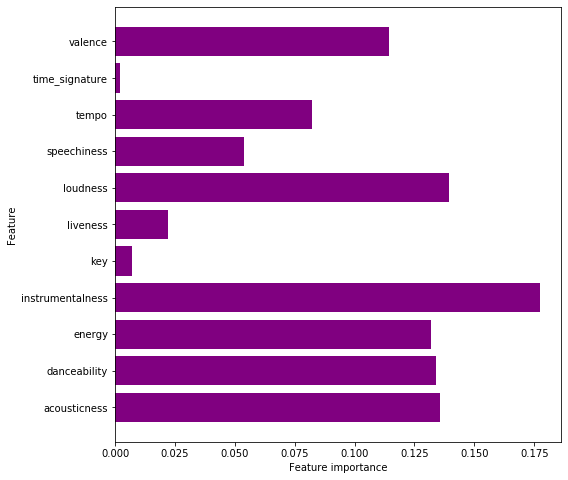

In [1239]:
plot_feature_importances(forest)

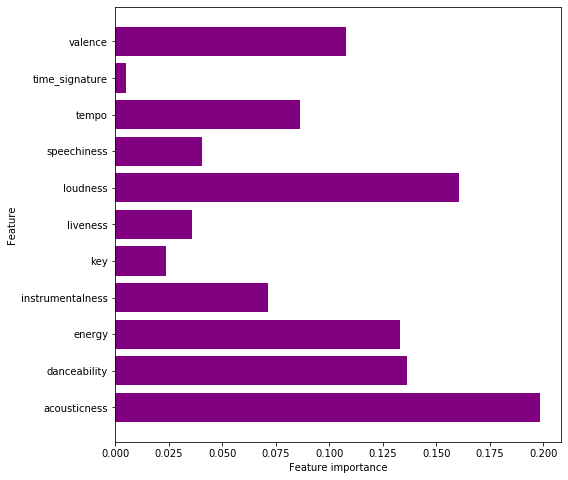

In [1400]:
plot_feature_importances(forest)

## CONFUSION MATRIX (Random Forest)

In [1240]:
pred = forest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("The accuracy score is" + " "+ str(accuracy_score(y_test, pred)))

[[ 3  0  5  0  0  5  0  0  7  0  2  0  0  0  1]
 [ 0 10  0  0  0  1  0  0  0  0  1  2  1  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  8  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  3  0  4  0  0  0  0  0  2  0  0  0  0]
 [ 1  1  0  0  0 10  0  0  0  0  0  2  1  0  0]
 [ 3  0  0  0  1  2  1  0  0  9  2  0  2  0  0]
 [ 0  3  1  0  0  1  0  2  2  0  2  0  1  0  0]
 [ 4  1  1  0  0  0  0  0 17  1  0  0  0  0  0]
 [ 1  0  0  0  1  1  0  0  5 11  1  0  2  0  0]
 [ 0  0  2  0  1  0  0  0  0  0 19  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  2  7  0  0]
 [ 0  0  0  0  0  5  0  0  0  2  0  0  7  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  3  0  0  4  1  0  0  0  0  7]]
                precision    recall  f1-score   support

                     0.23      0.13      0.17        23
           50s       0.62      0.67      0.65        15
     Chill_hop       0.52      1.00      0.68        14
     Classical       0.53      0.73      0.62        1

In [1401]:
pred = forest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("The accuracy score is" + " "+ str(accuracy_score(y_test, pred)))

[[ 9  1  0  0  3  1]
 [ 0 26  0  0  0  0]
 [ 0  0  8  2  1  1]
 [ 1  0  4 16  0  0]
 [ 0  0  0  2  6  0]
 [ 2  0  0  0  0  9]]
                precision    recall  f1-score   support

           50s       0.75      0.64      0.69        14
     Classical       0.96      1.00      0.98        26
    Electronic       0.67      0.67      0.67        12
Industrial_Pop       0.80      0.76      0.78        21
    Rockabilly       0.60      0.75      0.67         8
       Spanish       0.82      0.82      0.82        11

      accuracy                           0.80        92
     macro avg       0.77      0.77      0.77        92
  weighted avg       0.81      0.80      0.80        92

The accuracy score is 0.8043478260869565


In [1378]:
cm = confusion_matrix(y_test, pred)
classes = ['50s', 'Chill_hop', 'Classical', 
           'Detroit_Techno', 'Disco', 'Electronic', 
           'French', 'Hip_hop', 'Industrial_pop', 
           'Post_Rock', 'Rockabilly', 'Ska', 'Sleep', 'Spanish']

In [1402]:
# less classifiers
cm = confusion_matrix(y_test, pred)
classes = ['50s', 'Classical', 'Electronic', 
           'Industrial_pop', 'Rockabilly', 'Spanish']

In [1379]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 3  0  5  0  0  5  0  0  7  0  2  0  0  0  1]
 [ 0 10  0  0  0  1  0  0  0  0  1  2  1  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  8  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  3  0  4  0  0  0  0  0  2  0  0  0  0]
 [ 1  1  0  0  0 10  0  0  0  0  0  2  1  0  0]
 [ 3  0  0  0  1  2  1  0  0  9  2  0  2  0  0]
 [ 0  3  1  0  0  1  0  2  2  0  2  0  1  0  0]
 [ 4  1  1  0  0  0  0  0 17  1  0  0  0  0  0]
 [ 1  0  0  0  1  1  0  0  5 11  1  0  2  0  0]
 [ 0  0  2  0  1  0  0  0  0  0 19  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  2  7  0  0]
 [ 0  0  0  0  0  5  0  0  0  2  0  0  7  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  3  0  0  4  1  0  0  0  0  7]]


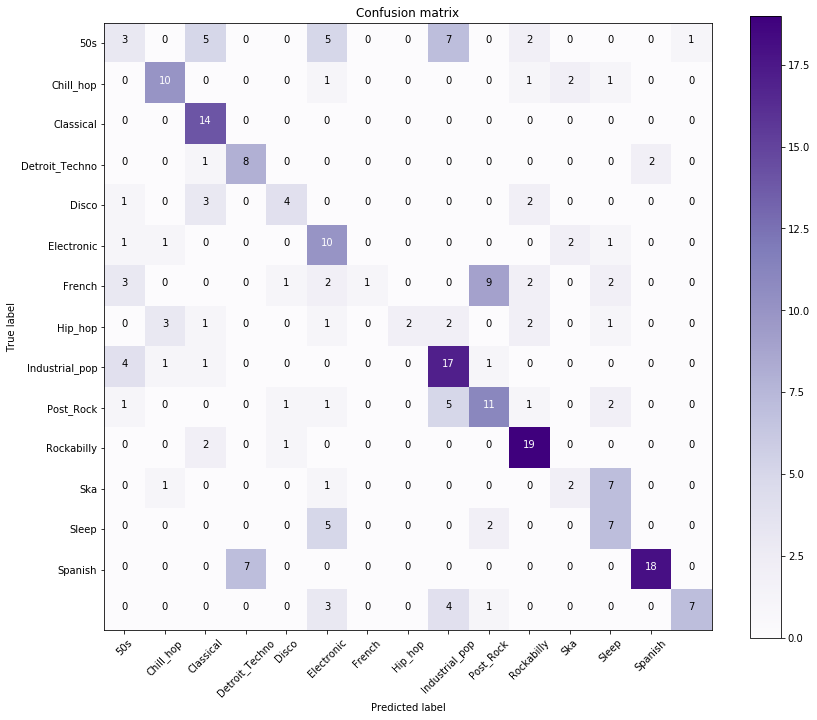

In [1380]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

Confusion Matrix, without normalization
[[ 9  1  0  0  3  1]
 [ 0 26  0  0  0  0]
 [ 0  0  8  2  1  1]
 [ 1  0  4 16  0  0]
 [ 0  0  0  2  6  0]
 [ 2  0  0  0  0  9]]


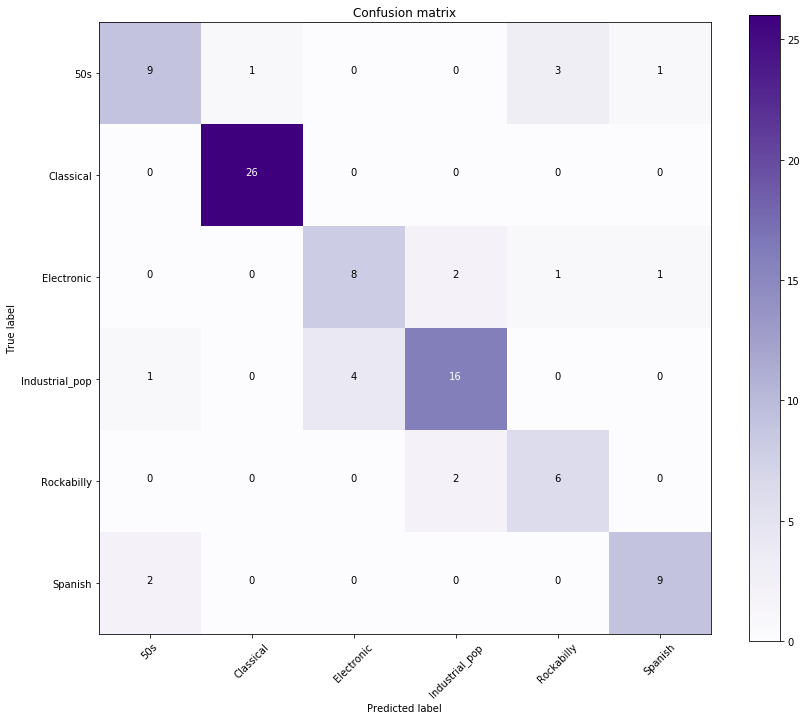

In [1403]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [1405]:
results

[('Classical', 'Classical'),
 ('Electronic', 'Classical'),
 ('Spanish', 'Classical'),
 ('50s', 'Classical'),
 ('Electronic', '50s'),
 ('Electronic', 'Classical'),
 ('Industrial_Pop', '50s'),
 ('Rockabilly', 'Industrial_Pop'),
 ('Classical', 'Classical'),
 ('Classical', 'Electronic'),
 ('Industrial_Pop', 'Classical'),
 ('Classical', 'Electronic'),
 ('Spanish', 'Classical'),
 ('Rockabilly', 'Classical'),
 ('Electronic', '50s'),
 ('Electronic', 'Rockabilly'),
 ('Classical', 'Spanish'),
 ('Industrial_Pop', 'Industrial_Pop'),
 ('Classical', 'Rockabilly'),
 ('Electronic', 'Classical'),
 ('Industrial_Pop', 'Spanish'),
 ('Classical', '50s'),
 ('Classical', 'Spanish'),
 ('Classical', '50s'),
 ('50s', 'Electronic'),
 ('50s', 'Electronic'),
 ('Classical', '50s'),
 ('Rockabilly', 'Classical'),
 ('Electronic', 'Rockabilly'),
 ('Industrial_Pop', 'Electronic'),
 ('Industrial_Pop', 'Classical'),
 ('Industrial_Pop', '50s'),
 ('Classical', 'Electronic'),
 ('Rockabilly', 'Classical'),
 ('50s', 'Rockabill

In [1404]:
results = list(zip(list(pred), list(y_train)))

In [1245]:
results

[('Chill_hop', 'Industrial_Pop'),
 ('Sleep', 'Disco'),
 ('Chill_hop', '50s'),
 ('Rockabilly', 'Disco'),
 ('Hip_hop', 'Chill_hop'),
 ('Post_Rock', 'Classical'),
 ('50s', 'Spanish'),
 ('Chill_hop', ''),
 ('Post_Rock', 'Classical'),
 ('Spanish', 'Chill_hop'),
 ('Sleep', '50s'),
 ('50s', 'Classical'),
 ('Hip_hop', 'Industrial_Pop'),
 ('Industrial_Pop', 'Electronic'),
 ('Disco', 'Ska'),
 ('Industrial_Pop', 'Sleep'),
 ('Hip_hop', ''),
 ('Ska', 'Disco'),
 ('', 'Disco'),
 ('Rockabilly', 'Post_Rock'),
 ('Hip_hop', 'Spanish'),
 ('Classical', '50s'),
 ('Hip_hop', 'Industrial_Pop'),
 ('Spanish', '50s'),
 ('Post_Rock', 'Industrial_Pop'),
 ('French', 'Detroit_Techno'),
 ('Disco', ''),
 ('Spanish', 'Industrial_Pop'),
 ('Hip_hop', 'Chill_hop'),
 ('Sleep', '50s'),
 ('Chill_hop', 'Industrial_Pop'),
 ('Hip_hop', 'Chill_hop'),
 ('Classical', 'Hip_hop'),
 ('Chill_hop', 'Hip_hop'),
 ('Chill_hop', '50s'),
 ('50s', 'Industrial_Pop'),
 ('Hip_hop', 'Spanish'),
 ('50s', 'Disco'),
 ('Post_Rock', 'Classical'),
 ('

## Running Tests (Support Vector Machine)

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [1367]:
# X_train = X_train.fillna(X_train.mean())

In [ ]:
X_test = X_test.fillna(X_train.mean())

In [ ]:
y_train = y_train.fillna('')

In [ ]:
y_test = y_test.fillna('')

In [1406]:
tic = time()
svclassifier = SVC(kernel='linear', C=.00606667)  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.029510021209716797 seconds


In [1407]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[ 6  1  0  3  3  1]
 [ 0 26  0  0  0  0]
 [ 0  0  0 11  1  0]
 [ 2  0  0 12  2  5]
 [ 1  0  0  3  4  0]
 [ 1  0  0  1  1  8]]
                precision    recall  f1-score   support

           50s       0.60      0.43      0.50        14
     Classical       0.96      1.00      0.98        26
    Electronic       0.00      0.00      0.00        12
Industrial_Pop       0.40      0.57      0.47        21
    Rockabilly       0.36      0.50      0.42         8
       Spanish       0.57      0.73      0.64        11

      accuracy                           0.61        92
     macro avg       0.48      0.54      0.50        92
  weighted avg       0.55      0.61      0.57        92

The accuracy score is 0.6086956521739131


## Running Tests (Logistical Regression)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)


In [1408]:
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X_test, y_test, sample_weight=None)

0.7065217391304348

In [296]:
logreg.coef_

array([[-1.34500290e+00,  2.11154636e+00, -9.01933181e-01,
        -5.99218369e-01, -3.92739252e-02,  1.41344597e-02,
         1.06424595e-01, -4.31884751e-01, -3.15318733e-03,
        -7.70752735e-02, -8.24109700e-01],
       [ 3.83991051e+00, -1.05938808e+00, -1.55876859e+00,
        -2.86178642e+00,  3.88896189e-03,  8.54550733e-02,
         1.18696095e-01, -1.23720974e+00,  2.15674912e-03,
        -5.56177604e-01,  3.11080459e+00],
       [ 4.14722649e-01,  2.62476028e+00, -3.21238651e+00,
         2.68854808e+00,  3.51298159e-03,  9.01290147e-01,
         1.82493587e-01,  3.74719342e+00, -1.74591270e-02,
         2.13745886e-01, -1.07659400e+00],
       [ 1.88382978e+00, -2.55962770e+00, -2.26127736e+00,
        -3.70390895e-01,  2.86706268e-02, -4.11059162e-01,
        -7.35360344e-02, -5.05785355e-01,  8.54409836e-03,
        -5.70370836e-01, -5.00471856e-01],
       [-1.93807574e+00,  1.69324142e+00,  1.31448293e+00,
         1.88262341e+00, -1.43588250e-02, -1.20261119e+00,
  

In [301]:
df_logco = pd.DataFrame(logreg.coef_)

In [302]:
df_logco

,0,1,2,3,4,5,6,7,8,9,10
0,-1.345003,2.111546,-0.901933,-0.599218,-0.039274,0.014134,0.106425,-0.431885,-0.003153,-0.077075,-0.824110
1,3.839911,-1.059388,-1.558769,-2.861786,0.003889,0.085455,0.118696,-1.237210,0.002157,-0.556178,3.110805
2,0.414723,2.624760,-3.212387,2.688548,0.003513,0.901290,0.182494,3.747193,-0.017459,0.213746,-1.076594
3,1.883830,-2.559628,-2.261277,-0.370391,0.028671,-0.411059,-0.073536,-0.505785,0.008544,-0.570371,-0.500472
4,-1.938076,1.693241,1.314483,1.882623,-0.014359,-1.202611,-0.068877,0.149474,-0.000449,-0.607364,-0.443408
5,-1.789189,2.165158,0.360802,-0.965647,-0.020164,-0.443912,-0.106130,-1.313963,-0.008561,-0.804058,3.341194
6,-1.276645,1.086158,1.423282,-0.480311,0.026856,0.514107,0.349188,-0.698731,0.000336,-0.444498,-1.856997
7,1.726648,-0.931632,-2.351785,-3.436761,-0.030956,1.250451,0.049411,-0.182069,-0.003348,-0.263663,0.655521
8,-0.361283,3.130946,-3.313892,-3.117525,-0.014587,-0.920098,0.230166,2.149288,0.009992,-0.021789,-2.384079
9,-3.499891,-0.339250,0.900844,-0.738109,0.023082,1.242422,0.131687,-0.652055,-0.009430,0.435165,-1.921687


In [297]:
logreg.intercept_

array([-0.49053042, -1.20913359, -0.51664659, -1.23782135, -2.69776022,
       -1.95370105,  0.49092935,  0.04838919,  0.04036571, -1.08526113,
        0.02992442, -1.79281667, -0.8113461 , -1.56991599, -0.1172897 ])

## Running Test (Adaboost)

In [384]:
X_train, X_test, y_train, y_test = train_test_split(complete_scaled_df, y, test_size=0.25, random_state=42)

In [1409]:
adaboost_clf = AdaBoostClassifier(random_state=42)
gbt_clf = GradientBoostingClassifier(random_state=42)

In [1410]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [1411]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1412]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [322]:
def display_acc_and_f1_score(true, preds, model_name, average='micro'):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='micro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.23312236286919832
F1-Score: 0.23312236286919832

Model: Gradient Boosted Trees
Accuracy: 0.9578059071729957
F1-Score: 0.9578059071729959

Testing Metrics
Model: AdaBoost
Accuracy: 0.20189274447949526
F1-Score: 0.20189274447949526

Model: Gradient Boosted Trees
Accuracy: 0.5520504731861199
F1-Score: 0.5520504731861199


In [389]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
print(adaboost_confusion_matrix)

[[ 0  0  0  0  0  0  0  0 27  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  3  0 12  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  0 12  0  0  0  0]
 [ 0  0  0  0  1  1  0  0 18  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 19  0  5  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 23  0  3  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0]]


In [1414]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
print(adaboost_confusion_matrix)
 
print(classification_report(y_test, adaboost_test_preds)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test,adaboost_test_preds)))

[[10  1  0  0  2  1]
 [ 0 26  0  0  0  0]
 [ 0  0  8  2  1  1]
 [ 1  0 10  9  1  0]
 [ 2  0  1  0  5  0]
 [ 2  0  2  0  0  7]]
                precision    recall  f1-score   support

           50s       0.67      0.71      0.69        14
     Classical       0.96      1.00      0.98        26
    Electronic       0.38      0.67      0.48        12
Industrial_Pop       0.82      0.43      0.56        21
    Rockabilly       0.56      0.62      0.59         8
       Spanish       0.78      0.64      0.70        11

      accuracy                           0.71        92
     macro avg       0.69      0.68      0.67        92
  weighted avg       0.75      0.71      0.71        92

The accuracy score is 0.7065217391304348


In [325]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
print(gbt_confusion_matrix)

[[11  0  3  0  0  2  3  0  5  9  0  1  0  0  0]
 [ 0  9  0  0  0  2  0  3  0  0  1  0  1  0  2]
 [ 1  0 12  0  0  0  0  0  1  0  2  0  0  1  0]
 [ 0  1  0 19  0  0  0  0  0  0  2  0  0  4  0]
 [ 1  0  0  0  5  0  0  0  0  0  1  0  0  7  0]
 [ 1  0  0  0  0 19  0  0  0  1  0  0  1  4  0]
 [ 2  0  0  0  0  2  7  1  1  2  0  0  1  0  0]
 [ 1  0  0  0  0  1  0  7  0  2  0  0  0  0  0]
 [ 3  0  0  0  0  1  0  0 17  2  0  0  0  0  0]
 [ 4  0  1  0  0  0  2  0  1 11  1  0  3  0  2]
 [ 1  0  1  1  1  0  0  1  0  0 16  0  0  1  0]
 [ 0  6  0  0  0  1  0  1  0  1  0  3  7  0  0]
 [ 1  1  0  0  0  3  1  0  1  3  0  3 13  0  2]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0 16  0]
 [ 1  0  0  0  0  2  0  0  1  0  0  0  0  0 10]]


In [1416]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
print(gbt_confusion_matrix)
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

[[10  1  0  0  2  1]
 [ 0 26  0  0  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0  5 15  1  0]
 [ 1  0  0  2  5  0]
 [ 0  0  1  0  0 10]]
                precision    recall  f1-score   support

           50s       0.91      0.71      0.80        14
     Classical       0.96      1.00      0.98        26
    Electronic       0.62      0.83      0.71        12
Industrial_Pop       0.79      0.71      0.75        21
    Rockabilly       0.62      0.62      0.62         8
       Spanish       0.91      0.91      0.91        11

      accuracy                           0.83        92
     macro avg       0.80      0.80      0.80        92
  weighted avg       0.84      0.83      0.83        92



In [1417]:
# less classifiers
cm = confusion_matrix(y_test, gbt_clf_test_preds)
classes = ['50s', 'Classical', 'Electronic', 
           'Industrial_pop', 'Rockabilly', 'Spanish']

Confusion Matrix, without normalization
[[10  1  0  0  2  1]
 [ 0 26  0  0  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0  5 15  1  0]
 [ 1  0  0  2  5  0]
 [ 0  0  1  0  0 10]]


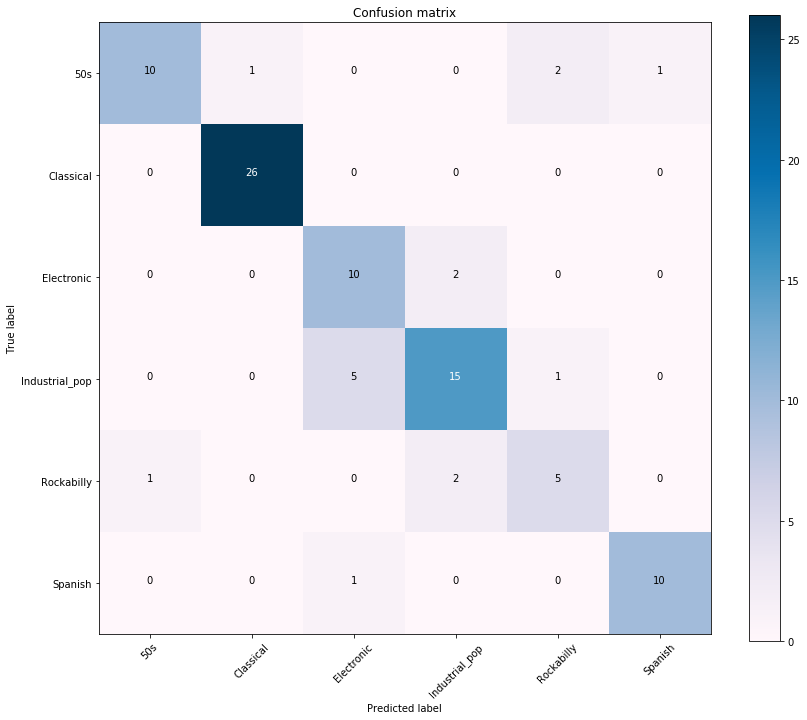

In [1418]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.PuBu)

In [326]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

                precision    recall  f1-score   support

                     0.00      0.00      0.00        34
           50s       0.00      0.00      0.00        18
     Chill_hop       0.00      0.00      0.00        17
     Classical       0.48      0.81      0.60        26
Detroit_Techno       0.00      0.00      0.00        14
         Disco       0.33      0.04      0.07        26
    Electronic       0.00      0.00      0.00        16
        French       0.00      0.00      0.00        11
       Hip_hop       0.12      0.96      0.21        23
Industrial_Pop       0.00      0.00      0.00        25
     Post_Rock       0.25      0.91      0.39        22
    Rockabilly       0.00      0.00      0.00        19
           Ska       0.00      0.00      0.00        28
         Sleep       0.00      0.00      0.00        24
       Spanish       0.00      0.00      0.00        14

      accuracy                           0.20       317
     macro avg       0.08      0.18      0.08 

In [327]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

                precision    recall  f1-score   support

                     0.41      0.32      0.36        34
           50s       0.53      0.50      0.51        18
     Chill_hop       0.71      0.71      0.71        17
     Classical       0.68      0.73      0.70        26
Detroit_Techno       0.83      0.36      0.50        14
         Disco       0.58      0.73      0.64        26
    Electronic       0.54      0.44      0.48        16
        French       0.54      0.64      0.58        11
       Hip_hop       0.63      0.74      0.68        23
Industrial_Pop       0.35      0.44      0.39        25
     Post_Rock       0.70      0.73      0.71        22
    Rockabilly       0.43      0.16      0.23        19
           Ska       0.50      0.46      0.48        28
         Sleep       0.48      0.67      0.56        24
       Spanish       0.62      0.71      0.67        14

      accuracy                           0.55       317
     macro avg       0.57      0.56      0.55 

## Running Test (XGBoost)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1427]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [1428]:
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [1429]:
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [1430]:
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 99.45%
Validation accuracy: 81.52%


## Comparing to GridSearch

In [344]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [345]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5

Training Accuracy: 95.57%
Validation accuracy: 58.68%


## Running Tests (Grid Search - Decision Trees V Random Forrest)

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [354]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=10)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 43.58%


## Decisions Trees - Gridsearch

In [355]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [356]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [357]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [358]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 49.98%
Mean Test Score: 41.96%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

## Random Forrests - GridSearch

In [359]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=10))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 52.58%


In [360]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [361]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 60.97%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [363]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score*100)
print('Random forest grid search: ', rf_score*100)

Decision tree grid search:  41.95583596214511
Random forest grid search:  58.67507886435332


## Running Test pt 2

In [1338]:
X = n_6.drop(['Genre'], axis=1)

In [1347]:
X = X.drop(['id'], axis=1)

In [1362]:
X = X.drop([0], axis=1)

In [1339]:
y = n_6_y['Genre']

In [1354]:
# n_6 = pd.DataFrame(X, columns=X.columns)


In [1363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [1267]:
forest.score(X_test, y_test)

0.5296442687747036

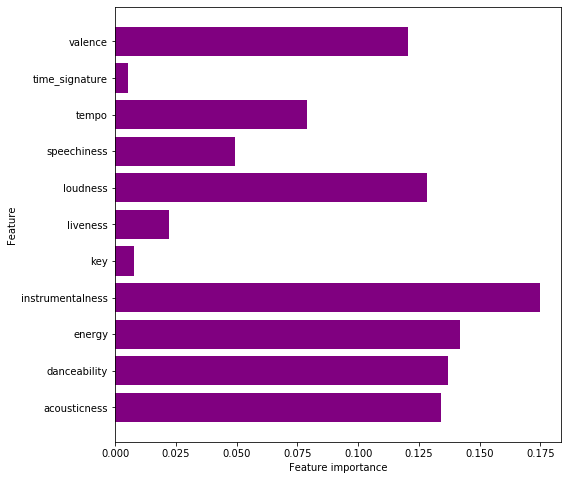

In [1268]:
plot_feature_importances(forest)

In [1423]:
dummies_clf = DummyClassifier()
dummies_clf.fit(X_train, y_train)
pred = dummies_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("The accuracy score is" + " "+ str(accuracy_score(y_test, pred)))

[[1 3 2 3 3 2]
 [3 5 2 6 5 5]
 [1 3 0 2 2 4]
 [1 1 2 6 8 3]
 [0 0 1 4 0 3]
 [2 5 0 1 3 0]]
                precision    recall  f1-score   support

           50s       0.12      0.07      0.09        14
     Classical       0.29      0.19      0.23        26
    Electronic       0.00      0.00      0.00        12
Industrial_Pop       0.27      0.29      0.28        21
    Rockabilly       0.00      0.00      0.00         8
       Spanish       0.00      0.00      0.00        11

      accuracy                           0.13        92
     macro avg       0.12      0.09      0.10        92
  weighted avg       0.16      0.13      0.14        92

The accuracy score is 0.13043478260869565


In [1425]:
# less classifiers
cm = confusion_matrix(y_test, pred)
classes = ['50s', 'Classical', 'Electronic', 
           'Industrial_pop', 'Rockabilly', 'Spanish']

Confusion Matrix, without normalization
[[1 3 2 3 3 2]
 [3 5 2 6 5 5]
 [1 3 0 2 2 4]
 [1 1 2 6 8 3]
 [0 0 1 4 0 3]
 [2 5 0 1 3 0]]


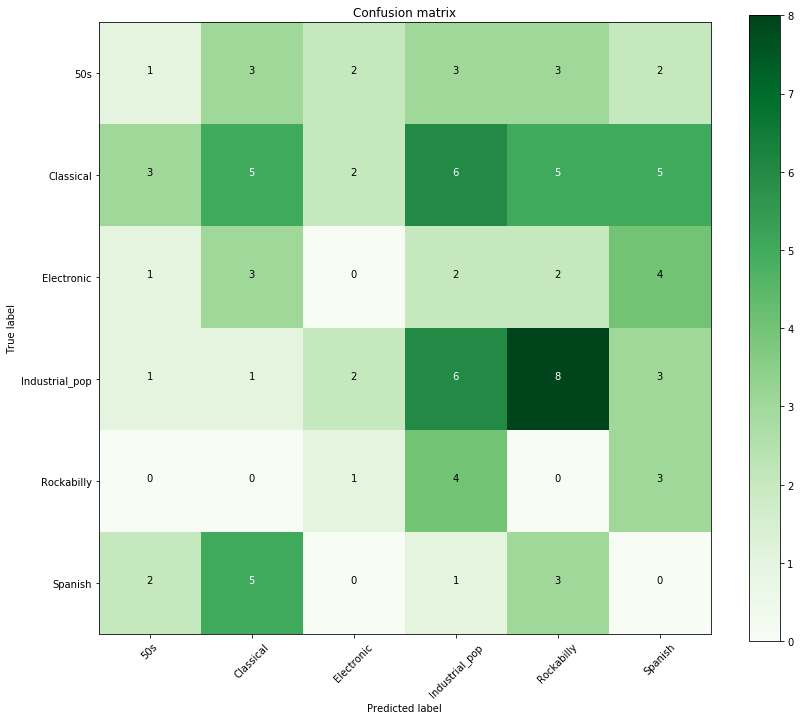

In [1426]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)